In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/dago/anaconda3/envs/tp2/bin/python3 (found version "3.6.5") 
-- Found PythonLibs: /home/dago/anaconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import os
import sys
import numpy as np
import pandas as pd

/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2-alu/tp2/notebooks
Python 3.6.5 :: Anaconda, Inc.


# Instancias de train and test


In [6]:
%%time

filename = "../data/train.csv"

def get_data_set(filepath, total_instances):
    df_train = pd.read_csv(filepath)
    df_train = df_train[:total_instances]
    
    # Uso values para mandar todo a arrays de numpy
    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    return X, y

def main(filename, k, alpha, method, total_instances = 32000, num_iter = 1000, train_percentage = 0.8, epsilon = 1e-6 ):
    X, y = get_data_set(filename, total_instances)
    
    # take some instances for train and other for validation
    limit = int(train_percentage * X.shape[0]) 

    X_train, label_train = X[:limit], y[:limit]
    X_val, label_val = X[limit:], y[limit:]

    assert len(X_train) == len(label_train)
    assert len(X_val) == len(label_val)

    clf = metnum.KNNClassifier(k)
    
    if (method == "KNN"):
        clf.fit(X_train, label_train)
        
    if (method == "KNN_PCA"):
        pca = metnum.PCA(alpha, num_iter, epsilon)
        pca.fit(X_train)

        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
        clf.fit(X_train, label_train) 

    from sklearn.metrics import accuracy_score
    label_pred = clf.predict(X_val)

    acc = accuracy_score(label_val, label_pred)
    print("Accuracy: {}".format(acc))
    return acc

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs


In [4]:
%%time
main(filename, 1, 15, "KNN_PCA", 5000, 1000, 0.8, 1e-8)


Accuracy: 0.923
CPU times: user 4.87 s, sys: 248 ms, total: 5.12 s
Wall time: 4.92 s


0.923

# Testing -------------------------------------------


In [10]:
# test 1
import numpy as np
A = np.array([[ 62,   4, -52],
 [  4,   4,  -4],
 [-52,  -4,  44]])

w, V = metnum.get_first_eigenvalues(A, 3, 5000, 1e-8)

for i in range(len(A)):
    print(np.allclose(A @ V[:, i], w[i] * V[:,i]))
    print(A @ V[:, i])
    print(w[i] * V[:,i])

True
[-81.01699942  -5.84815982  68.23429144]
[-81.01699942  -5.84815982  68.23429144]
True
[-0.485262    3.71464028 -0.25779796]
[-0.485262    3.71464028 -0.25779796]
True
[0.10161836 0.02177798 0.12252162]
[0.10161836 0.02177798 0.12252162]


In [18]:
def get_x_by_label(data, labels, label ):
    result_x = []
    result_y = []
    for i in range(0,len(data)):
        if (labels[i] == label):
            result_x.append(data[i][0])
            result_y.append(data[i][1])
    return result_x, result_y

In [84]:
# Test 2 PCA
filename = "../data/train.csv"
alpha = 2
k = 1
total_instances = 100
train_percentage = 0.95
num_iter = 1000
epsilon = 1e-10

X, y = get_data_set(filename, total_instances)

# take some instances for train and other for validation
limit = int(train_percentage * X.shape[0]) 

X_train, label_train = X[:limit], y[:limit]
X_val, label_val = X[limit:], y[limit:]

assert len(X_train) == len(label_train)
assert len(X_val) == len(label_val)

clf = metnum.KNNClassifier(k)

pca = metnum.PCA(alpha, num_iter, epsilon)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

clf.fit(X_train, label_train) 

from sklearn.metrics import accuracy_score
label_pred = clf.predict(X_val)

acc = accuracy_score(label_val, label_pred)
print("Accuracy: {}".format(acc))




Accuracy: 0.6


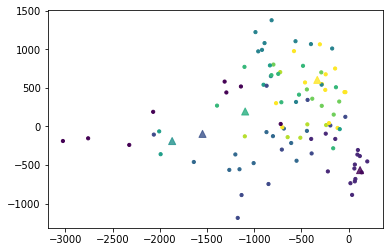

In [90]:
plt.scatter(X_train[:,0], X_train[:,1],s=10 ,c = label_train, alpha = 1)
plt.scatter(X_val[:,0], X_val[:,1], c = label_pred, s = 50, marker='^', alpha = 0.8)

plt.show()


# Implementación
- En el metodo de la potencia verificamos al final que se trate de un autovector de X con precision epsilon
- 

# Metodo para parar el metodo de la potencia
- research
- - http://www.cse.psu.edu/~b58/cse456/lecture11.pdf
- - || wk - wk+1 || inf < e
- - https://www-users.cs.umn.edu/~saad/eig_book_2ndEd.pdf
- - pag 59(69) seccion 3.2: r = Au~ - lambda~u~, r es el vector residual

- - talvez se puede usar lambda -> descartado porque habia que computar el autovalor adentro del ciclo en cada iteracion, lo cual es cosotoso.
- elegir 2/3 metodos y evaluar su eficiencia en base a la perfomance de tiempo y a distancia de los resultados obtenidos

In [5]:
%%time
# Sin método de terminación
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")

# Accuracy: 0.923
# Iteration:  1000  time:  8.2160
        
# Accuracy: 0.923
# Iteration:  2000  time:  10.8136
        
# Accuracy: 0.923
# Iteration:  3000  time:  12.2737

 33%|███▎      | 1/3 [00:08<00:16,  8.22s/it]

Accuracy: 0.923
Iteration:  1000  time:  8.2160


 67%|██████▋   | 2/3 [00:19<00:09,  9.74s/it]

Accuracy: 0.923
Iteration:  2000  time:  10.8136


100%|██████████| 3/3 [00:31<00:00, 10.44s/it]

Accuracy: 0.923
Iteration:  3000  time:  12.2737
CPU times: user 30.7 s, sys: 762 ms, total: 31.4 s
Wall time: 31.3 s


In [4]:
# || wk - wk+1 || inf < e
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")
    
# considerar que b es random por eso los resultados
# Accuracy: 0.923
# Iteration:  1000  time:  4.7722
        
# Accuracy: 0.923
# Iteration:  2000  time:  4.5494
        
# Accuracy: 0.923
# Iteration:  3000  time:  4.5293

 33%|███▎      | 1/3 [00:05<00:10,  5.42s/it]

Accuracy: 0.923
Iteration:  1000  time:  5.4148


 67%|██████▋   | 2/3 [00:10<00:05,  5.05s/it]

Accuracy: 0.923
Iteration:  2000  time:  4.7880


100%|██████████| 3/3 [00:14<00:00,  4.98s/it]

Accuracy: 0.923
Iteration:  3000  time:  4.7343


In [5]:
# pag 59(69) seccion 3.2: r = Au~ - lambda~u~, r es el vector residual
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")
    
# Accuracy: 0.923
# Iteration:  1000  time:  6.3910
        
# Accuracy: 0.923
# Iteration:  2000  time:  6.1160
        
# Accuracy: 0.923
# Iteration:  3000  time:  6.4459  

 33%|███▎      | 1/3 [00:06<00:13,  6.97s/it]

Accuracy: 0.923
Iteration:  1000  time:  6.9683


 67%|██████▋   | 2/3 [00:13<00:06,  6.60s/it]

Accuracy: 0.923
Iteration:  2000  time:  6.3405


100%|██████████| 3/3 [00:19<00:00,  6.45s/it]

Accuracy: 0.923
Iteration:  3000  time:  6.0369


**Decidimos quedarnos con el primer criterio ya que al no calcular los autovalores en cada iteracíon obtuvo una perfomance mejor que el 2do criterio de finalizacion para el método de la potencia. Y ademas observamos que las iteraciones se vieron altamente reducidas(Mejora con la cantidad de iteraciones, ya que cuando converge el resto de las iteraciones son innecesarias)**

# Experimentar con la k
- Encontrar primero del 1 al 200 de a saltos de a 10
- Hipotesis: va a estar entre los primeros ya que tener en cuenta demasiados puntos mas cercanos deja de tener sentido
- Luego concluir que esta entre los primeros y hacer del 1 al 20

*Vamos a experimentar con: Intancias 10000, porcentage 0.8, epsilon 1e-8, iteraciones 1000(Si en 1000 no convergio nos conviene tomar un nuevo X0)*

## KNN sin PCA

In [132]:
def plot_accuracy_KNN(filename, title):
    columns = ["k", "time", "acc"]
    df = pd.read_csv(filename, names=columns)

    ks = df["k"]
    accuracy = df["acc"]
    
    plt.plot(ks, accuracy, 'o-')
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.title(title)
    
    plt.show()
    
def plot_time_KNN(filename, title):
    columns = ["k", "time", "acc"]
    df = pd.read_csv(filename, names=columns)

    ks = df["k"]
    accuracy = df["time"]
    
    plt.plot(ks, accuracy, 'o-')
    plt.xlabel("k")
    plt.ylabel("tiempo(s)")
    plt.title(title)
    
    plt.show()
    

In [127]:
name = "../dataExp/expKNN_1-200.csv"
accuracy = []
times = []

total_instances = 20000
it_range = [1] + list(range(10,201,10))
                    
for k in tqdm(it_range):
    time_init = time.perf_counter()
    acc = main("../data/train.csv", k, 0, "KNN", total_instances, 2500, 0.8, 1e-6)
    time_end = time.perf_counter()
    
    times.append(time_end-time_init)
    accuracy.append(acc)
np.savetxt(name, np.array([it_range, times, accuracy]).transpose(), delimiter=",")

  5%|▍         | 1/21 [00:59<19:50, 59.50s/it]

Accuracy: 0.955


 10%|▉         | 2/21 [02:00<19:06, 60.32s/it]

Accuracy: 0.94625


 14%|█▍        | 3/21 [03:02<18:16, 60.92s/it]

Accuracy: 0.94075


 19%|█▉        | 4/21 [04:08<17:50, 62.98s/it]

Accuracy: 0.9345


 24%|██▍       | 5/21 [05:16<17:16, 64.79s/it]

Accuracy: 0.928


 29%|██▊       | 6/21 [06:23<16:22, 65.52s/it]

Accuracy: 0.921


 33%|███▎      | 7/21 [07:30<15:27, 66.27s/it]

Accuracy: 0.917


 38%|███▊      | 8/21 [08:40<14:36, 67.43s/it]

Accuracy: 0.9115


 43%|████▎     | 9/21 [09:53<13:47, 68.94s/it]

Accuracy: 0.908


 48%|████▊     | 10/21 [11:07<12:56, 70.59s/it]

Accuracy: 0.9045


 52%|█████▏    | 11/21 [12:23<12:03, 72.37s/it]

Accuracy: 0.902


 57%|█████▋    | 12/21 [13:41<11:07, 74.14s/it]

Accuracy: 0.8975


 62%|██████▏   | 13/21 [15:02<10:08, 76.10s/it]

Accuracy: 0.8965


 67%|██████▋   | 14/21 [16:22<09:01, 77.35s/it]

Accuracy: 0.8945


 71%|███████▏  | 15/21 [17:45<07:52, 78.83s/it]

Accuracy: 0.89275


 76%|███████▌  | 16/21 [19:10<06:44, 80.89s/it]

Accuracy: 0.88925


 81%|████████  | 17/21 [20:39<05:32, 83.11s/it]

Accuracy: 0.8865


 86%|████████▌ | 18/21 [22:08<04:15, 85.08s/it]

Accuracy: 0.8855


 90%|█████████ | 19/21 [23:40<02:54, 87.16s/it]

Accuracy: 0.882


 95%|█████████▌| 20/21 [25:14<01:29, 89.21s/it]

Accuracy: 0.88


100%|██████████| 21/21 [26:51<00:00, 76.73s/it]

Accuracy: 0.87875


In [134]:
columns = ["k", "time", "acc"]
df = pd.read_csv("../dataExp/expKNN_1-200.csv", names=columns)
print(df)

        k       time      acc
0     1.0  59.503631  0.95500
1    10.0  60.891295  0.94625
2    20.0  61.627429  0.94075
3    30.0  66.139242  0.93450
4    40.0  67.989898  0.92800
5    50.0  66.941810  0.92100
6    60.0  68.378887  0.91700
7    70.0  69.904789  0.91150
8    80.0  72.270885  0.90800
9    90.0  74.291866  0.90450
10  100.0  76.406540  0.90200
11  110.0  78.185419  0.89750
12  120.0  80.615912  0.89650
13  130.0  80.221158  0.89450
14  140.0  82.257444  0.89275
15  150.0  85.673342  0.88925
16  160.0  88.291670  0.88650
17  170.0  89.667840  0.88550
18  180.0  92.000563  0.88200
19  190.0  93.988184  0.88000
20  200.0  96.719980  0.87875


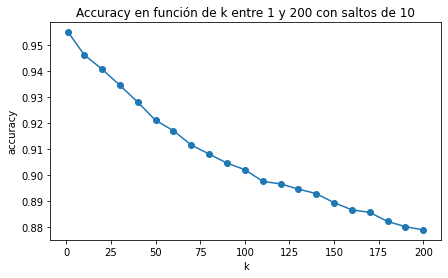

In [128]:
name = "../dataExp/expKNN_1-200.csv"
plot_accuracy_KNN(name, "Accuracy en función de k entre 1 y 200 con saltos de 10")

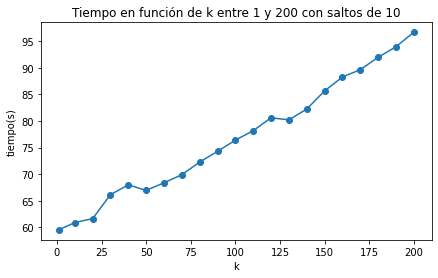

In [133]:
name = "../dataExp/expKNN_1-200.csv"
plot_time_KNN(name, "Tiempo en función de k entre 1 y 200 con saltos de 10")

In [129]:
name_1_10 = "../dataExp/expKNN_1-10.csv"
accuracy_1_10 = []
times_1_10 = []

total_instances = 20000
it_range = range(1,11)

for k in tqdm(it_range):
    time_init = time.perf_counter()
    acc = main("../data/train.csv", k, 0, "KNN", total_instances, 2500, 0.8, 1e-6)
    time_end = time.perf_counter()
    
    times_1_10.append(time_end-time_init)
    accuracy_1_10.append(acc)
np.savetxt(name_1_10, np.array([it_range, times_1_10, accuracy_1_10]).transpose(), delimiter=",")

 10%|█         | 1/10 [00:58<08:45, 58.42s/it]

Accuracy: 0.955


 20%|██        | 2/10 [01:55<07:41, 57.64s/it]

Accuracy: 0.94325


 30%|███       | 3/10 [02:51<06:39, 57.10s/it]

Accuracy: 0.9535


 40%|████      | 4/10 [03:48<05:42, 57.00s/it]

Accuracy: 0.9525


 50%|█████     | 5/10 [04:46<04:46, 57.32s/it]

Accuracy: 0.951


 60%|██████    | 6/10 [05:44<03:49, 57.41s/it]

Accuracy: 0.95075


 70%|███████   | 7/10 [06:41<02:52, 57.48s/it]

Accuracy: 0.953


 80%|████████  | 8/10 [07:39<01:55, 57.66s/it]

Accuracy: 0.94775


 90%|█████████ | 9/10 [08:38<00:57, 57.84s/it]

Accuracy: 0.9485


100%|██████████| 10/10 [09:38<00:00, 57.82s/it]

Accuracy: 0.94625


In [137]:
columns = ["k", "time", "acc"]
df = pd.read_csv("../dataExp/expKNN_1-10.csv", names=columns)
print(df)

      k       time      acc
0   1.0  58.422505  0.95500
1   2.0  57.093158  0.94325
2   3.0  56.463136  0.95350
3   4.0  56.843878  0.95250
4   5.0  57.872442  0.95100
5   6.0  57.583419  0.95075
6   7.0  57.636734  0.95300
7   8.0  58.054121  0.94775
8   9.0  58.225287  0.94850
9  10.0  60.031270  0.94625


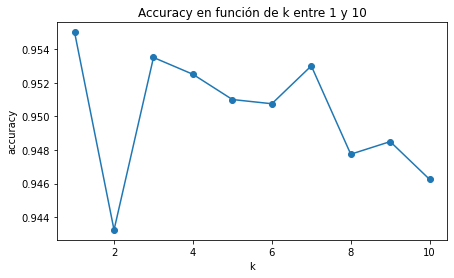

In [131]:
name_1_10 = "../dataExp/expKNN_1-10.csv"
plot_accuracy_KNN(name_1_10, "Accuracy en función de k entre 1 y 10")

## KNN con PCA 
0 < alpha < 500, [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500] 

0 < k < 200 [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]

In [10]:
def main_pca(filename, alpha, total_instances = 32000, num_iter = 1000, train_percentage = 0.8, epsilon = 1e-6 ):
    X, y = get_data_set(filename, total_instances)
    
    # take some instances for train and other for validation
    limit = int(train_percentage * X.shape[0]) 

    X_train, label_train = X[:limit], y[:limit]
    X_val, label_val = X[limit:], y[limit:]

    assert len(X_train) == len(label_train)
    assert len(X_val) == len(label_val)

        
    pca = metnum.PCA(alpha, num_iter, epsilon)
    pca.fit(X_train)

    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)

    return X_train, X_val, label_train, label_val

def main_knn(k, X_train, X_val, label_train, label_val):
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, label_train) 

    from sklearn.metrics import accuracy_score
    label_pred = clf.predict(X_val)

    acc = accuracy_score(label_val, label_pred)
    print("Accuracy: {}".format(acc))
    return acc

# experimenta con un set de alpha y ks
def experimentacion_k_alpha(namefile, ks, alphas, total_intances):
    accuracy_k_alpha_complete = []
    times_k_alpha_complete = []
    ks_complete = []
    alphas_complete = []
    cant_it = 2500
    eps = 1e-6
    
    with tqdm(total=len(ks) * len(alphas)) as pbar:
        for alpha in alphas:
            time_init_pca = time.perf_counter()
            X_train, X_val, label_train, label_val = main_pca("../data/train.csv", alpha, total_instances, cant_it, 0.8, eps)
            time_end_pca = time.perf_counter()
            time_pca = time_end_pca - time_init_pca
            
            for k in ks:
                time_init = time.perf_counter()
                acc = main_knn(k, X_train, X_val, label_train, label_val)
                time_end = time.perf_counter()
                print(f"K: {k}, Alpha: {alpha}")

                times_k_alpha_complete.append(time_end-time_init+time_pca)
                accuracy_k_alpha_complete.append(acc)
                ks_complete.append(k)
                alphas_complete.append(alpha)

                pbar.update(1)
   
    np.savetxt(namefile, np.array([ks_complete, alphas_complete, times_k_alpha_complete, accuracy_k_alpha_complete]).transpose(), delimiter=",")

In [12]:
# experimenta con un set de alpha y ks
def experimentacion_k_alpha_deprecated(namefile, ks, alphas, total_intances):
    accuracy_k_alpha_complete = []
    times_k_alpha_complete = []
    ks_complete = []
    alphas_complete = []

    with tqdm(total=len(ks) * len(alphas)) as pbar:
        for k in ks:
            for alpha in alphas:
                time_init = time.perf_counter()
                acc = main("../data/train.csv", k, alpha, "KNN_PCA", total_instances, 2500, 0.8, 1e-6)
                time_end = time.perf_counter()
                print(f"K: {k}, Alpha: {alpha}")

                times_k_alpha_complete.append(time_end-time_init)
                accuracy_k_alpha_complete.append(acc)
                ks_complete.append(k)
                alphas_complete.append(alpha)

                pbar.update(1)

    np.savetxt(namefile, np.array([ks_complete, alphas_complete, times_k_alpha_complete, accuracy_k_alpha_complete]).transpose(), delimiter=",")

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

# Grafica los datos obtenidos para los distintos k y alpha
def plot_scatter(filename, title, size = (7,4)):
    columns = ["k", "alpha", "time", "acc"]
    df = pd.read_csv(filename, names=columns)
    plot_scatter_df(df, title, size)
    
# Grafica los datos obtenidos para los distintos k y alpha
def plot_scatter_df(df, title, size = (7,4)):
    x = [str(i)[0:-2] for i in df["alpha"]]
    y = [str(i)[0:-2] for i in df["k"]]

    fig = plt.figure()
    colour = df["acc"]
    plt.scatter(x, y, s = 70, c = colour, alpha = 1, cmap="rainbow")
    plt.colorbar(label="accuracy")
    plt.xlabel("alpha")
    plt.ylabel('k',rotation=0)
    plt.title(title)
    plt.rcParams["figure.figsize"] = size
    plt.show()

In [11]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
total_instances = 10000
ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
alphas = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]

experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)


  1%|▏         | 2/144 [00:05<05:03,  2.14s/it]

Accuracy: 0.2515
K: 1, Alpha: 1
Accuracy: 0.2615
K: 2, Alpha: 1


  2%|▏         | 3/144 [00:05<02:58,  1.27s/it]

Accuracy: 0.2735
K: 3, Alpha: 1


  3%|▎         | 4/144 [00:05<02:02,  1.14it/s]

Accuracy: 0.2725
K: 4, Alpha: 1


  3%|▎         | 5/144 [00:05<01:34,  1.47it/s]

Accuracy: 0.277
K: 5, Alpha: 1


  4%|▍         | 6/144 [00:06<01:29,  1.54it/s]

Accuracy: 0.2985
K: 10, Alpha: 1


  4%|▍         | 6/144 [00:07<02:55,  1.27s/it]


KeyboardInterrupt: 

- Graficos: 15 graficos con k fijo, acc(alpha)
- Mismo grafico todos overlapeados
- Alpha en X, k en Y, colorcitos para rangos de acc(rojo, amarrillo verde)


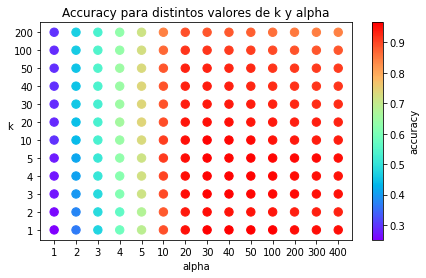

In [44]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
plot_scatter(name_k_alpha_complete, "Accuracy para distintos valores de k y alpha")


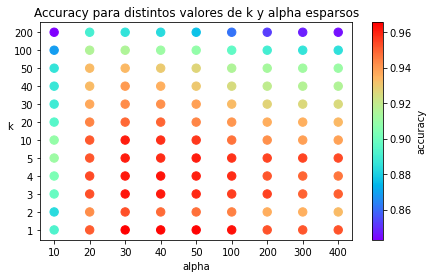

In [47]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(name_k_alpha_complete, names=columns)
#df_k_limit = df[df["k"] < 10]
df_alpha_limit = df[df["alpha"] >= 10] 

plot_scatter_df(df_alpha_limit, "Accuracy para distintos valores de k y alpha esparsos")

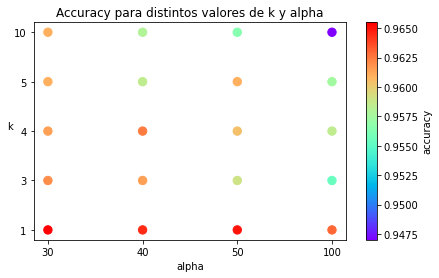

In [48]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(name_k_alpha_complete, names=columns)
df = df[df["k"] < 20]
df = df[df["k"] != 2]
df = df[df["alpha"] > 20]
df = df[df["alpha"] <= 100]

plot_scatter_df(df, "Accuracy para distintos valores de k y alpha")

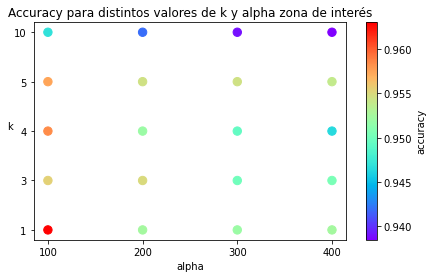

In [49]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(name_k_alpha_complete, names=columns)
df = df[df["k"] < 20]
df = df[df["k"] != 2]
df = df[df["alpha"] >= 100]

plot_scatter_df(df, "Accuracy para distintos valores de k y alpha zona de interés")

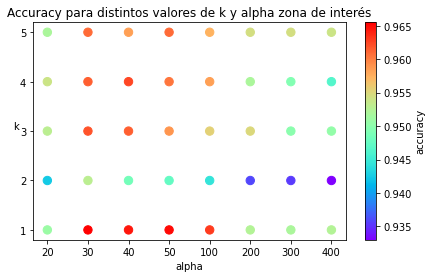

In [50]:
import matplotlib.pyplot as plt
import numpy as np

filename = "../dataExp/KNN_PCA_complete.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df_k_limit = df[df["k"] < 10]
df_alpha_limit = df_k_limit[df_k_limit["alpha"] > 10] 

plot_scatter_df(df_alpha_limit, "Accuracy para distintos valores de k y alpha zona de interés")

In [18]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete_400.csv"
total_instances = 10000
ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
alphas = [400]

experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)


  8%|▊         | 1/12 [11:59<2:11:58, 719.89s/it]

Accuracy: 0.9525
K: 1, Alpha: 400


 17%|█▋        | 2/12 [12:06<50:04, 300.50s/it]  

Accuracy: 0.933
K: 2, Alpha: 400


 25%|██▌       | 3/12 [12:13<24:58, 166.48s/it]

Accuracy: 0.9505
K: 3, Alpha: 400


 33%|███▎      | 4/12 [12:20<13:48, 103.52s/it]

Accuracy: 0.9465
K: 4, Alpha: 400


 42%|████▏     | 5/12 [12:27<08:01, 68.74s/it] 

Accuracy: 0.954
K: 5, Alpha: 400


 50%|█████     | 6/12 [12:35<04:46, 47.82s/it]

Accuracy: 0.9385
K: 10, Alpha: 400


 58%|█████▊    | 7/12 [12:42<02:53, 34.71s/it]

Accuracy: 0.9335
K: 20, Alpha: 400


 67%|██████▋   | 8/12 [12:51<01:45, 26.31s/it]

Accuracy: 0.9255
K: 30, Alpha: 400


 75%|███████▌  | 9/12 [13:00<01:02, 20.86s/it]

Accuracy: 0.916
K: 40, Alpha: 400


 83%|████████▎ | 10/12 [13:09<00:34, 17.29s/it]

Accuracy: 0.9105
K: 50, Alpha: 400


 92%|█████████▏| 11/12 [13:21<00:15, 15.62s/it]

Accuracy: 0.885
K: 100, Alpha: 400


100%|██████████| 12/12 [13:38<00:00, 68.17s/it]

Accuracy: 0.8455
K: 200, Alpha: 400


In [24]:
name_k_alpha_complete = "../dataExp/KNN_PCA_extense.csv"
total_instances = 10000
ks = range(1,11)
alphas = range(10,101,5)

experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)

  1%|          | 1/190 [00:04<15:10,  4.82s/it]

Accuracy: 0.8925
K: 1, Alpha: 10


  1%|          | 2/190 [00:05<06:39,  2.12s/it]

Accuracy: 0.8835
K: 2, Alpha: 10


  2%|▏         | 3/190 [00:05<04:00,  1.29s/it]

Accuracy: 0.8985
K: 3, Alpha: 10


  2%|▏         | 4/190 [00:05<02:50,  1.09it/s]

Accuracy: 0.9035
K: 4, Alpha: 10


  3%|▎         | 5/190 [00:06<02:14,  1.38it/s]

Accuracy: 0.911
K: 5, Alpha: 10


  3%|▎         | 6/190 [00:06<01:55,  1.59it/s]

Accuracy: 0.9055
K: 6, Alpha: 10


  4%|▎         | 7/190 [00:07<01:46,  1.71it/s]

Accuracy: 0.9065
K: 7, Alpha: 10


  4%|▍         | 8/190 [00:07<01:43,  1.76it/s]

Accuracy: 0.9105
K: 8, Alpha: 10


  5%|▍         | 9/190 [00:08<01:44,  1.74it/s]

Accuracy: 0.91
K: 9, Alpha: 10


  5%|▌         | 10/190 [00:08<01:48,  1.66it/s]

Accuracy: 0.9095
K: 10, Alpha: 10


  6%|▌         | 11/190 [00:14<06:23,  2.14s/it]

Accuracy: 0.9285
K: 1, Alpha: 15


  6%|▋         | 12/190 [00:14<04:41,  1.58s/it]

Accuracy: 0.925
K: 2, Alpha: 15


  7%|▋         | 13/190 [00:15<03:33,  1.20s/it]

Accuracy: 0.934
K: 3, Alpha: 15


  7%|▋         | 14/190 [00:15<02:48,  1.04it/s]

Accuracy: 0.941
K: 4, Alpha: 15


  8%|▊         | 15/190 [00:15<02:20,  1.24it/s]

Accuracy: 0.9415
K: 5, Alpha: 15


  8%|▊         | 16/190 [00:16<02:03,  1.40it/s]

Accuracy: 0.943
K: 6, Alpha: 15


  9%|▉         | 17/190 [00:16<01:54,  1.51it/s]

Accuracy: 0.937
K: 7, Alpha: 15


  9%|▉         | 18/190 [00:17<01:50,  1.56it/s]

Accuracy: 0.936
K: 8, Alpha: 15


 10%|█         | 19/190 [00:18<01:49,  1.56it/s]

Accuracy: 0.9355
K: 9, Alpha: 15


 11%|█         | 20/190 [00:18<01:51,  1.53it/s]

Accuracy: 0.9385
K: 10, Alpha: 15


 11%|█         | 21/190 [00:25<06:29,  2.31s/it]

Accuracy: 0.951
K: 1, Alpha: 20


 12%|█▏        | 22/190 [00:25<04:49,  1.73s/it]

Accuracy: 0.9425
K: 2, Alpha: 20


 12%|█▏        | 23/190 [00:25<03:42,  1.33s/it]

Accuracy: 0.953
K: 3, Alpha: 20


 13%|█▎        | 24/190 [00:26<02:58,  1.07s/it]

Accuracy: 0.954
K: 4, Alpha: 20


 13%|█▎        | 25/190 [00:26<02:30,  1.10it/s]

Accuracy: 0.952
K: 5, Alpha: 20


 14%|█▎        | 26/190 [00:27<02:12,  1.23it/s]

Accuracy: 0.954
K: 6, Alpha: 20


 14%|█▍        | 27/190 [00:28<02:02,  1.33it/s]

Accuracy: 0.9545
K: 7, Alpha: 20


 15%|█▍        | 28/190 [00:28<01:59,  1.36it/s]

Accuracy: 0.9545
K: 8, Alpha: 20


 15%|█▌        | 29/190 [00:29<01:59,  1.35it/s]

Accuracy: 0.9505
K: 9, Alpha: 20


 16%|█▌        | 30/190 [00:30<02:00,  1.33it/s]

Accuracy: 0.9515
K: 10, Alpha: 20


 16%|█▋        | 31/190 [00:37<06:46,  2.56s/it]

Accuracy: 0.963
K: 1, Alpha: 25


 17%|█▋        | 32/190 [00:37<05:02,  1.91s/it]

Accuracy: 0.9495
K: 2, Alpha: 25


 17%|█▋        | 33/190 [00:37<03:51,  1.48s/it]

Accuracy: 0.9575
K: 3, Alpha: 25


 18%|█▊        | 34/190 [00:38<03:05,  1.19s/it]

Accuracy: 0.96
K: 4, Alpha: 25


 18%|█▊        | 35/190 [00:38<02:35,  1.00s/it]

Accuracy: 0.9545
K: 5, Alpha: 25


 19%|█▉        | 36/190 [00:39<02:16,  1.13it/s]

Accuracy: 0.958
K: 6, Alpha: 25


 19%|█▉        | 37/190 [00:40<02:05,  1.22it/s]

Accuracy: 0.952
K: 7, Alpha: 25


 20%|██        | 38/190 [00:41<02:01,  1.25it/s]

Accuracy: 0.9555
K: 8, Alpha: 25


 21%|██        | 39/190 [00:41<01:59,  1.26it/s]

Accuracy: 0.9535
K: 9, Alpha: 25


 21%|██        | 40/190 [00:42<02:02,  1.23it/s]

Accuracy: 0.955
K: 10, Alpha: 25


 22%|██▏       | 41/190 [00:49<06:30,  2.62s/it]

Accuracy: 0.9655
K: 1, Alpha: 30


 22%|██▏       | 42/190 [00:50<04:55,  1.99s/it]

Accuracy: 0.953
K: 2, Alpha: 30


 23%|██▎       | 43/190 [00:50<03:51,  1.57s/it]

Accuracy: 0.962
K: 3, Alpha: 30


 23%|██▎       | 44/190 [00:51<03:08,  1.29s/it]

Accuracy: 0.9615
K: 4, Alpha: 30


 24%|██▎       | 45/190 [00:51<02:42,  1.12s/it]

Accuracy: 0.961
K: 5, Alpha: 30


 24%|██▍       | 46/190 [00:52<02:25,  1.01s/it]

Accuracy: 0.9595
K: 6, Alpha: 30


 25%|██▍       | 47/190 [00:53<02:15,  1.06it/s]

Accuracy: 0.9565
K: 7, Alpha: 30


 25%|██▌       | 48/190 [00:54<02:10,  1.09it/s]

Accuracy: 0.9605
K: 8, Alpha: 30


 26%|██▌       | 49/190 [00:55<02:09,  1.09it/s]

Accuracy: 0.959
K: 9, Alpha: 30


 26%|██▋       | 50/190 [00:56<02:09,  1.08it/s]

Accuracy: 0.9605
K: 10, Alpha: 30


 27%|██▋       | 51/190 [01:03<06:21,  2.75s/it]

Accuracy: 0.9675
K: 1, Alpha: 35


 27%|██▋       | 52/190 [01:03<04:48,  2.09s/it]

Accuracy: 0.956
K: 2, Alpha: 35


 28%|██▊       | 53/190 [01:04<03:46,  1.65s/it]

Accuracy: 0.9635
K: 3, Alpha: 35


 28%|██▊       | 54/190 [01:05<03:05,  1.36s/it]

Accuracy: 0.96
K: 4, Alpha: 35


 29%|██▉       | 55/190 [01:05<02:38,  1.17s/it]

Accuracy: 0.961
K: 5, Alpha: 35


 29%|██▉       | 56/190 [01:06<02:21,  1.05s/it]

Accuracy: 0.9595
K: 6, Alpha: 35


 30%|███       | 57/190 [01:07<02:10,  1.02it/s]

Accuracy: 0.96
K: 7, Alpha: 35


 31%|███       | 58/190 [01:08<02:05,  1.05it/s]

Accuracy: 0.96
K: 8, Alpha: 35


 31%|███       | 59/190 [01:09<02:04,  1.06it/s]

Accuracy: 0.962
K: 9, Alpha: 35


 32%|███▏      | 60/190 [01:10<02:04,  1.04it/s]

Accuracy: 0.961
K: 10, Alpha: 35


 32%|███▏      | 61/190 [01:18<06:45,  3.14s/it]

Accuracy: 0.9645
K: 1, Alpha: 40


 33%|███▎      | 62/190 [01:19<05:10,  2.43s/it]

Accuracy: 0.9485
K: 2, Alpha: 40


 33%|███▎      | 63/190 [01:19<04:03,  1.92s/it]

Accuracy: 0.9615
K: 3, Alpha: 40


 34%|███▎      | 64/190 [01:20<03:18,  1.58s/it]

Accuracy: 0.9625
K: 4, Alpha: 40


 34%|███▍      | 65/190 [01:21<02:49,  1.36s/it]

Accuracy: 0.9585
K: 5, Alpha: 40


 35%|███▍      | 66/190 [01:22<02:32,  1.23s/it]

Accuracy: 0.959
K: 6, Alpha: 40


 35%|███▌      | 67/190 [01:23<02:21,  1.15s/it]

Accuracy: 0.9565
K: 7, Alpha: 40


 36%|███▌      | 68/190 [01:24<02:14,  1.10s/it]

Accuracy: 0.958
K: 8, Alpha: 40


 36%|███▋      | 69/190 [01:25<02:12,  1.10s/it]

Accuracy: 0.9575
K: 9, Alpha: 40


 37%|███▋      | 70/190 [01:26<02:13,  1.12s/it]

Accuracy: 0.958
K: 10, Alpha: 40


 37%|███▋      | 71/190 [01:34<06:20,  3.19s/it]

Accuracy: 0.9655
K: 1, Alpha: 45


 38%|███▊      | 72/190 [01:35<04:49,  2.45s/it]

Accuracy: 0.9515
K: 2, Alpha: 45


 38%|███▊      | 73/190 [01:36<03:47,  1.94s/it]

Accuracy: 0.9605
K: 3, Alpha: 45


 39%|███▉      | 74/190 [01:37<03:06,  1.61s/it]

Accuracy: 0.963
K: 4, Alpha: 45


 39%|███▉      | 75/190 [01:37<02:39,  1.39s/it]

Accuracy: 0.96
K: 5, Alpha: 45


 40%|████      | 76/190 [01:38<02:22,  1.25s/it]

Accuracy: 0.958
K: 6, Alpha: 45


 41%|████      | 77/190 [01:39<02:13,  1.18s/it]

Accuracy: 0.955
K: 7, Alpha: 45


 41%|████      | 78/190 [01:40<02:07,  1.14s/it]

Accuracy: 0.959
K: 8, Alpha: 45


 42%|████▏     | 79/190 [01:42<02:05,  1.13s/it]

Accuracy: 0.957
K: 9, Alpha: 45


 43%|████▎     | 81/190 [01:51<05:56,  3.28s/it]

Accuracy: 0.9575
K: 10, Alpha: 45
Accuracy: 0.965
K: 1, Alpha: 50


 43%|████▎     | 82/190 [01:52<04:33,  2.53s/it]

Accuracy: 0.9475
K: 2, Alpha: 50


 44%|████▎     | 83/190 [01:53<03:37,  2.03s/it]

Accuracy: 0.959
K: 3, Alpha: 50


 44%|████▍     | 84/190 [01:54<02:59,  1.70s/it]

Accuracy: 0.9605
K: 4, Alpha: 50


 45%|████▍     | 85/190 [01:55<02:38,  1.51s/it]

Accuracy: 0.961
K: 5, Alpha: 50


 45%|████▌     | 86/190 [01:56<02:24,  1.39s/it]

Accuracy: 0.96
K: 6, Alpha: 50


 46%|████▌     | 87/190 [01:57<02:13,  1.30s/it]

Accuracy: 0.955
K: 7, Alpha: 50


 46%|████▋     | 88/190 [01:58<02:07,  1.25s/it]

Accuracy: 0.958
K: 8, Alpha: 50


 47%|████▋     | 89/190 [01:59<02:05,  1.24s/it]

Accuracy: 0.957
K: 9, Alpha: 50


 47%|████▋     | 90/190 [02:00<02:03,  1.23s/it]

Accuracy: 0.9565
K: 10, Alpha: 50


 48%|████▊     | 91/190 [02:09<05:54,  3.58s/it]

Accuracy: 0.964
K: 1, Alpha: 55


 48%|████▊     | 92/190 [02:10<04:30,  2.76s/it]

Accuracy: 0.9485
K: 2, Alpha: 55


 49%|████▉     | 93/190 [02:11<03:34,  2.21s/it]

Accuracy: 0.9585
K: 3, Alpha: 55


 49%|████▉     | 94/190 [02:12<02:56,  1.84s/it]

Accuracy: 0.959
K: 4, Alpha: 55


 50%|█████     | 95/190 [02:13<02:32,  1.60s/it]

Accuracy: 0.9605
K: 5, Alpha: 55


 51%|█████     | 96/190 [02:14<02:14,  1.44s/it]

Accuracy: 0.9585
K: 6, Alpha: 55


 51%|█████     | 97/190 [02:15<02:04,  1.34s/it]

Accuracy: 0.953
K: 7, Alpha: 55


 52%|█████▏    | 98/190 [02:17<01:57,  1.28s/it]

Accuracy: 0.959
K: 8, Alpha: 55


 52%|█████▏    | 99/190 [02:18<01:53,  1.25s/it]

Accuracy: 0.957
K: 9, Alpha: 55


 53%|█████▎    | 100/190 [02:19<01:52,  1.25s/it]

Accuracy: 0.9555
K: 10, Alpha: 55


 53%|█████▎    | 101/190 [02:29<05:36,  3.78s/it]

Accuracy: 0.9625
K: 1, Alpha: 60


 54%|█████▎    | 102/190 [02:30<04:19,  2.95s/it]

Accuracy: 0.947
K: 2, Alpha: 60


 54%|█████▍    | 103/190 [02:31<03:28,  2.39s/it]

Accuracy: 0.9605
K: 3, Alpha: 60


 55%|█████▍    | 104/190 [02:32<02:53,  2.02s/it]

Accuracy: 0.9585
K: 4, Alpha: 60


 55%|█████▌    | 105/190 [02:33<02:29,  1.76s/it]

Accuracy: 0.9595
K: 5, Alpha: 60


 56%|█████▌    | 106/190 [02:34<02:12,  1.58s/it]

Accuracy: 0.955
K: 6, Alpha: 60


 56%|█████▋    | 107/190 [02:35<02:03,  1.49s/it]

Accuracy: 0.955
K: 7, Alpha: 60


 57%|█████▋    | 108/190 [02:37<01:58,  1.44s/it]

Accuracy: 0.957
K: 8, Alpha: 60


 57%|█████▋    | 109/190 [02:38<01:55,  1.42s/it]

Accuracy: 0.957
K: 9, Alpha: 60


 58%|█████▊    | 110/190 [02:40<01:54,  1.43s/it]

Accuracy: 0.9545
K: 10, Alpha: 60


 58%|█████▊    | 111/190 [02:50<05:20,  4.06s/it]

Accuracy: 0.963
K: 1, Alpha: 65


 59%|█████▉    | 112/190 [02:51<04:05,  3.14s/it]

Accuracy: 0.9475
K: 2, Alpha: 65


 59%|█████▉    | 113/190 [02:52<03:13,  2.51s/it]

Accuracy: 0.9565
K: 3, Alpha: 65


 60%|██████    | 114/190 [02:53<02:39,  2.09s/it]

Accuracy: 0.957
K: 4, Alpha: 65


 61%|██████    | 115/190 [02:54<02:16,  1.81s/it]

Accuracy: 0.958
K: 5, Alpha: 65


 61%|██████    | 116/190 [02:55<02:02,  1.66s/it]

Accuracy: 0.956
K: 6, Alpha: 65


 62%|██████▏   | 117/190 [02:57<01:53,  1.56s/it]

Accuracy: 0.9545
K: 7, Alpha: 65


 62%|██████▏   | 118/190 [02:58<01:47,  1.49s/it]

Accuracy: 0.9555
K: 8, Alpha: 65


 63%|██████▎   | 119/190 [03:00<01:44,  1.48s/it]

Accuracy: 0.9565
K: 9, Alpha: 65


 63%|██████▎   | 120/190 [03:01<01:42,  1.47s/it]

Accuracy: 0.9535
K: 10, Alpha: 65


 64%|██████▎   | 121/190 [03:12<04:53,  4.26s/it]

Accuracy: 0.9635
K: 1, Alpha: 70


 64%|██████▍   | 122/190 [03:13<03:45,  3.32s/it]

Accuracy: 0.9475
K: 2, Alpha: 70


 65%|██████▍   | 123/190 [03:14<02:58,  2.67s/it]

Accuracy: 0.9585
K: 3, Alpha: 70


 65%|██████▌   | 124/190 [03:15<02:27,  2.23s/it]

Accuracy: 0.9555
K: 4, Alpha: 70


 66%|██████▌   | 125/190 [03:17<02:06,  1.95s/it]

Accuracy: 0.9585
K: 5, Alpha: 70


 66%|██████▋   | 126/190 [03:18<01:52,  1.76s/it]

Accuracy: 0.957
K: 6, Alpha: 70


 67%|██████▋   | 127/190 [03:19<01:43,  1.64s/it]

Accuracy: 0.9535
K: 7, Alpha: 70


 67%|██████▋   | 128/190 [03:21<01:37,  1.58s/it]

Accuracy: 0.957
K: 8, Alpha: 70


 68%|██████▊   | 129/190 [03:22<01:34,  1.55s/it]

Accuracy: 0.956
K: 9, Alpha: 70


 68%|██████▊   | 130/190 [03:24<01:34,  1.57s/it]

Accuracy: 0.9515
K: 10, Alpha: 70


 69%|██████▉   | 131/190 [03:36<04:34,  4.65s/it]

Accuracy: 0.963
K: 1, Alpha: 75


 69%|██████▉   | 132/190 [03:37<03:29,  3.61s/it]

Accuracy: 0.9485
K: 2, Alpha: 75


 70%|███████   | 133/190 [03:38<02:44,  2.89s/it]

Accuracy: 0.958
K: 3, Alpha: 75


 71%|███████   | 134/190 [03:39<02:15,  2.41s/it]

Accuracy: 0.9565
K: 4, Alpha: 75


 71%|███████   | 135/190 [03:41<01:55,  2.10s/it]

Accuracy: 0.958
K: 5, Alpha: 75


 72%|███████▏  | 136/190 [03:42<01:41,  1.88s/it]

Accuracy: 0.9545
K: 6, Alpha: 75


 72%|███████▏  | 137/190 [03:43<01:32,  1.75s/it]

Accuracy: 0.953
K: 7, Alpha: 75


 73%|███████▎  | 138/190 [03:45<01:26,  1.67s/it]

Accuracy: 0.954
K: 8, Alpha: 75


 73%|███████▎  | 139/190 [03:46<01:22,  1.62s/it]

Accuracy: 0.953
K: 9, Alpha: 75


 74%|███████▎  | 140/190 [03:48<01:19,  1.60s/it]

Accuracy: 0.948
K: 10, Alpha: 75


 74%|███████▍  | 141/190 [04:00<03:52,  4.75s/it]

Accuracy: 0.964
K: 1, Alpha: 80


 75%|███████▍  | 142/190 [04:02<03:01,  3.77s/it]

Accuracy: 0.9455
K: 2, Alpha: 80


 75%|███████▌  | 143/190 [04:03<02:25,  3.09s/it]

Accuracy: 0.96
K: 3, Alpha: 80


 76%|███████▌  | 144/190 [04:05<02:00,  2.62s/it]

Accuracy: 0.956
K: 4, Alpha: 80


 76%|███████▋  | 145/190 [04:06<01:43,  2.30s/it]

Accuracy: 0.958
K: 5, Alpha: 80


 77%|███████▋  | 146/190 [04:08<01:31,  2.08s/it]

Accuracy: 0.9575
K: 6, Alpha: 80


 77%|███████▋  | 147/190 [04:09<01:24,  1.96s/it]

Accuracy: 0.9545
K: 7, Alpha: 80


 78%|███████▊  | 148/190 [04:11<01:19,  1.88s/it]

Accuracy: 0.9525
K: 8, Alpha: 80


 78%|███████▊  | 149/190 [04:13<01:17,  1.90s/it]

Accuracy: 0.952
K: 9, Alpha: 80


 79%|███████▉  | 150/190 [04:15<01:17,  1.95s/it]

Accuracy: 0.949
K: 10, Alpha: 80


 79%|███████▉  | 151/190 [04:29<03:35,  5.53s/it]

Accuracy: 0.961
K: 1, Alpha: 85


 80%|████████  | 152/190 [04:30<02:42,  4.28s/it]

Accuracy: 0.944
K: 2, Alpha: 85


 81%|████████  | 153/190 [04:32<02:08,  3.47s/it]

Accuracy: 0.96
K: 3, Alpha: 85


 81%|████████  | 154/190 [04:33<01:44,  2.89s/it]

Accuracy: 0.956
K: 4, Alpha: 85


 82%|████████▏ | 155/190 [04:35<01:26,  2.47s/it]

Accuracy: 0.958
K: 5, Alpha: 85


 82%|████████▏ | 156/190 [04:37<01:14,  2.19s/it]

Accuracy: 0.9555
K: 6, Alpha: 85


 83%|████████▎ | 157/190 [04:38<01:06,  2.01s/it]

Accuracy: 0.9545
K: 7, Alpha: 85


 83%|████████▎ | 158/190 [04:40<01:01,  1.92s/it]

Accuracy: 0.9515
K: 8, Alpha: 85


 84%|████████▎ | 159/190 [04:42<00:58,  1.88s/it]

Accuracy: 0.9485
K: 9, Alpha: 85


 84%|████████▍ | 160/190 [04:43<00:55,  1.84s/it]

Accuracy: 0.947
K: 10, Alpha: 85


 85%|████████▍ | 161/190 [04:57<02:39,  5.51s/it]

Accuracy: 0.9625
K: 1, Alpha: 90


 85%|████████▌ | 162/190 [04:59<02:00,  4.31s/it]

Accuracy: 0.9445
K: 2, Alpha: 90


 86%|████████▌ | 163/190 [05:00<01:33,  3.48s/it]

Accuracy: 0.9595
K: 3, Alpha: 90


 86%|████████▋ | 164/190 [05:02<01:15,  2.92s/it]

Accuracy: 0.957
K: 4, Alpha: 90


 87%|████████▋ | 165/190 [05:04<01:03,  2.54s/it]

Accuracy: 0.958
K: 5, Alpha: 90


 87%|████████▋ | 166/190 [05:05<00:54,  2.29s/it]

Accuracy: 0.9555
K: 6, Alpha: 90


 88%|████████▊ | 167/190 [05:07<00:49,  2.13s/it]

Accuracy: 0.955
K: 7, Alpha: 90


 88%|████████▊ | 168/190 [05:09<00:44,  2.04s/it]

Accuracy: 0.9525
K: 8, Alpha: 90


 89%|████████▉ | 169/190 [05:11<00:41,  1.99s/it]

Accuracy: 0.951
K: 9, Alpha: 90


 89%|████████▉ | 170/190 [05:13<00:39,  1.97s/it]

Accuracy: 0.948
K: 10, Alpha: 90


 90%|█████████ | 171/190 [05:28<01:50,  5.83s/it]

Accuracy: 0.963
K: 1, Alpha: 95


 91%|█████████ | 172/190 [05:29<01:21,  4.54s/it]

Accuracy: 0.944
K: 2, Alpha: 95


 91%|█████████ | 173/190 [05:31<01:02,  3.66s/it]

Accuracy: 0.957
K: 3, Alpha: 95


 92%|█████████▏| 174/190 [05:32<00:48,  3.05s/it]

Accuracy: 0.957
K: 4, Alpha: 95


 92%|█████████▏| 175/190 [05:34<00:39,  2.64s/it]

Accuracy: 0.958
K: 5, Alpha: 95


 93%|█████████▎| 176/190 [05:36<00:33,  2.38s/it]

Accuracy: 0.955
K: 6, Alpha: 95


 93%|█████████▎| 177/190 [05:38<00:28,  2.20s/it]

Accuracy: 0.9545
K: 7, Alpha: 95


 94%|█████████▎| 178/190 [05:40<00:25,  2.10s/it]

Accuracy: 0.9505
K: 8, Alpha: 95


 94%|█████████▍| 179/190 [05:41<00:22,  2.04s/it]

Accuracy: 0.9505
K: 9, Alpha: 95


 95%|█████████▍| 180/190 [05:43<00:20,  2.03s/it]

Accuracy: 0.9475
K: 10, Alpha: 95


 95%|█████████▌| 181/190 [06:02<01:03,  7.09s/it]

Accuracy: 0.963
K: 1, Alpha: 100


 96%|█████████▌| 182/190 [06:04<00:44,  5.53s/it]

Accuracy: 0.9445
K: 2, Alpha: 100


 96%|█████████▋| 183/190 [06:06<00:30,  4.39s/it]

Accuracy: 0.9555
K: 3, Alpha: 100


 97%|█████████▋| 184/190 [06:08<00:21,  3.65s/it]

Accuracy: 0.9585
K: 4, Alpha: 100


 97%|█████████▋| 185/190 [06:10<00:16,  3.20s/it]

Accuracy: 0.9575
K: 5, Alpha: 100


 98%|█████████▊| 186/190 [06:12<00:11,  2.90s/it]

Accuracy: 0.9535
K: 6, Alpha: 100


 98%|█████████▊| 187/190 [06:14<00:07,  2.64s/it]

Accuracy: 0.953
K: 7, Alpha: 100


 99%|█████████▉| 188/190 [06:17<00:05,  2.53s/it]

Accuracy: 0.9495
K: 8, Alpha: 100


 99%|█████████▉| 189/190 [06:19<00:02,  2.41s/it]

Accuracy: 0.9485
K: 9, Alpha: 100


100%|██████████| 190/190 [06:21<00:00,  2.01s/it]

Accuracy: 0.947
K: 10, Alpha: 100


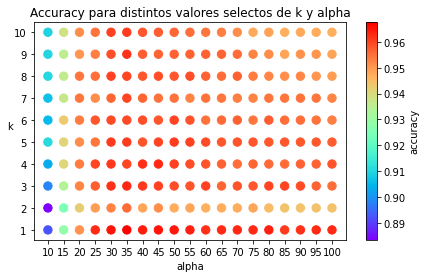

In [42]:
name_k_alpha_extense = "../dataExp/KNN_PCA_extense.csv"
plot_scatter(name_k_alpha_extense, "Accuracy para distintos valores selectos de k y alpha", (7,4))

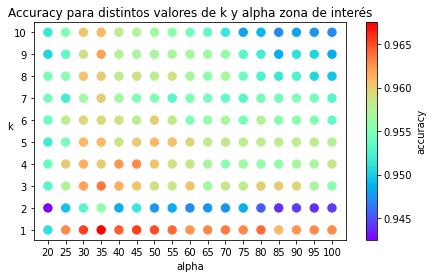

In [51]:
import matplotlib.pyplot as plt
import numpy as np

filename = "../dataExp/KNN_PCA_extense.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df = df[df["alpha"] >= 20] 

plot_scatter_df(df, "Accuracy para distintos valores de k y alpha zona de interés")


# Imprimir ordenados

In [102]:
filename = "../dataExp/KNN_PCA_extense.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df = df.sort_values("acc", ascending=False)
ranking = range(1,len(df["acc"])+1)
df["rank"] = ranking
print(df)

        k  alpha       time     acc  rank
50    1.0   35.0   6.983079  0.9675     1
70    1.0   45.0   8.045151  0.9655     2
40    1.0   30.0   6.831399  0.9655     3
80    1.0   50.0   8.223451  0.9650     4
60    1.0   40.0   8.244189  0.9645     5
140   1.0   80.0  12.119491  0.9640     6
90    1.0   55.0   9.048980  0.9640     7
120   1.0   70.0  10.774125  0.9635     8
52    3.0   35.0   7.085550  0.9635     9
73    4.0   45.0   8.220729  0.9630    10
180   1.0  100.0  18.913546  0.9630    11
170   1.0   95.0  14.829297  0.9630    12
110   1.0   65.0  10.191884  0.9630    13
130   1.0   75.0  11.831183  0.9630    14
30    1.0   25.0   6.759549  0.9630    15
63    4.0   40.0   8.332384  0.9625    16
100   1.0   60.0   9.682708  0.9625    17
160   1.0   90.0  14.091987  0.9625    18
58    9.0   35.0   7.396508  0.9620    19
42    3.0   30.0   6.934864  0.9620    20
62    3.0   40.0   8.276679  0.9615    21
43    4.0   30.0   6.995933  0.9615    22
150   1.0   85.0  13.906134  0.961

In [11]:
name_k_alpha_complete = "../dataExp/KNN_PCA_discrete.csv"
total_instances = 10000
ks = range(1,11)
alphas = range(1,101)

experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)

  0%|          | 2/1000 [00:05<38:22,  2.31s/it]  

Accuracy: 0.251
K: 1, Alpha: 1
Accuracy: 0.2615
K: 2, Alpha: 1


  0%|          | 3/1000 [00:05<22:36,  1.36s/it]

Accuracy: 0.2735
K: 3, Alpha: 1


  0%|          | 4/1000 [00:06<15:30,  1.07it/s]

Accuracy: 0.273
K: 4, Alpha: 1


  0%|          | 5/1000 [00:06<11:50,  1.40it/s]

Accuracy: 0.277
K: 5, Alpha: 1


  1%|          | 6/1000 [00:06<09:56,  1.67it/s]

Accuracy: 0.2705
K: 6, Alpha: 1


  1%|          | 7/1000 [00:07<08:58,  1.84it/s]

Accuracy: 0.2785
K: 7, Alpha: 1


  1%|          | 8/1000 [00:07<08:35,  1.92it/s]

Accuracy: 0.295
K: 8, Alpha: 1


  1%|          | 9/1000 [00:08<08:42,  1.90it/s]

Accuracy: 0.293
K: 9, Alpha: 1


  1%|          | 10/1000 [00:08<08:59,  1.83it/s]

Accuracy: 0.2985
K: 10, Alpha: 1


  1%|          | 12/1000 [00:14<23:03,  1.40s/it]

Accuracy: 0.366
K: 1, Alpha: 2
Accuracy: 0.3795
K: 2, Alpha: 2


  1%|▏         | 13/1000 [00:14<17:10,  1.04s/it]

Accuracy: 0.397
K: 3, Alpha: 2


  1%|▏         | 14/1000 [00:14<13:19,  1.23it/s]

Accuracy: 0.4095
K: 4, Alpha: 2


  2%|▏         | 15/1000 [00:14<10:53,  1.51it/s]

Accuracy: 0.416
K: 5, Alpha: 2


  2%|▏         | 16/1000 [00:15<09:25,  1.74it/s]

Accuracy: 0.4285
K: 6, Alpha: 2


  2%|▏         | 17/1000 [00:15<08:38,  1.89it/s]

Accuracy: 0.431
K: 7, Alpha: 2


  2%|▏         | 18/1000 [00:16<08:20,  1.96it/s]

Accuracy: 0.433
K: 8, Alpha: 2


  2%|▏         | 19/1000 [00:16<08:21,  1.96it/s]

Accuracy: 0.4295
K: 9, Alpha: 2


  2%|▏         | 20/1000 [00:17<08:36,  1.90it/s]

Accuracy: 0.439
K: 10, Alpha: 2


  2%|▏         | 22/1000 [00:22<21:26,  1.32s/it]

Accuracy: 0.476
K: 1, Alpha: 3
Accuracy: 0.488
K: 2, Alpha: 3


  2%|▏         | 23/1000 [00:22<16:04,  1.01it/s]

Accuracy: 0.485
K: 3, Alpha: 3


  2%|▏         | 24/1000 [00:22<12:34,  1.29it/s]

Accuracy: 0.5065
K: 4, Alpha: 3


  2%|▎         | 25/1000 [00:22<10:22,  1.57it/s]

Accuracy: 0.5115
K: 5, Alpha: 3


  3%|▎         | 26/1000 [00:23<09:03,  1.79it/s]

Accuracy: 0.515
K: 6, Alpha: 3


  3%|▎         | 27/1000 [00:23<08:22,  1.94it/s]

Accuracy: 0.5195
K: 7, Alpha: 3


  3%|▎         | 28/1000 [00:24<08:07,  1.99it/s]

Accuracy: 0.528
K: 8, Alpha: 3


  3%|▎         | 29/1000 [00:24<08:11,  1.98it/s]

Accuracy: 0.5225
K: 9, Alpha: 3


  3%|▎         | 30/1000 [00:25<08:27,  1.91it/s]

Accuracy: 0.5305
K: 10, Alpha: 3


  3%|▎         | 32/1000 [00:30<21:25,  1.33s/it]

Accuracy: 0.5835
K: 1, Alpha: 4
Accuracy: 0.566
K: 2, Alpha: 4


  3%|▎         | 33/1000 [00:30<16:03,  1.00it/s]

Accuracy: 0.6135
K: 3, Alpha: 4


  3%|▎         | 34/1000 [00:30<12:34,  1.28it/s]

Accuracy: 0.621
K: 4, Alpha: 4


  4%|▎         | 35/1000 [00:31<10:21,  1.55it/s]

Accuracy: 0.6325
K: 5, Alpha: 4


  4%|▎         | 36/1000 [00:31<09:01,  1.78it/s]

Accuracy: 0.6285
K: 6, Alpha: 4


  4%|▎         | 37/1000 [00:31<08:19,  1.93it/s]

Accuracy: 0.6375
K: 7, Alpha: 4


  4%|▍         | 38/1000 [00:32<08:04,  1.99it/s]

Accuracy: 0.6365
K: 8, Alpha: 4


  4%|▍         | 39/1000 [00:32<08:06,  1.97it/s]

Accuracy: 0.6405
K: 9, Alpha: 4


  4%|▍         | 40/1000 [00:33<08:22,  1.91it/s]

Accuracy: 0.6445
K: 10, Alpha: 4


  4%|▍         | 42/1000 [00:38<21:14,  1.33s/it]

Accuracy: 0.691
K: 1, Alpha: 5
Accuracy: 0.681
K: 2, Alpha: 5


  4%|▍         | 43/1000 [00:38<15:57,  1.00s/it]

Accuracy: 0.7155
K: 3, Alpha: 5


  4%|▍         | 44/1000 [00:39<12:28,  1.28it/s]

Accuracy: 0.722
K: 4, Alpha: 5


  4%|▍         | 45/1000 [00:39<10:15,  1.55it/s]

Accuracy: 0.7145
K: 5, Alpha: 5


  5%|▍         | 46/1000 [00:39<08:56,  1.78it/s]

Accuracy: 0.718
K: 6, Alpha: 5


  5%|▍         | 47/1000 [00:40<08:15,  1.92it/s]

Accuracy: 0.727
K: 7, Alpha: 5


  5%|▍         | 48/1000 [00:40<08:01,  1.98it/s]

Accuracy: 0.7325
K: 8, Alpha: 5


  5%|▍         | 49/1000 [00:41<08:03,  1.97it/s]

Accuracy: 0.733
K: 9, Alpha: 5


  5%|▌         | 50/1000 [00:41<08:18,  1.90it/s]

Accuracy: 0.7335
K: 10, Alpha: 5


  5%|▌         | 52/1000 [00:46<20:58,  1.33s/it]

Accuracy: 0.7795
K: 1, Alpha: 6
Accuracy: 0.7675
K: 2, Alpha: 6


  5%|▌         | 53/1000 [00:46<15:46,  1.00it/s]

Accuracy: 0.79
K: 3, Alpha: 6


  5%|▌         | 54/1000 [00:47<12:22,  1.27it/s]

Accuracy: 0.812
K: 4, Alpha: 6


  6%|▌         | 55/1000 [00:47<10:13,  1.54it/s]

Accuracy: 0.8025
K: 5, Alpha: 6


  6%|▌         | 56/1000 [00:47<08:56,  1.76it/s]

Accuracy: 0.8145
K: 6, Alpha: 6


  6%|▌         | 57/1000 [00:48<08:17,  1.90it/s]

Accuracy: 0.817
K: 7, Alpha: 6


  6%|▌         | 58/1000 [00:48<08:02,  1.95it/s]

Accuracy: 0.8145
K: 8, Alpha: 6


  6%|▌         | 59/1000 [00:49<08:05,  1.94it/s]

Accuracy: 0.8165
K: 9, Alpha: 6


  6%|▌         | 60/1000 [00:49<08:21,  1.87it/s]

Accuracy: 0.815
K: 10, Alpha: 6


  6%|▌         | 62/1000 [00:55<21:13,  1.36s/it]

Accuracy: 0.823
K: 1, Alpha: 7
Accuracy: 0.826
K: 2, Alpha: 7


  6%|▋         | 63/1000 [00:55<15:58,  1.02s/it]

Accuracy: 0.847
K: 3, Alpha: 7


  6%|▋         | 64/1000 [00:55<12:31,  1.25it/s]

Accuracy: 0.848
K: 4, Alpha: 7


  6%|▋         | 65/1000 [00:55<10:20,  1.51it/s]

Accuracy: 0.8585
K: 5, Alpha: 7


  7%|▋         | 66/1000 [00:56<09:02,  1.72it/s]

Accuracy: 0.851
K: 6, Alpha: 7


  7%|▋         | 67/1000 [00:56<08:20,  1.86it/s]

Accuracy: 0.8595
K: 7, Alpha: 7


  7%|▋         | 68/1000 [00:57<08:05,  1.92it/s]

Accuracy: 0.847
K: 8, Alpha: 7


  7%|▋         | 69/1000 [00:57<08:07,  1.91it/s]

Accuracy: 0.852
K: 9, Alpha: 7


  7%|▋         | 70/1000 [00:58<08:22,  1.85it/s]

Accuracy: 0.852
K: 10, Alpha: 7


  7%|▋         | 71/1000 [01:03<28:55,  1.87s/it]

Accuracy: 0.8555
K: 1, Alpha: 8


  7%|▋         | 72/1000 [01:03<21:12,  1.37s/it]

Accuracy: 0.8445
K: 2, Alpha: 8


  7%|▋         | 73/1000 [01:03<16:01,  1.04s/it]

Accuracy: 0.8725
K: 3, Alpha: 8


  7%|▋         | 74/1000 [01:04<12:38,  1.22it/s]

Accuracy: 0.8675
K: 4, Alpha: 8


  8%|▊         | 75/1000 [01:04<10:29,  1.47it/s]

Accuracy: 0.8735
K: 5, Alpha: 8


  8%|▊         | 76/1000 [01:04<09:11,  1.67it/s]

Accuracy: 0.87
K: 6, Alpha: 8


  8%|▊         | 77/1000 [01:05<08:31,  1.80it/s]

Accuracy: 0.872
K: 7, Alpha: 8


  8%|▊         | 78/1000 [01:05<08:16,  1.86it/s]

Accuracy: 0.873
K: 8, Alpha: 8


  8%|▊         | 79/1000 [01:06<08:18,  1.85it/s]

Accuracy: 0.8765
K: 9, Alpha: 8


  8%|▊         | 80/1000 [01:06<08:34,  1.79it/s]

Accuracy: 0.8775
K: 10, Alpha: 8


  8%|▊         | 81/1000 [01:11<28:38,  1.87s/it]

Accuracy: 0.8695
K: 1, Alpha: 9


  8%|▊         | 82/1000 [01:12<21:00,  1.37s/it]

Accuracy: 0.8655
K: 2, Alpha: 9


  8%|▊         | 83/1000 [01:12<15:53,  1.04s/it]

Accuracy: 0.8895
K: 3, Alpha: 9


  8%|▊         | 84/1000 [01:12<12:31,  1.22it/s]

Accuracy: 0.8915
K: 4, Alpha: 9


  8%|▊         | 85/1000 [01:13<10:24,  1.46it/s]

Accuracy: 0.8945
K: 5, Alpha: 9


  9%|▊         | 86/1000 [01:13<09:08,  1.67it/s]

Accuracy: 0.8895
K: 6, Alpha: 9


  9%|▊         | 87/1000 [01:13<08:28,  1.80it/s]

Accuracy: 0.8905
K: 7, Alpha: 9


  9%|▉         | 88/1000 [01:14<08:14,  1.85it/s]

Accuracy: 0.8905
K: 8, Alpha: 9


  9%|▉         | 89/1000 [01:14<08:16,  1.84it/s]

Accuracy: 0.8905
K: 9, Alpha: 9


  9%|▉         | 90/1000 [01:15<08:30,  1.78it/s]

Accuracy: 0.887
K: 10, Alpha: 9


  9%|▉         | 91/1000 [01:20<28:39,  1.89s/it]

Accuracy: 0.8925
K: 1, Alpha: 10


  9%|▉         | 92/1000 [01:20<21:06,  1.39s/it]

Accuracy: 0.8835
K: 2, Alpha: 10


  9%|▉         | 93/1000 [01:21<16:03,  1.06s/it]

Accuracy: 0.8985
K: 3, Alpha: 10


  9%|▉         | 94/1000 [01:21<12:44,  1.18it/s]

Accuracy: 0.9035
K: 4, Alpha: 10


 10%|▉         | 95/1000 [01:21<10:37,  1.42it/s]

Accuracy: 0.911
K: 5, Alpha: 10


 10%|▉         | 96/1000 [01:22<09:22,  1.61it/s]

Accuracy: 0.9055
K: 6, Alpha: 10


 10%|▉         | 97/1000 [01:22<08:42,  1.73it/s]

Accuracy: 0.9065
K: 7, Alpha: 10


 10%|▉         | 98/1000 [01:23<08:28,  1.78it/s]

Accuracy: 0.9105
K: 8, Alpha: 10


 10%|▉         | 99/1000 [01:23<08:30,  1.77it/s]

Accuracy: 0.91
K: 9, Alpha: 10


 10%|█         | 100/1000 [01:24<08:45,  1.71it/s]

Accuracy: 0.9095
K: 10, Alpha: 10


 10%|█         | 101/1000 [01:29<28:51,  1.93s/it]

Accuracy: 0.906
K: 1, Alpha: 11


 10%|█         | 102/1000 [01:29<21:15,  1.42s/it]

Accuracy: 0.8895
K: 2, Alpha: 11


 10%|█         | 103/1000 [01:30<16:08,  1.08s/it]

Accuracy: 0.9085
K: 3, Alpha: 11


 10%|█         | 104/1000 [01:30<12:47,  1.17it/s]

Accuracy: 0.913
K: 4, Alpha: 11


 10%|█         | 105/1000 [01:30<10:39,  1.40it/s]

Accuracy: 0.911
K: 5, Alpha: 11


 11%|█         | 106/1000 [01:31<09:22,  1.59it/s]

Accuracy: 0.915
K: 6, Alpha: 11


 11%|█         | 107/1000 [01:31<08:41,  1.71it/s]

Accuracy: 0.912
K: 7, Alpha: 11


 11%|█         | 108/1000 [01:32<08:26,  1.76it/s]

Accuracy: 0.9165
K: 8, Alpha: 11


 11%|█         | 109/1000 [01:32<08:27,  1.76it/s]

Accuracy: 0.911
K: 9, Alpha: 11


 11%|█         | 110/1000 [01:33<08:42,  1.70it/s]

Accuracy: 0.9105
K: 10, Alpha: 11


 11%|█         | 111/1000 [01:38<28:30,  1.92s/it]

Accuracy: 0.913
K: 1, Alpha: 12


 11%|█         | 112/1000 [01:38<21:03,  1.42s/it]

Accuracy: 0.902
K: 2, Alpha: 12


 11%|█▏        | 113/1000 [01:38<16:03,  1.09s/it]

Accuracy: 0.916
K: 3, Alpha: 12


 11%|█▏        | 114/1000 [01:39<12:46,  1.16it/s]

Accuracy: 0.919
K: 4, Alpha: 12


 12%|█▏        | 115/1000 [01:39<10:40,  1.38it/s]

Accuracy: 0.919
K: 5, Alpha: 12


 12%|█▏        | 116/1000 [01:40<09:26,  1.56it/s]

Accuracy: 0.925
K: 6, Alpha: 12


 12%|█▏        | 117/1000 [01:40<08:46,  1.68it/s]

Accuracy: 0.92
K: 7, Alpha: 12


 12%|█▏        | 118/1000 [01:41<08:31,  1.72it/s]

Accuracy: 0.92
K: 8, Alpha: 12


 12%|█▏        | 119/1000 [01:41<08:33,  1.72it/s]

Accuracy: 0.9185
K: 9, Alpha: 12


 12%|█▏        | 120/1000 [01:42<08:47,  1.67it/s]

Accuracy: 0.918
K: 10, Alpha: 12


 12%|█▏        | 121/1000 [01:47<29:40,  2.03s/it]

Accuracy: 0.9225
K: 1, Alpha: 13


 12%|█▏        | 122/1000 [01:48<21:53,  1.50s/it]

Accuracy: 0.9195
K: 2, Alpha: 13


 12%|█▏        | 123/1000 [01:48<16:39,  1.14s/it]

Accuracy: 0.927
K: 3, Alpha: 13


 12%|█▏        | 124/1000 [01:48<13:11,  1.11it/s]

Accuracy: 0.9315
K: 4, Alpha: 13


 12%|█▎        | 125/1000 [01:49<10:59,  1.33it/s]

Accuracy: 0.928
K: 5, Alpha: 13


 13%|█▎        | 126/1000 [01:49<09:39,  1.51it/s]

Accuracy: 0.9285
K: 6, Alpha: 13


 13%|█▎        | 127/1000 [01:50<08:55,  1.63it/s]

Accuracy: 0.924
K: 7, Alpha: 13


 13%|█▎        | 128/1000 [01:50<08:38,  1.68it/s]

Accuracy: 0.926
K: 8, Alpha: 13


 13%|█▎        | 129/1000 [01:51<08:38,  1.68it/s]

Accuracy: 0.925
K: 9, Alpha: 13


 13%|█▎        | 130/1000 [01:51<08:50,  1.64it/s]

Accuracy: 0.925
K: 10, Alpha: 13


 13%|█▎        | 131/1000 [01:57<29:51,  2.06s/it]

Accuracy: 0.9345
K: 1, Alpha: 14


 13%|█▎        | 132/1000 [01:57<22:05,  1.53s/it]

Accuracy: 0.925
K: 2, Alpha: 14


 13%|█▎        | 133/1000 [01:57<16:52,  1.17s/it]

Accuracy: 0.936
K: 3, Alpha: 14


 13%|█▎        | 134/1000 [01:58<13:25,  1.08it/s]

Accuracy: 0.943
K: 4, Alpha: 14


 14%|█▎        | 135/1000 [01:58<11:13,  1.29it/s]

Accuracy: 0.94
K: 5, Alpha: 14


 14%|█▎        | 136/1000 [01:59<09:53,  1.46it/s]

Accuracy: 0.939
K: 6, Alpha: 14


 14%|█▎        | 137/1000 [01:59<09:09,  1.57it/s]

Accuracy: 0.9345
K: 7, Alpha: 14


 14%|█▍        | 138/1000 [02:00<08:51,  1.62it/s]

Accuracy: 0.933
K: 8, Alpha: 14


 14%|█▍        | 139/1000 [02:00<08:51,  1.62it/s]

Accuracy: 0.932
K: 9, Alpha: 14


 14%|█▍        | 140/1000 [02:01<09:03,  1.58it/s]

Accuracy: 0.935
K: 10, Alpha: 14


 14%|█▍        | 141/1000 [02:07<29:58,  2.09s/it]

Accuracy: 0.9285
K: 1, Alpha: 15


 14%|█▍        | 142/1000 [02:07<22:08,  1.55s/it]

Accuracy: 0.925
K: 2, Alpha: 15


 14%|█▍        | 143/1000 [02:07<16:52,  1.18s/it]

Accuracy: 0.934
K: 3, Alpha: 15


 14%|█▍        | 144/1000 [02:08<13:24,  1.06it/s]

Accuracy: 0.941
K: 4, Alpha: 15


 14%|█▍        | 145/1000 [02:08<11:11,  1.27it/s]

Accuracy: 0.9415
K: 5, Alpha: 15


 15%|█▍        | 146/1000 [02:08<09:49,  1.45it/s]

Accuracy: 0.943
K: 6, Alpha: 15


 15%|█▍        | 147/1000 [02:09<09:05,  1.56it/s]

Accuracy: 0.937
K: 7, Alpha: 15


 15%|█▍        | 148/1000 [02:10<08:46,  1.62it/s]

Accuracy: 0.936
K: 8, Alpha: 15


 15%|█▍        | 149/1000 [02:10<08:45,  1.62it/s]

Accuracy: 0.9355
K: 9, Alpha: 15


 15%|█▌        | 150/1000 [02:11<08:57,  1.58it/s]

Accuracy: 0.9385
K: 10, Alpha: 15


 15%|█▌        | 151/1000 [02:16<29:28,  2.08s/it]

Accuracy: 0.938
K: 1, Alpha: 16


 15%|█▌        | 152/1000 [02:17<21:53,  1.55s/it]

Accuracy: 0.9345
K: 2, Alpha: 16


 15%|█▌        | 153/1000 [02:17<16:48,  1.19s/it]

Accuracy: 0.945
K: 3, Alpha: 16


 15%|█▌        | 154/1000 [02:17<13:26,  1.05it/s]

Accuracy: 0.9475
K: 4, Alpha: 16


 16%|█▌        | 155/1000 [02:18<11:18,  1.25it/s]

Accuracy: 0.9435
K: 5, Alpha: 16


 16%|█▌        | 156/1000 [02:18<10:00,  1.41it/s]

Accuracy: 0.942
K: 6, Alpha: 16


 16%|█▌        | 157/1000 [02:19<09:17,  1.51it/s]

Accuracy: 0.943
K: 7, Alpha: 16


 16%|█▌        | 158/1000 [02:19<08:59,  1.56it/s]

Accuracy: 0.945
K: 8, Alpha: 16


 16%|█▌        | 159/1000 [02:20<08:59,  1.56it/s]

Accuracy: 0.9445
K: 9, Alpha: 16


 16%|█▌        | 160/1000 [02:21<09:11,  1.52it/s]

Accuracy: 0.9445
K: 10, Alpha: 16


 16%|█▌        | 161/1000 [02:26<29:55,  2.14s/it]

Accuracy: 0.942
K: 1, Alpha: 17


 16%|█▌        | 162/1000 [02:27<22:13,  1.59s/it]

Accuracy: 0.939
K: 2, Alpha: 17


 16%|█▋        | 163/1000 [02:27<17:02,  1.22s/it]

Accuracy: 0.947
K: 3, Alpha: 17


 16%|█▋        | 164/1000 [02:27<13:36,  1.02it/s]

Accuracy: 0.951
K: 4, Alpha: 17


 16%|█▋        | 165/1000 [02:28<11:25,  1.22it/s]

Accuracy: 0.9495
K: 5, Alpha: 17


 17%|█▋        | 166/1000 [02:28<10:05,  1.38it/s]

Accuracy: 0.9455
K: 6, Alpha: 17


 17%|█▋        | 167/1000 [02:29<09:21,  1.48it/s]

Accuracy: 0.942
K: 7, Alpha: 17


 17%|█▋        | 168/1000 [02:30<09:02,  1.53it/s]

Accuracy: 0.948
K: 8, Alpha: 17


 17%|█▋        | 169/1000 [02:30<09:00,  1.54it/s]

Accuracy: 0.948
K: 9, Alpha: 17


 17%|█▋        | 170/1000 [02:31<09:11,  1.51it/s]

Accuracy: 0.949
K: 10, Alpha: 17


 17%|█▋        | 171/1000 [02:36<29:31,  2.14s/it]

Accuracy: 0.948
K: 1, Alpha: 18


 17%|█▋        | 172/1000 [02:37<22:00,  1.60s/it]

Accuracy: 0.94
K: 2, Alpha: 18


 17%|█▋        | 173/1000 [02:37<16:57,  1.23s/it]

Accuracy: 0.9515
K: 3, Alpha: 18


 17%|█▋        | 174/1000 [02:38<13:37,  1.01it/s]

Accuracy: 0.9535
K: 4, Alpha: 18


 18%|█▊        | 175/1000 [02:38<11:29,  1.20it/s]

Accuracy: 0.9505
K: 5, Alpha: 18


 18%|█▊        | 176/1000 [02:39<10:12,  1.35it/s]

Accuracy: 0.9505
K: 6, Alpha: 18


 18%|█▊        | 177/1000 [02:39<09:29,  1.45it/s]

Accuracy: 0.946
K: 7, Alpha: 18


 18%|█▊        | 178/1000 [02:40<09:11,  1.49it/s]

Accuracy: 0.9465
K: 8, Alpha: 18


 18%|█▊        | 179/1000 [02:40<09:09,  1.49it/s]

Accuracy: 0.948
K: 9, Alpha: 18


 18%|█▊        | 180/1000 [02:41<09:20,  1.46it/s]

Accuracy: 0.9465
K: 10, Alpha: 18


 18%|█▊        | 181/1000 [02:47<29:54,  2.19s/it]

Accuracy: 0.9495
K: 1, Alpha: 19


 18%|█▊        | 182/1000 [02:47<22:14,  1.63s/it]

Accuracy: 0.944
K: 2, Alpha: 19


 18%|█▊        | 183/1000 [02:48<17:05,  1.26s/it]

Accuracy: 0.9565
K: 3, Alpha: 19


 18%|█▊        | 184/1000 [02:48<13:42,  1.01s/it]

Accuracy: 0.9525
K: 4, Alpha: 19


 18%|█▊        | 185/1000 [02:48<11:30,  1.18it/s]

Accuracy: 0.955
K: 5, Alpha: 19


 19%|█▊        | 186/1000 [02:49<10:10,  1.33it/s]

Accuracy: 0.955
K: 6, Alpha: 19


 19%|█▊        | 187/1000 [02:50<09:26,  1.43it/s]

Accuracy: 0.9475
K: 7, Alpha: 19


 19%|█▉        | 188/1000 [02:50<09:07,  1.48it/s]

Accuracy: 0.951
K: 8, Alpha: 19


 19%|█▉        | 189/1000 [02:51<09:05,  1.49it/s]

Accuracy: 0.949
K: 9, Alpha: 19


 19%|█▉        | 190/1000 [02:52<09:15,  1.46it/s]

Accuracy: 0.9525
K: 10, Alpha: 19


 19%|█▉        | 191/1000 [02:57<30:02,  2.23s/it]

Accuracy: 0.951
K: 1, Alpha: 20


 19%|█▉        | 192/1000 [02:58<22:27,  1.67s/it]

Accuracy: 0.9425
K: 2, Alpha: 20


 19%|█▉        | 193/1000 [02:58<17:20,  1.29s/it]

Accuracy: 0.953
K: 3, Alpha: 20


 19%|█▉        | 194/1000 [02:59<13:58,  1.04s/it]

Accuracy: 0.954
K: 4, Alpha: 20


 20%|█▉        | 195/1000 [02:59<11:48,  1.14it/s]

Accuracy: 0.952
K: 5, Alpha: 20


 20%|█▉        | 196/1000 [03:00<10:28,  1.28it/s]

Accuracy: 0.954
K: 6, Alpha: 20


 20%|█▉        | 197/1000 [03:00<09:44,  1.37it/s]

Accuracy: 0.9545
K: 7, Alpha: 20


 20%|█▉        | 198/1000 [03:01<09:25,  1.42it/s]

Accuracy: 0.9545
K: 8, Alpha: 20


 20%|█▉        | 199/1000 [03:02<09:23,  1.42it/s]

Accuracy: 0.9505
K: 9, Alpha: 20


 20%|██        | 200/1000 [03:02<09:33,  1.39it/s]

Accuracy: 0.9515
K: 10, Alpha: 20


 20%|██        | 201/1000 [03:08<30:28,  2.29s/it]

Accuracy: 0.954
K: 1, Alpha: 21


 20%|██        | 202/1000 [03:09<22:42,  1.71s/it]

Accuracy: 0.9465
K: 2, Alpha: 21


 20%|██        | 203/1000 [03:09<17:27,  1.31s/it]

Accuracy: 0.9555
K: 3, Alpha: 21


 20%|██        | 204/1000 [03:10<13:59,  1.05s/it]

Accuracy: 0.9515
K: 4, Alpha: 21


 20%|██        | 205/1000 [03:10<11:45,  1.13it/s]

Accuracy: 0.954
K: 5, Alpha: 21


 21%|██        | 206/1000 [03:11<10:22,  1.28it/s]

Accuracy: 0.9555
K: 6, Alpha: 21


 21%|██        | 207/1000 [03:11<09:35,  1.38it/s]

Accuracy: 0.953
K: 7, Alpha: 21


 21%|██        | 208/1000 [03:12<09:14,  1.43it/s]

Accuracy: 0.9525
K: 8, Alpha: 21


 21%|██        | 209/1000 [03:13<09:10,  1.44it/s]

Accuracy: 0.9505
K: 9, Alpha: 21


 21%|██        | 210/1000 [03:13<09:19,  1.41it/s]

Accuracy: 0.952
K: 10, Alpha: 21


 21%|██        | 211/1000 [03:19<29:17,  2.23s/it]

Accuracy: 0.9605
K: 1, Alpha: 22


 21%|██        | 212/1000 [03:19<21:57,  1.67s/it]

Accuracy: 0.9525
K: 2, Alpha: 22


 21%|██▏       | 213/1000 [03:20<17:02,  1.30s/it]

Accuracy: 0.9595
K: 3, Alpha: 22


 21%|██▏       | 214/1000 [03:20<13:49,  1.06s/it]

Accuracy: 0.9575
K: 4, Alpha: 22


 22%|██▏       | 215/1000 [03:21<11:44,  1.11it/s]

Accuracy: 0.9545
K: 5, Alpha: 22


 22%|██▏       | 216/1000 [03:21<10:28,  1.25it/s]

Accuracy: 0.954
K: 6, Alpha: 22


 22%|██▏       | 217/1000 [03:22<09:45,  1.34it/s]

Accuracy: 0.951
K: 7, Alpha: 22


 22%|██▏       | 218/1000 [03:23<09:26,  1.38it/s]

Accuracy: 0.9515
K: 8, Alpha: 22


 22%|██▏       | 219/1000 [03:23<09:24,  1.38it/s]

Accuracy: 0.95
K: 9, Alpha: 22


 22%|██▏       | 220/1000 [03:24<09:34,  1.36it/s]

Accuracy: 0.9505
K: 10, Alpha: 22


 22%|██▏       | 221/1000 [03:30<29:48,  2.30s/it]

Accuracy: 0.9595
K: 1, Alpha: 23


 22%|██▏       | 222/1000 [03:30<22:16,  1.72s/it]

Accuracy: 0.9475
K: 2, Alpha: 23


 22%|██▏       | 223/1000 [03:31<17:11,  1.33s/it]

Accuracy: 0.9585
K: 3, Alpha: 23


 22%|██▏       | 224/1000 [03:31<13:49,  1.07s/it]

Accuracy: 0.9535
K: 4, Alpha: 23


 22%|██▎       | 225/1000 [03:32<11:39,  1.11it/s]

Accuracy: 0.953
K: 5, Alpha: 23


 23%|██▎       | 226/1000 [03:32<10:20,  1.25it/s]

Accuracy: 0.9545
K: 6, Alpha: 23


 23%|██▎       | 227/1000 [03:33<09:35,  1.34it/s]

Accuracy: 0.95
K: 7, Alpha: 23


 23%|██▎       | 228/1000 [03:34<09:15,  1.39it/s]

Accuracy: 0.9535
K: 8, Alpha: 23


 23%|██▎       | 229/1000 [03:34<09:12,  1.40it/s]

Accuracy: 0.953
K: 9, Alpha: 23


 23%|██▎       | 230/1000 [03:35<09:20,  1.37it/s]

Accuracy: 0.949
K: 10, Alpha: 23


 23%|██▎       | 231/1000 [03:41<30:06,  2.35s/it]

Accuracy: 0.96
K: 1, Alpha: 24


 23%|██▎       | 232/1000 [03:42<22:37,  1.77s/it]

Accuracy: 0.9445
K: 2, Alpha: 24


 23%|██▎       | 233/1000 [03:42<17:34,  1.38s/it]

Accuracy: 0.9585
K: 3, Alpha: 24


 23%|██▎       | 234/1000 [03:43<14:14,  1.11s/it]

Accuracy: 0.957
K: 4, Alpha: 24


 24%|██▎       | 235/1000 [03:43<12:04,  1.06it/s]

Accuracy: 0.952
K: 5, Alpha: 24


 24%|██▎       | 236/1000 [03:44<10:45,  1.18it/s]

Accuracy: 0.9565
K: 6, Alpha: 24


 24%|██▎       | 237/1000 [03:45<10:00,  1.27it/s]

Accuracy: 0.953
K: 7, Alpha: 24


 24%|██▍       | 238/1000 [03:45<09:39,  1.31it/s]

Accuracy: 0.9545
K: 8, Alpha: 24


 24%|██▍       | 239/1000 [03:46<09:36,  1.32it/s]

Accuracy: 0.9525
K: 9, Alpha: 24


 24%|██▍       | 240/1000 [03:47<09:45,  1.30it/s]

Accuracy: 0.9515
K: 10, Alpha: 24


 24%|██▍       | 241/1000 [03:53<29:43,  2.35s/it]

Accuracy: 0.963
K: 1, Alpha: 25


 24%|██▍       | 242/1000 [03:53<22:15,  1.76s/it]

Accuracy: 0.9495
K: 2, Alpha: 25


 24%|██▍       | 243/1000 [03:54<17:14,  1.37s/it]

Accuracy: 0.9575
K: 3, Alpha: 25


 24%|██▍       | 244/1000 [03:54<13:54,  1.10s/it]

Accuracy: 0.96
K: 4, Alpha: 25


 24%|██▍       | 245/1000 [03:55<11:45,  1.07it/s]

Accuracy: 0.9545
K: 5, Alpha: 25


 25%|██▍       | 246/1000 [03:55<10:26,  1.20it/s]

Accuracy: 0.958
K: 6, Alpha: 25


 25%|██▍       | 247/1000 [03:56<09:41,  1.29it/s]

Accuracy: 0.952
K: 7, Alpha: 25


 25%|██▍       | 248/1000 [03:57<09:21,  1.34it/s]

Accuracy: 0.9555
K: 8, Alpha: 25


 25%|██▍       | 249/1000 [03:57<09:17,  1.35it/s]

Accuracy: 0.9535
K: 9, Alpha: 25


 25%|██▌       | 250/1000 [03:58<09:26,  1.32it/s]

Accuracy: 0.955
K: 10, Alpha: 25


 25%|██▌       | 251/1000 [04:04<29:37,  2.37s/it]

Accuracy: 0.964
K: 1, Alpha: 26


 25%|██▌       | 252/1000 [04:05<22:18,  1.79s/it]

Accuracy: 0.9495
K: 2, Alpha: 26


 25%|██▌       | 253/1000 [04:05<17:21,  1.39s/it]

Accuracy: 0.9605
K: 3, Alpha: 26


 25%|██▌       | 254/1000 [04:06<14:05,  1.13s/it]

Accuracy: 0.9595
K: 4, Alpha: 26


 26%|██▌       | 255/1000 [04:06<12:00,  1.03it/s]

Accuracy: 0.9555
K: 5, Alpha: 26


 26%|██▌       | 256/1000 [04:07<10:42,  1.16it/s]

Accuracy: 0.958
K: 6, Alpha: 26


 26%|██▌       | 257/1000 [04:08<09:57,  1.24it/s]

Accuracy: 0.955
K: 7, Alpha: 26


 26%|██▌       | 258/1000 [04:08<09:37,  1.28it/s]

Accuracy: 0.9575
K: 8, Alpha: 26


 26%|██▌       | 259/1000 [04:09<09:33,  1.29it/s]

Accuracy: 0.9555
K: 9, Alpha: 26


 26%|██▌       | 260/1000 [04:10<09:41,  1.27it/s]

Accuracy: 0.956
K: 10, Alpha: 26


 26%|██▌       | 261/1000 [04:16<29:39,  2.41s/it]

Accuracy: 0.964
K: 1, Alpha: 27


 26%|██▌       | 262/1000 [04:16<22:16,  1.81s/it]

Accuracy: 0.9535
K: 2, Alpha: 27


 26%|██▋       | 263/1000 [04:17<17:17,  1.41s/it]

Accuracy: 0.9615
K: 3, Alpha: 27


 26%|██▋       | 264/1000 [04:17<13:58,  1.14s/it]

Accuracy: 0.96
K: 4, Alpha: 27


 26%|██▋       | 265/1000 [04:18<11:50,  1.03it/s]

Accuracy: 0.957
K: 5, Alpha: 27


 27%|██▋       | 266/1000 [04:19<10:31,  1.16it/s]

Accuracy: 0.9565
K: 6, Alpha: 27


 27%|██▋       | 267/1000 [04:19<09:46,  1.25it/s]

Accuracy: 0.955
K: 7, Alpha: 27


 27%|██▋       | 268/1000 [04:20<09:26,  1.29it/s]

Accuracy: 0.9565
K: 8, Alpha: 27


 27%|██▋       | 269/1000 [04:21<09:21,  1.30it/s]

Accuracy: 0.9575
K: 9, Alpha: 27


 27%|██▋       | 270/1000 [04:22<09:29,  1.28it/s]

Accuracy: 0.957
K: 10, Alpha: 27


 27%|██▋       | 271/1000 [04:28<29:54,  2.46s/it]

Accuracy: 0.966
K: 1, Alpha: 28


 27%|██▋       | 272/1000 [04:28<22:33,  1.86s/it]

Accuracy: 0.9515
K: 2, Alpha: 28


 27%|██▋       | 273/1000 [04:29<17:37,  1.45s/it]

Accuracy: 0.9615
K: 3, Alpha: 28


 27%|██▋       | 274/1000 [04:29<14:20,  1.19s/it]

Accuracy: 0.962
K: 4, Alpha: 28


 28%|██▊       | 275/1000 [04:30<12:12,  1.01s/it]

Accuracy: 0.957
K: 5, Alpha: 28


 28%|██▊       | 276/1000 [04:31<10:52,  1.11it/s]

Accuracy: 0.958
K: 6, Alpha: 28


 28%|██▊       | 277/1000 [04:31<10:08,  1.19it/s]

Accuracy: 0.9555
K: 7, Alpha: 28


 28%|██▊       | 278/1000 [04:32<09:47,  1.23it/s]

Accuracy: 0.9585
K: 8, Alpha: 28


 28%|██▊       | 279/1000 [04:33<09:42,  1.24it/s]

Accuracy: 0.958
K: 9, Alpha: 28


 28%|██▊       | 280/1000 [04:34<09:50,  1.22it/s]

Accuracy: 0.9595
K: 10, Alpha: 28


 28%|██▊       | 281/1000 [04:40<29:59,  2.50s/it]

Accuracy: 0.965
K: 1, Alpha: 29


 28%|██▊       | 282/1000 [04:41<22:34,  1.89s/it]

Accuracy: 0.953
K: 2, Alpha: 29


 28%|██▊       | 283/1000 [04:41<17:33,  1.47s/it]

Accuracy: 0.9615
K: 3, Alpha: 29


 28%|██▊       | 284/1000 [04:42<14:14,  1.19s/it]

Accuracy: 0.962
K: 4, Alpha: 29


 28%|██▊       | 285/1000 [04:42<12:04,  1.01s/it]

Accuracy: 0.9605
K: 5, Alpha: 29


 29%|██▊       | 286/1000 [04:43<10:44,  1.11it/s]

Accuracy: 0.9605
K: 6, Alpha: 29


 29%|██▊       | 287/1000 [04:44<09:58,  1.19it/s]

Accuracy: 0.9585
K: 7, Alpha: 29


 29%|██▉       | 288/1000 [04:44<09:36,  1.24it/s]

Accuracy: 0.9595
K: 8, Alpha: 29


 29%|██▉       | 289/1000 [04:45<09:30,  1.25it/s]

Accuracy: 0.9595
K: 9, Alpha: 29


 29%|██▉       | 290/1000 [04:46<09:36,  1.23it/s]

Accuracy: 0.957
K: 10, Alpha: 29


 29%|██▉       | 291/1000 [04:52<29:24,  2.49s/it]

Accuracy: 0.9655
K: 1, Alpha: 30


 29%|██▉       | 292/1000 [04:53<22:23,  1.90s/it]

Accuracy: 0.953
K: 2, Alpha: 30


 29%|██▉       | 293/1000 [04:53<17:38,  1.50s/it]

Accuracy: 0.962
K: 3, Alpha: 30


 29%|██▉       | 294/1000 [04:54<14:30,  1.23s/it]

Accuracy: 0.9615
K: 4, Alpha: 30


 30%|██▉       | 295/1000 [04:55<12:28,  1.06s/it]

Accuracy: 0.961
K: 5, Alpha: 30


 30%|██▉       | 296/1000 [04:55<11:12,  1.05it/s]

Accuracy: 0.9595
K: 6, Alpha: 30


 30%|██▉       | 297/1000 [04:56<10:30,  1.12it/s]

Accuracy: 0.9565
K: 7, Alpha: 30


 30%|██▉       | 298/1000 [04:57<10:10,  1.15it/s]

Accuracy: 0.9605
K: 8, Alpha: 30


 30%|██▉       | 299/1000 [04:58<10:05,  1.16it/s]

Accuracy: 0.959
K: 9, Alpha: 30


 30%|███       | 300/1000 [04:59<10:12,  1.14it/s]

Accuracy: 0.961
K: 10, Alpha: 30


 30%|███       | 301/1000 [05:05<30:27,  2.61s/it]

Accuracy: 0.9685
K: 1, Alpha: 31


 30%|███       | 302/1000 [05:06<22:57,  1.97s/it]

Accuracy: 0.951
K: 2, Alpha: 31


 30%|███       | 303/1000 [05:06<17:54,  1.54s/it]

Accuracy: 0.961
K: 3, Alpha: 31


 30%|███       | 304/1000 [05:07<14:31,  1.25s/it]

Accuracy: 0.9595
K: 4, Alpha: 31


 30%|███       | 305/1000 [05:08<12:20,  1.07s/it]

Accuracy: 0.9595
K: 5, Alpha: 31


 31%|███       | 306/1000 [05:08<10:58,  1.05it/s]

Accuracy: 0.9595
K: 6, Alpha: 31


 31%|███       | 307/1000 [05:09<10:10,  1.14it/s]

Accuracy: 0.9555
K: 7, Alpha: 31


 31%|███       | 308/1000 [05:10<09:46,  1.18it/s]

Accuracy: 0.9625
K: 8, Alpha: 31


 31%|███       | 309/1000 [05:11<09:40,  1.19it/s]

Accuracy: 0.96
K: 9, Alpha: 31


 31%|███       | 310/1000 [05:12<09:46,  1.18it/s]

Accuracy: 0.9605
K: 10, Alpha: 31


 31%|███       | 311/1000 [05:18<30:05,  2.62s/it]

Accuracy: 0.967
K: 1, Alpha: 32


 31%|███       | 312/1000 [05:19<22:55,  2.00s/it]

Accuracy: 0.9535
K: 2, Alpha: 32


 31%|███▏      | 313/1000 [05:19<18:03,  1.58s/it]

Accuracy: 0.9595
K: 3, Alpha: 32


 31%|███▏      | 314/1000 [05:20<14:49,  1.30s/it]

Accuracy: 0.9605
K: 4, Alpha: 32


 32%|███▏      | 315/1000 [05:21<12:43,  1.11s/it]

Accuracy: 0.958
K: 5, Alpha: 32


 32%|███▏      | 316/1000 [05:22<11:29,  1.01s/it]

Accuracy: 0.96
K: 6, Alpha: 32


 32%|███▏      | 317/1000 [05:22<10:45,  1.06it/s]

Accuracy: 0.958
K: 7, Alpha: 32


 32%|███▏      | 318/1000 [05:23<10:23,  1.09it/s]

Accuracy: 0.96
K: 8, Alpha: 32


 32%|███▏      | 319/1000 [05:24<10:16,  1.10it/s]

Accuracy: 0.9635
K: 9, Alpha: 32


 32%|███▏      | 320/1000 [05:25<10:20,  1.10it/s]

Accuracy: 0.96
K: 10, Alpha: 32


 32%|███▏      | 321/1000 [05:32<29:30,  2.61s/it]

Accuracy: 0.969
K: 1, Alpha: 33


 32%|███▏      | 322/1000 [05:32<22:23,  1.98s/it]

Accuracy: 0.9525
K: 2, Alpha: 33


 32%|███▏      | 323/1000 [05:33<17:34,  1.56s/it]

Accuracy: 0.963
K: 3, Alpha: 33


 32%|███▏      | 324/1000 [05:33<14:21,  1.27s/it]

Accuracy: 0.958
K: 4, Alpha: 33


 32%|███▎      | 325/1000 [05:34<12:17,  1.09s/it]

Accuracy: 0.96
K: 5, Alpha: 33


 33%|███▎      | 326/1000 [05:35<10:59,  1.02it/s]

Accuracy: 0.96
K: 6, Alpha: 33


 33%|███▎      | 327/1000 [05:35<10:15,  1.09it/s]

Accuracy: 0.9605
K: 7, Alpha: 33


 33%|███▎      | 328/1000 [05:36<09:54,  1.13it/s]

Accuracy: 0.961
K: 8, Alpha: 33


 33%|███▎      | 329/1000 [05:37<09:47,  1.14it/s]

Accuracy: 0.9615
K: 9, Alpha: 33


 33%|███▎      | 330/1000 [05:38<09:52,  1.13it/s]

Accuracy: 0.96
K: 10, Alpha: 33


 33%|███▎      | 331/1000 [05:45<29:30,  2.65s/it]

Accuracy: 0.9675
K: 1, Alpha: 34


 33%|███▎      | 332/1000 [05:45<22:29,  2.02s/it]

Accuracy: 0.9535
K: 2, Alpha: 34


 33%|███▎      | 333/1000 [05:46<17:44,  1.60s/it]

Accuracy: 0.9655
K: 3, Alpha: 34


 33%|███▎      | 334/1000 [05:47<14:34,  1.31s/it]

Accuracy: 0.9615
K: 4, Alpha: 34


 34%|███▎      | 335/1000 [05:47<12:30,  1.13s/it]

Accuracy: 0.9605
K: 5, Alpha: 34


 34%|███▎      | 336/1000 [05:48<11:14,  1.02s/it]

Accuracy: 0.959
K: 6, Alpha: 34


 34%|███▎      | 337/1000 [05:49<10:30,  1.05it/s]

Accuracy: 0.9595
K: 7, Alpha: 34


 34%|███▍      | 338/1000 [05:50<10:09,  1.09it/s]

Accuracy: 0.9595
K: 8, Alpha: 34


 34%|███▍      | 339/1000 [05:51<10:04,  1.09it/s]

Accuracy: 0.9605
K: 9, Alpha: 34


 34%|███▍      | 340/1000 [05:51<10:09,  1.08it/s]

Accuracy: 0.961
K: 10, Alpha: 34


 34%|███▍      | 341/1000 [05:58<29:08,  2.65s/it]

Accuracy: 0.9675
K: 1, Alpha: 35


 34%|███▍      | 342/1000 [05:59<22:12,  2.02s/it]

Accuracy: 0.956
K: 2, Alpha: 35


 34%|███▍      | 343/1000 [05:59<17:30,  1.60s/it]

Accuracy: 0.9635
K: 3, Alpha: 35


 34%|███▍      | 344/1000 [06:00<14:22,  1.32s/it]

Accuracy: 0.96
K: 4, Alpha: 35


 34%|███▍      | 345/1000 [06:01<12:20,  1.13s/it]

Accuracy: 0.961
K: 5, Alpha: 35


 35%|███▍      | 346/1000 [06:01<11:05,  1.02s/it]

Accuracy: 0.9595
K: 6, Alpha: 35


 35%|███▍      | 347/1000 [06:02<10:21,  1.05it/s]

Accuracy: 0.96
K: 7, Alpha: 35


 35%|███▍      | 348/1000 [06:03<10:00,  1.09it/s]

Accuracy: 0.96
K: 8, Alpha: 35


 35%|███▍      | 349/1000 [06:04<09:54,  1.09it/s]

Accuracy: 0.962
K: 9, Alpha: 35


 35%|███▌      | 350/1000 [06:05<09:59,  1.08it/s]

Accuracy: 0.961
K: 10, Alpha: 35


 35%|███▌      | 351/1000 [06:12<29:25,  2.72s/it]

Accuracy: 0.9675
K: 1, Alpha: 36


 35%|███▌      | 352/1000 [06:12<22:29,  2.08s/it]

Accuracy: 0.956
K: 2, Alpha: 36


 35%|███▌      | 353/1000 [06:13<17:48,  1.65s/it]

Accuracy: 0.962
K: 3, Alpha: 36


 35%|███▌      | 354/1000 [06:14<14:41,  1.36s/it]

Accuracy: 0.9615
K: 4, Alpha: 36


 36%|███▌      | 355/1000 [06:15<12:39,  1.18s/it]

Accuracy: 0.9595
K: 5, Alpha: 36


 36%|███▌      | 356/1000 [06:15<11:23,  1.06s/it]

Accuracy: 0.96
K: 6, Alpha: 36


 36%|███▌      | 357/1000 [06:16<10:39,  1.01it/s]

Accuracy: 0.959
K: 7, Alpha: 36


 36%|███▌      | 358/1000 [06:17<10:17,  1.04it/s]

Accuracy: 0.961
K: 8, Alpha: 36


 36%|███▌      | 359/1000 [06:18<10:11,  1.05it/s]

Accuracy: 0.961
K: 9, Alpha: 36


 36%|███▌      | 360/1000 [06:19<10:15,  1.04it/s]

Accuracy: 0.9615
K: 10, Alpha: 36


 36%|███▌      | 361/1000 [06:26<29:08,  2.74s/it]

Accuracy: 0.9675
K: 1, Alpha: 37


 36%|███▌      | 362/1000 [06:26<22:13,  2.09s/it]

Accuracy: 0.951
K: 2, Alpha: 37


 36%|███▋      | 363/1000 [06:27<17:32,  1.65s/it]

Accuracy: 0.961
K: 3, Alpha: 37


 36%|███▋      | 364/1000 [06:28<14:25,  1.36s/it]

Accuracy: 0.9635
K: 4, Alpha: 37


 36%|███▋      | 365/1000 [06:28<12:23,  1.17s/it]

Accuracy: 0.959
K: 5, Alpha: 37


 37%|███▋      | 366/1000 [06:29<11:07,  1.05s/it]

Accuracy: 0.9585
K: 6, Alpha: 37


 37%|███▋      | 367/1000 [06:30<10:23,  1.01it/s]

Accuracy: 0.955
K: 7, Alpha: 37


 37%|███▋      | 368/1000 [06:31<10:02,  1.05it/s]

Accuracy: 0.959
K: 8, Alpha: 37


 37%|███▋      | 369/1000 [06:32<09:55,  1.06it/s]

Accuracy: 0.9605
K: 9, Alpha: 37


 37%|███▋      | 370/1000 [06:33<10:00,  1.05it/s]

Accuracy: 0.96
K: 10, Alpha: 37


 37%|███▋      | 371/1000 [06:40<28:52,  2.75s/it]

Accuracy: 0.9665
K: 1, Alpha: 38


 37%|███▋      | 372/1000 [06:40<22:08,  2.11s/it]

Accuracy: 0.9515
K: 2, Alpha: 38


 37%|███▋      | 373/1000 [06:41<17:34,  1.68s/it]

Accuracy: 0.962
K: 3, Alpha: 38


 37%|███▋      | 374/1000 [06:42<14:31,  1.39s/it]

Accuracy: 0.964
K: 4, Alpha: 38


 38%|███▊      | 375/1000 [06:43<12:31,  1.20s/it]

Accuracy: 0.96
K: 5, Alpha: 38


 38%|███▊      | 376/1000 [06:43<11:17,  1.09s/it]

Accuracy: 0.9605
K: 6, Alpha: 38


 38%|███▊      | 377/1000 [06:44<10:34,  1.02s/it]

Accuracy: 0.9555
K: 7, Alpha: 38


 38%|███▊      | 378/1000 [06:45<10:13,  1.01it/s]

Accuracy: 0.9605
K: 8, Alpha: 38


 38%|███▊      | 379/1000 [06:46<10:08,  1.02it/s]

Accuracy: 0.9595
K: 9, Alpha: 38


 38%|███▊      | 380/1000 [06:47<10:13,  1.01it/s]

Accuracy: 0.9605
K: 10, Alpha: 38


 38%|███▊      | 381/1000 [06:54<29:16,  2.84s/it]

Accuracy: 0.9645
K: 1, Alpha: 39


 38%|███▊      | 382/1000 [06:55<22:20,  2.17s/it]

Accuracy: 0.9495
K: 2, Alpha: 39


 38%|███▊      | 383/1000 [06:56<17:37,  1.71s/it]

Accuracy: 0.962
K: 3, Alpha: 39


 38%|███▊      | 384/1000 [06:56<14:29,  1.41s/it]

Accuracy: 0.9615
K: 4, Alpha: 39


 38%|███▊      | 385/1000 [06:57<12:25,  1.21s/it]

Accuracy: 0.9565
K: 5, Alpha: 39


 39%|███▊      | 386/1000 [06:58<11:08,  1.09s/it]

Accuracy: 0.9595
K: 6, Alpha: 39


 39%|███▊      | 387/1000 [06:59<10:22,  1.02s/it]

Accuracy: 0.9555
K: 7, Alpha: 39


 39%|███▉      | 388/1000 [07:00<10:00,  1.02it/s]

Accuracy: 0.961
K: 8, Alpha: 39


 39%|███▉      | 389/1000 [07:00<09:52,  1.03it/s]

Accuracy: 0.9585
K: 9, Alpha: 39


 39%|███▉      | 390/1000 [07:01<09:56,  1.02it/s]

Accuracy: 0.9585
K: 10, Alpha: 39


 39%|███▉      | 391/1000 [07:09<28:44,  2.83s/it]

Accuracy: 0.9645
K: 1, Alpha: 40


 39%|███▉      | 392/1000 [07:09<22:03,  2.18s/it]

Accuracy: 0.9485
K: 2, Alpha: 40


 39%|███▉      | 393/1000 [07:10<17:31,  1.73s/it]

Accuracy: 0.9615
K: 3, Alpha: 40


 39%|███▉      | 394/1000 [07:11<14:29,  1.44s/it]

Accuracy: 0.9625
K: 4, Alpha: 40


 40%|███▉      | 395/1000 [07:12<12:31,  1.24s/it]

Accuracy: 0.9585
K: 5, Alpha: 40


 40%|███▉      | 396/1000 [07:12<11:17,  1.12s/it]

Accuracy: 0.959
K: 6, Alpha: 40


 40%|███▉      | 397/1000 [07:13<10:34,  1.05s/it]

Accuracy: 0.9565
K: 7, Alpha: 40


 40%|███▉      | 398/1000 [07:14<10:12,  1.02s/it]

Accuracy: 0.958
K: 8, Alpha: 40


 40%|███▉      | 399/1000 [07:15<10:05,  1.01s/it]

Accuracy: 0.9575
K: 9, Alpha: 40


 40%|████      | 400/1000 [07:16<10:08,  1.01s/it]

Accuracy: 0.958
K: 10, Alpha: 40


 40%|████      | 401/1000 [07:24<29:03,  2.91s/it]

Accuracy: 0.9655
K: 1, Alpha: 41


 40%|████      | 402/1000 [07:24<22:12,  2.23s/it]

Accuracy: 0.95
K: 2, Alpha: 41


 40%|████      | 403/1000 [07:25<17:33,  1.76s/it]

Accuracy: 0.962
K: 3, Alpha: 41


 40%|████      | 404/1000 [07:26<14:27,  1.46s/it]

Accuracy: 0.963
K: 4, Alpha: 41


 40%|████      | 405/1000 [07:26<12:32,  1.26s/it]

Accuracy: 0.961
K: 5, Alpha: 41


 41%|████      | 406/1000 [07:27<11:14,  1.14s/it]

Accuracy: 0.9585
K: 6, Alpha: 41


 41%|████      | 407/1000 [07:28<10:28,  1.06s/it]

Accuracy: 0.9565
K: 7, Alpha: 41


 41%|████      | 408/1000 [07:29<10:03,  1.02s/it]

Accuracy: 0.9585
K: 8, Alpha: 41


 41%|████      | 409/1000 [07:30<09:54,  1.01s/it]

Accuracy: 0.9595
K: 9, Alpha: 41


 41%|████      | 410/1000 [07:31<10:02,  1.02s/it]

Accuracy: 0.9585
K: 10, Alpha: 41


 41%|████      | 411/1000 [07:38<28:53,  2.94s/it]

Accuracy: 0.9655
K: 1, Alpha: 42


 41%|████      | 412/1000 [07:39<22:09,  2.26s/it]

Accuracy: 0.953
K: 2, Alpha: 42


 41%|████▏     | 413/1000 [07:40<17:35,  1.80s/it]

Accuracy: 0.962
K: 3, Alpha: 42


 41%|████▏     | 414/1000 [07:41<14:33,  1.49s/it]

Accuracy: 0.964
K: 4, Alpha: 42


 42%|████▏     | 415/1000 [07:41<12:33,  1.29s/it]

Accuracy: 0.9615
K: 5, Alpha: 42


 42%|████▏     | 416/1000 [07:42<11:18,  1.16s/it]

Accuracy: 0.9575
K: 6, Alpha: 42


 42%|████▏     | 417/1000 [07:43<10:34,  1.09s/it]

Accuracy: 0.955
K: 7, Alpha: 42


 42%|████▏     | 418/1000 [07:44<10:11,  1.05s/it]

Accuracy: 0.9585
K: 8, Alpha: 42


 42%|████▏     | 419/1000 [07:45<10:03,  1.04s/it]

Accuracy: 0.958
K: 9, Alpha: 42


 42%|████▏     | 420/1000 [07:46<10:06,  1.05s/it]

Accuracy: 0.9565
K: 10, Alpha: 42


 42%|████▏     | 421/1000 [07:53<27:39,  2.87s/it]

Accuracy: 0.9635
K: 1, Alpha: 43


 42%|████▏     | 422/1000 [07:54<21:12,  2.20s/it]

Accuracy: 0.952
K: 2, Alpha: 43


 42%|████▏     | 423/1000 [07:55<16:50,  1.75s/it]

Accuracy: 0.959
K: 3, Alpha: 43


 42%|████▏     | 424/1000 [07:56<13:56,  1.45s/it]

Accuracy: 0.964
K: 4, Alpha: 43


 42%|████▎     | 425/1000 [07:56<12:02,  1.26s/it]

Accuracy: 0.9605
K: 5, Alpha: 43


 43%|████▎     | 426/1000 [07:57<10:51,  1.13s/it]

Accuracy: 0.959
K: 6, Alpha: 43


 43%|████▎     | 427/1000 [07:58<10:08,  1.06s/it]

Accuracy: 0.9565
K: 7, Alpha: 43


 43%|████▎     | 428/1000 [07:59<09:47,  1.03s/it]

Accuracy: 0.9585
K: 8, Alpha: 43


 43%|████▎     | 429/1000 [08:00<09:40,  1.02s/it]

Accuracy: 0.958
K: 9, Alpha: 43


 43%|████▎     | 430/1000 [08:01<09:43,  1.02s/it]

Accuracy: 0.959
K: 10, Alpha: 43


 43%|████▎     | 431/1000 [08:09<28:38,  3.02s/it]

Accuracy: 0.964
K: 1, Alpha: 44


 43%|████▎     | 432/1000 [08:09<21:59,  2.32s/it]

Accuracy: 0.953
K: 2, Alpha: 44


 43%|████▎     | 433/1000 [08:10<17:28,  1.85s/it]

Accuracy: 0.9595
K: 3, Alpha: 44


 43%|████▎     | 434/1000 [08:11<14:26,  1.53s/it]

Accuracy: 0.9625
K: 4, Alpha: 44


 44%|████▎     | 435/1000 [08:12<12:28,  1.33s/it]

Accuracy: 0.962
K: 5, Alpha: 44


 44%|████▎     | 436/1000 [08:13<11:14,  1.20s/it]

Accuracy: 0.959
K: 6, Alpha: 44


 44%|████▎     | 437/1000 [08:14<10:30,  1.12s/it]

Accuracy: 0.9555
K: 7, Alpha: 44


 44%|████▍     | 438/1000 [08:15<10:08,  1.08s/it]

Accuracy: 0.958
K: 8, Alpha: 44


 44%|████▍     | 439/1000 [08:16<10:01,  1.07s/it]

Accuracy: 0.9575
K: 9, Alpha: 44


 44%|████▍     | 440/1000 [08:17<10:02,  1.08s/it]

Accuracy: 0.959
K: 10, Alpha: 44


 44%|████▍     | 441/1000 [08:24<27:46,  2.98s/it]

Accuracy: 0.9655
K: 1, Alpha: 45


 44%|████▍     | 442/1000 [08:25<21:18,  2.29s/it]

Accuracy: 0.9515
K: 2, Alpha: 45


 44%|████▍     | 443/1000 [08:26<16:54,  1.82s/it]

Accuracy: 0.9605
K: 3, Alpha: 45


 44%|████▍     | 444/1000 [08:26<13:58,  1.51s/it]

Accuracy: 0.963
K: 4, Alpha: 45


 44%|████▍     | 445/1000 [08:27<12:03,  1.30s/it]

Accuracy: 0.96
K: 5, Alpha: 45


 45%|████▍     | 446/1000 [08:28<10:50,  1.17s/it]

Accuracy: 0.958
K: 6, Alpha: 45


 45%|████▍     | 447/1000 [08:29<10:07,  1.10s/it]

Accuracy: 0.955
K: 7, Alpha: 45


 45%|████▍     | 448/1000 [08:30<09:45,  1.06s/it]

Accuracy: 0.959
K: 8, Alpha: 45


 45%|████▍     | 449/1000 [08:31<09:37,  1.05s/it]

Accuracy: 0.957
K: 9, Alpha: 45


 45%|████▌     | 450/1000 [08:32<09:39,  1.05s/it]

Accuracy: 0.9575
K: 10, Alpha: 45


 45%|████▌     | 451/1000 [08:40<28:01,  3.06s/it]

Accuracy: 0.9655
K: 1, Alpha: 46


 45%|████▌     | 452/1000 [08:41<21:34,  2.36s/it]

Accuracy: 0.952
K: 2, Alpha: 46


 45%|████▌     | 453/1000 [08:41<17:11,  1.88s/it]

Accuracy: 0.9605
K: 3, Alpha: 46


 45%|████▌     | 454/1000 [08:42<14:15,  1.57s/it]

Accuracy: 0.961
K: 4, Alpha: 46


 46%|████▌     | 455/1000 [08:43<12:20,  1.36s/it]

Accuracy: 0.959
K: 5, Alpha: 46


 46%|████▌     | 456/1000 [08:44<11:07,  1.23s/it]

Accuracy: 0.9595
K: 6, Alpha: 46


 46%|████▌     | 457/1000 [08:45<10:23,  1.15s/it]

Accuracy: 0.9565
K: 7, Alpha: 46


 46%|████▌     | 458/1000 [08:46<10:00,  1.11s/it]

Accuracy: 0.9565
K: 8, Alpha: 46


 46%|████▌     | 459/1000 [08:47<09:52,  1.10s/it]

Accuracy: 0.9565
K: 9, Alpha: 46


 46%|████▌     | 460/1000 [08:48<09:53,  1.10s/it]

Accuracy: 0.9575
K: 10, Alpha: 46


 46%|████▌     | 461/1000 [08:55<26:38,  2.97s/it]

Accuracy: 0.9655
K: 1, Alpha: 47


 46%|████▌     | 462/1000 [08:56<20:30,  2.29s/it]

Accuracy: 0.952
K: 2, Alpha: 47


 46%|████▋     | 463/1000 [08:57<16:20,  1.83s/it]

Accuracy: 0.9595
K: 3, Alpha: 47


 46%|████▋     | 464/1000 [08:58<13:34,  1.52s/it]

Accuracy: 0.9615
K: 4, Alpha: 47


 46%|████▋     | 465/1000 [08:58<11:45,  1.32s/it]

Accuracy: 0.9575
K: 5, Alpha: 47


 47%|████▋     | 466/1000 [08:59<10:36,  1.19s/it]

Accuracy: 0.9575
K: 6, Alpha: 47


 47%|████▋     | 467/1000 [09:00<09:56,  1.12s/it]

Accuracy: 0.9555
K: 7, Alpha: 47


 47%|████▋     | 468/1000 [09:01<09:35,  1.08s/it]

Accuracy: 0.956
K: 8, Alpha: 47


 47%|████▋     | 469/1000 [09:02<09:27,  1.07s/it]

Accuracy: 0.9585
K: 9, Alpha: 47


 47%|████▋     | 470/1000 [09:03<09:30,  1.08s/it]

Accuracy: 0.9585
K: 10, Alpha: 47


 47%|████▋     | 471/1000 [09:11<26:43,  3.03s/it]

Accuracy: 0.9665
K: 1, Alpha: 48


 47%|████▋     | 472/1000 [09:12<20:36,  2.34s/it]

Accuracy: 0.9515
K: 2, Alpha: 48


 47%|████▋     | 473/1000 [09:13<16:27,  1.87s/it]

Accuracy: 0.959
K: 3, Alpha: 48


 47%|████▋     | 474/1000 [09:13<13:46,  1.57s/it]

Accuracy: 0.9605
K: 4, Alpha: 48


 48%|████▊     | 475/1000 [09:14<11:57,  1.37s/it]

Accuracy: 0.959
K: 5, Alpha: 48


 48%|████▊     | 476/1000 [09:15<10:52,  1.25s/it]

Accuracy: 0.959
K: 6, Alpha: 48


 48%|████▊     | 477/1000 [09:16<10:12,  1.17s/it]

Accuracy: 0.9555
K: 7, Alpha: 48


 48%|████▊     | 478/1000 [09:17<09:48,  1.13s/it]

Accuracy: 0.958
K: 8, Alpha: 48


 48%|████▊     | 479/1000 [09:18<09:40,  1.11s/it]

Accuracy: 0.9565
K: 9, Alpha: 48


 48%|████▊     | 480/1000 [09:20<09:41,  1.12s/it]

Accuracy: 0.957
K: 10, Alpha: 48


 48%|████▊     | 481/1000 [09:27<26:51,  3.11s/it]

Accuracy: 0.9655
K: 1, Alpha: 49


 48%|████▊     | 482/1000 [09:28<20:38,  2.39s/it]

Accuracy: 0.9515
K: 2, Alpha: 49


 48%|████▊     | 483/1000 [09:29<16:24,  1.90s/it]

Accuracy: 0.9585
K: 3, Alpha: 49


 48%|████▊     | 484/1000 [09:30<13:34,  1.58s/it]

Accuracy: 0.961
K: 4, Alpha: 49


 48%|████▊     | 485/1000 [09:30<11:43,  1.37s/it]

Accuracy: 0.9595
K: 5, Alpha: 49


 49%|████▊     | 486/1000 [09:31<10:32,  1.23s/it]

Accuracy: 0.96
K: 6, Alpha: 49


 49%|████▊     | 487/1000 [09:32<09:50,  1.15s/it]

Accuracy: 0.955
K: 7, Alpha: 49


 49%|████▉     | 488/1000 [09:33<09:28,  1.11s/it]

Accuracy: 0.9585
K: 8, Alpha: 49


 49%|████▉     | 489/1000 [09:34<09:21,  1.10s/it]

Accuracy: 0.9565
K: 9, Alpha: 49


 49%|████▉     | 490/1000 [09:36<09:22,  1.10s/it]

Accuracy: 0.9555
K: 10, Alpha: 49


 49%|████▉     | 491/1000 [09:43<26:12,  3.09s/it]

Accuracy: 0.965
K: 1, Alpha: 50


 49%|████▉     | 492/1000 [09:44<20:16,  2.39s/it]

Accuracy: 0.9475
K: 2, Alpha: 50


 49%|████▉     | 493/1000 [09:45<16:14,  1.92s/it]

Accuracy: 0.959
K: 3, Alpha: 50


 49%|████▉     | 494/1000 [09:46<13:33,  1.61s/it]

Accuracy: 0.9605
K: 4, Alpha: 50


 50%|████▉     | 495/1000 [09:47<11:47,  1.40s/it]

Accuracy: 0.961
K: 5, Alpha: 50


 50%|████▉     | 496/1000 [09:48<10:40,  1.27s/it]

Accuracy: 0.96
K: 6, Alpha: 50


 50%|████▉     | 497/1000 [09:49<10:00,  1.19s/it]

Accuracy: 0.955
K: 7, Alpha: 50


 50%|████▉     | 498/1000 [09:50<09:40,  1.16s/it]

Accuracy: 0.958
K: 8, Alpha: 50


 50%|████▉     | 499/1000 [09:51<09:33,  1.14s/it]

Accuracy: 0.957
K: 9, Alpha: 50


 50%|█████     | 500/1000 [09:52<09:34,  1.15s/it]

Accuracy: 0.9565
K: 10, Alpha: 50


 50%|█████     | 501/1000 [10:00<26:34,  3.19s/it]

Accuracy: 0.964
K: 1, Alpha: 51


 50%|█████     | 502/1000 [10:01<20:25,  2.46s/it]

Accuracy: 0.952
K: 2, Alpha: 51


 50%|█████     | 503/1000 [10:01<16:15,  1.96s/it]

Accuracy: 0.9605
K: 3, Alpha: 51


 50%|█████     | 504/1000 [10:02<13:27,  1.63s/it]

Accuracy: 0.9605
K: 4, Alpha: 51


 50%|█████     | 505/1000 [10:03<11:37,  1.41s/it]

Accuracy: 0.9605
K: 5, Alpha: 51


 51%|█████     | 506/1000 [10:04<10:27,  1.27s/it]

Accuracy: 0.9595
K: 6, Alpha: 51


 51%|█████     | 507/1000 [10:05<09:45,  1.19s/it]

Accuracy: 0.954
K: 7, Alpha: 51


 51%|█████     | 508/1000 [10:06<09:23,  1.15s/it]

Accuracy: 0.9585
K: 8, Alpha: 51


 51%|█████     | 509/1000 [10:07<09:14,  1.13s/it]

Accuracy: 0.957
K: 9, Alpha: 51


 51%|█████     | 510/1000 [10:08<09:14,  1.13s/it]

Accuracy: 0.9555
K: 10, Alpha: 51


 51%|█████     | 511/1000 [10:17<26:21,  3.23s/it]

Accuracy: 0.9625
K: 1, Alpha: 52


 51%|█████     | 512/1000 [10:17<20:22,  2.51s/it]

Accuracy: 0.9515
K: 2, Alpha: 52


 51%|█████▏    | 513/1000 [10:18<16:19,  2.01s/it]

Accuracy: 0.959
K: 3, Alpha: 52


 51%|█████▏    | 514/1000 [10:19<13:35,  1.68s/it]

Accuracy: 0.9595
K: 4, Alpha: 52


 52%|█████▏    | 515/1000 [10:20<11:48,  1.46s/it]

Accuracy: 0.96
K: 5, Alpha: 52


 52%|█████▏    | 516/1000 [10:21<10:40,  1.32s/it]

Accuracy: 0.9595
K: 6, Alpha: 52


 52%|█████▏    | 517/1000 [10:22<09:59,  1.24s/it]

Accuracy: 0.953
K: 7, Alpha: 52


 52%|█████▏    | 518/1000 [10:23<09:36,  1.20s/it]

Accuracy: 0.957
K: 8, Alpha: 52


 52%|█████▏    | 519/1000 [10:24<09:28,  1.18s/it]

Accuracy: 0.9575
K: 9, Alpha: 52


 52%|█████▏    | 520/1000 [10:26<09:29,  1.19s/it]

Accuracy: 0.9575
K: 10, Alpha: 52


 52%|█████▏    | 521/1000 [10:34<26:34,  3.33s/it]

Accuracy: 0.9625
K: 1, Alpha: 53


 52%|█████▏    | 522/1000 [10:35<20:38,  2.59s/it]

Accuracy: 0.9505
K: 2, Alpha: 53


 52%|█████▏    | 523/1000 [10:36<16:29,  2.08s/it]

Accuracy: 0.9605
K: 3, Alpha: 53


 52%|█████▏    | 524/1000 [10:37<13:53,  1.75s/it]

Accuracy: 0.958
K: 4, Alpha: 53


 52%|█████▎    | 525/1000 [10:38<12:09,  1.54s/it]

Accuracy: 0.96
K: 5, Alpha: 53


 53%|█████▎    | 526/1000 [10:39<10:59,  1.39s/it]

Accuracy: 0.9575
K: 6, Alpha: 53


 53%|█████▎    | 527/1000 [10:40<10:14,  1.30s/it]

Accuracy: 0.953
K: 7, Alpha: 53


 53%|█████▎    | 528/1000 [10:41<09:43,  1.24s/it]

Accuracy: 0.9575
K: 8, Alpha: 53


 53%|█████▎    | 529/1000 [10:42<09:26,  1.20s/it]

Accuracy: 0.957
K: 9, Alpha: 53


 53%|█████▎    | 530/1000 [10:43<09:20,  1.19s/it]

Accuracy: 0.9575
K: 10, Alpha: 53


 53%|█████▎    | 531/1000 [10:51<25:49,  3.30s/it]

Accuracy: 0.962
K: 1, Alpha: 54


 53%|█████▎    | 532/1000 [10:52<19:58,  2.56s/it]

Accuracy: 0.949
K: 2, Alpha: 54


 53%|█████▎    | 533/1000 [10:53<16:00,  2.06s/it]

Accuracy: 0.9595
K: 3, Alpha: 54


 53%|█████▎    | 534/1000 [10:54<13:20,  1.72s/it]

Accuracy: 0.959
K: 4, Alpha: 54


 54%|█████▎    | 535/1000 [10:55<11:34,  1.49s/it]

Accuracy: 0.9585
K: 5, Alpha: 54


 54%|█████▎    | 536/1000 [10:56<10:27,  1.35s/it]

Accuracy: 0.959
K: 6, Alpha: 54


 54%|█████▎    | 537/1000 [10:57<09:47,  1.27s/it]

Accuracy: 0.9525
K: 7, Alpha: 54


 54%|█████▍    | 538/1000 [10:58<09:24,  1.22s/it]

Accuracy: 0.959
K: 8, Alpha: 54


 54%|█████▍    | 539/1000 [10:59<09:15,  1.20s/it]

Accuracy: 0.9565
K: 9, Alpha: 54


 54%|█████▍    | 540/1000 [11:01<09:15,  1.21s/it]

Accuracy: 0.9565
K: 10, Alpha: 54


 54%|█████▍    | 541/1000 [11:09<25:31,  3.34s/it]

Accuracy: 0.964
K: 1, Alpha: 55


 54%|█████▍    | 542/1000 [11:10<19:40,  2.58s/it]

Accuracy: 0.9485
K: 2, Alpha: 55


 54%|█████▍    | 543/1000 [11:11<15:40,  2.06s/it]

Accuracy: 0.9585
K: 3, Alpha: 55


 54%|█████▍    | 544/1000 [11:11<13:00,  1.71s/it]

Accuracy: 0.959
K: 4, Alpha: 55


 55%|█████▍    | 545/1000 [11:12<11:14,  1.48s/it]

Accuracy: 0.9605
K: 5, Alpha: 55


 55%|█████▍    | 546/1000 [11:13<10:07,  1.34s/it]

Accuracy: 0.9585
K: 6, Alpha: 55


 55%|█████▍    | 547/1000 [11:14<09:26,  1.25s/it]

Accuracy: 0.953
K: 7, Alpha: 55


 55%|█████▍    | 548/1000 [11:16<09:04,  1.20s/it]

Accuracy: 0.959
K: 8, Alpha: 55


 55%|█████▍    | 549/1000 [11:17<08:54,  1.19s/it]

Accuracy: 0.957
K: 9, Alpha: 55


 55%|█████▌    | 550/1000 [11:18<08:54,  1.19s/it]

Accuracy: 0.9555
K: 10, Alpha: 55


 55%|█████▌    | 551/1000 [11:26<24:44,  3.31s/it]

Accuracy: 0.964
K: 1, Alpha: 56


 55%|█████▌    | 552/1000 [11:27<19:11,  2.57s/it]

Accuracy: 0.949
K: 2, Alpha: 56


 55%|█████▌    | 553/1000 [11:28<15:25,  2.07s/it]

Accuracy: 0.9605
K: 3, Alpha: 56


 55%|█████▌    | 554/1000 [11:29<12:52,  1.73s/it]

Accuracy: 0.9605
K: 4, Alpha: 56


 56%|█████▌    | 555/1000 [11:30<11:13,  1.51s/it]

Accuracy: 0.959
K: 5, Alpha: 56


 56%|█████▌    | 556/1000 [11:31<10:10,  1.37s/it]

Accuracy: 0.9585
K: 6, Alpha: 56


 56%|█████▌    | 557/1000 [11:32<09:32,  1.29s/it]

Accuracy: 0.954
K: 7, Alpha: 56


 56%|█████▌    | 558/1000 [11:33<09:11,  1.25s/it]

Accuracy: 0.96
K: 8, Alpha: 56


 56%|█████▌    | 559/1000 [11:34<09:03,  1.23s/it]

Accuracy: 0.958
K: 9, Alpha: 56


 56%|█████▌    | 560/1000 [11:36<09:04,  1.24s/it]

Accuracy: 0.955
K: 10, Alpha: 56


 56%|█████▌    | 561/1000 [11:44<25:08,  3.44s/it]

Accuracy: 0.9645
K: 1, Alpha: 57


 56%|█████▌    | 562/1000 [11:45<19:23,  2.66s/it]

Accuracy: 0.9485
K: 2, Alpha: 57


 56%|█████▋    | 563/1000 [11:46<15:28,  2.12s/it]

Accuracy: 0.9595
K: 3, Alpha: 57


 56%|█████▋    | 564/1000 [11:47<12:49,  1.77s/it]

Accuracy: 0.959
K: 4, Alpha: 57


 56%|█████▋    | 565/1000 [11:48<11:05,  1.53s/it]

Accuracy: 0.9595
K: 5, Alpha: 57


 57%|█████▋    | 566/1000 [11:49<09:58,  1.38s/it]

Accuracy: 0.9565
K: 6, Alpha: 57


 57%|█████▋    | 567/1000 [11:50<09:17,  1.29s/it]

Accuracy: 0.955
K: 7, Alpha: 57


 57%|█████▋    | 568/1000 [11:51<08:56,  1.24s/it]

Accuracy: 0.9595
K: 8, Alpha: 57


 57%|█████▋    | 569/1000 [11:52<08:46,  1.22s/it]

Accuracy: 0.957
K: 9, Alpha: 57


 57%|█████▋    | 570/1000 [11:53<08:46,  1.22s/it]

Accuracy: 0.9555
K: 10, Alpha: 57


 57%|█████▋    | 571/1000 [12:02<24:53,  3.48s/it]

Accuracy: 0.964
K: 1, Alpha: 58


 57%|█████▋    | 572/1000 [12:03<19:16,  2.70s/it]

Accuracy: 0.9485
K: 2, Alpha: 58


 57%|█████▋    | 573/1000 [12:04<15:26,  2.17s/it]

Accuracy: 0.959
K: 3, Alpha: 58


 57%|█████▋    | 574/1000 [12:05<12:52,  1.81s/it]

Accuracy: 0.958
K: 4, Alpha: 58


 57%|█████▊    | 575/1000 [12:06<11:10,  1.58s/it]

Accuracy: 0.9605
K: 5, Alpha: 58


 58%|█████▊    | 576/1000 [12:07<10:06,  1.43s/it]

Accuracy: 0.957
K: 6, Alpha: 58


 58%|█████▊    | 577/1000 [12:08<09:27,  1.34s/it]

Accuracy: 0.955
K: 7, Alpha: 58


 58%|█████▊    | 578/1000 [12:09<09:05,  1.29s/it]

Accuracy: 0.9585
K: 8, Alpha: 58


 58%|█████▊    | 579/1000 [12:11<08:56,  1.27s/it]

Accuracy: 0.957
K: 9, Alpha: 58


 58%|█████▊    | 580/1000 [12:12<08:56,  1.28s/it]

Accuracy: 0.955
K: 10, Alpha: 58


 58%|█████▊    | 581/1000 [12:21<24:31,  3.51s/it]

Accuracy: 0.964
K: 1, Alpha: 59


 58%|█████▊    | 582/1000 [12:22<18:55,  2.72s/it]

Accuracy: 0.948
K: 2, Alpha: 59


 58%|█████▊    | 583/1000 [12:22<15:06,  2.17s/it]

Accuracy: 0.96
K: 3, Alpha: 59


 58%|█████▊    | 584/1000 [12:23<12:32,  1.81s/it]

Accuracy: 0.9595
K: 4, Alpha: 59


 58%|█████▊    | 585/1000 [12:24<10:50,  1.57s/it]

Accuracy: 0.96
K: 5, Alpha: 59


 59%|█████▊    | 586/1000 [12:25<09:45,  1.41s/it]

Accuracy: 0.956
K: 6, Alpha: 59


 59%|█████▊    | 587/1000 [12:27<09:05,  1.32s/it]

Accuracy: 0.9555
K: 7, Alpha: 59


 59%|█████▉    | 588/1000 [12:28<08:44,  1.27s/it]

Accuracy: 0.9565
K: 8, Alpha: 59


 59%|█████▉    | 589/1000 [12:29<08:34,  1.25s/it]

Accuracy: 0.957
K: 9, Alpha: 59


 59%|█████▉    | 590/1000 [12:30<08:32,  1.25s/it]

Accuracy: 0.955
K: 10, Alpha: 59


 59%|█████▉    | 591/1000 [12:39<24:23,  3.58s/it]

Accuracy: 0.9625
K: 1, Alpha: 60


 59%|█████▉    | 592/1000 [12:40<18:54,  2.78s/it]

Accuracy: 0.947
K: 2, Alpha: 60


 59%|█████▉    | 593/1000 [12:41<15:09,  2.24s/it]

Accuracy: 0.9605
K: 3, Alpha: 60


 59%|█████▉    | 594/1000 [12:42<12:38,  1.87s/it]

Accuracy: 0.9585
K: 4, Alpha: 60


 60%|█████▉    | 595/1000 [12:43<10:59,  1.63s/it]

Accuracy: 0.9595
K: 5, Alpha: 60


 60%|█████▉    | 596/1000 [12:44<09:54,  1.47s/it]

Accuracy: 0.955
K: 6, Alpha: 60


 60%|█████▉    | 597/1000 [12:45<09:15,  1.38s/it]

Accuracy: 0.955
K: 7, Alpha: 60


 60%|█████▉    | 598/1000 [12:47<08:53,  1.33s/it]

Accuracy: 0.957
K: 8, Alpha: 60


 60%|█████▉    | 599/1000 [12:48<08:43,  1.31s/it]

Accuracy: 0.957
K: 9, Alpha: 60


 60%|██████    | 600/1000 [12:49<08:41,  1.30s/it]

Accuracy: 0.9545
K: 10, Alpha: 60


 60%|██████    | 601/1000 [12:58<23:55,  3.60s/it]

Accuracy: 0.962
K: 1, Alpha: 61


 60%|██████    | 602/1000 [12:59<18:28,  2.78s/it]

Accuracy: 0.9475
K: 2, Alpha: 61


 60%|██████    | 603/1000 [13:00<14:46,  2.23s/it]

Accuracy: 0.9595
K: 3, Alpha: 61


 60%|██████    | 604/1000 [13:01<12:15,  1.86s/it]

Accuracy: 0.9575
K: 4, Alpha: 61


 60%|██████    | 605/1000 [13:02<10:35,  1.61s/it]

Accuracy: 0.9595
K: 5, Alpha: 61


 61%|██████    | 606/1000 [13:03<09:31,  1.45s/it]

Accuracy: 0.9565
K: 6, Alpha: 61


 61%|██████    | 607/1000 [13:04<08:52,  1.36s/it]

Accuracy: 0.9555
K: 7, Alpha: 61


 61%|██████    | 608/1000 [13:05<08:31,  1.30s/it]

Accuracy: 0.956
K: 8, Alpha: 61


 61%|██████    | 609/1000 [13:07<08:21,  1.28s/it]

Accuracy: 0.957
K: 9, Alpha: 61


 61%|██████    | 610/1000 [13:08<08:19,  1.28s/it]

Accuracy: 0.955
K: 10, Alpha: 61


 61%|██████    | 611/1000 [13:17<23:58,  3.70s/it]

Accuracy: 0.9615
K: 1, Alpha: 62


 61%|██████    | 612/1000 [13:18<18:33,  2.87s/it]

Accuracy: 0.946
K: 2, Alpha: 62


 61%|██████▏   | 613/1000 [13:19<14:51,  2.30s/it]

Accuracy: 0.958
K: 3, Alpha: 62


 61%|██████▏   | 614/1000 [13:20<12:22,  1.92s/it]

Accuracy: 0.9565
K: 4, Alpha: 62


 62%|██████▏   | 615/1000 [13:21<10:43,  1.67s/it]

Accuracy: 0.959
K: 5, Alpha: 62


 62%|██████▏   | 616/1000 [13:22<09:40,  1.51s/it]

Accuracy: 0.956
K: 6, Alpha: 62


 62%|██████▏   | 617/1000 [13:24<09:01,  1.41s/it]

Accuracy: 0.9535
K: 7, Alpha: 62


 62%|██████▏   | 618/1000 [13:25<08:40,  1.36s/it]

Accuracy: 0.9555
K: 8, Alpha: 62


 62%|██████▏   | 619/1000 [13:26<08:30,  1.34s/it]

Accuracy: 0.957
K: 9, Alpha: 62


 62%|██████▏   | 620/1000 [13:27<08:27,  1.34s/it]

Accuracy: 0.955
K: 10, Alpha: 62


 62%|██████▏   | 621/1000 [13:36<22:39,  3.59s/it]

Accuracy: 0.9615
K: 1, Alpha: 63


 62%|██████▏   | 622/1000 [13:37<17:32,  2.78s/it]

Accuracy: 0.945
K: 2, Alpha: 63


 62%|██████▏   | 623/1000 [13:38<14:03,  2.24s/it]

Accuracy: 0.9575
K: 3, Alpha: 63


 62%|██████▏   | 624/1000 [13:39<11:42,  1.87s/it]

Accuracy: 0.9575
K: 4, Alpha: 63


 62%|██████▎   | 625/1000 [13:40<10:09,  1.63s/it]

Accuracy: 0.959
K: 5, Alpha: 63


 63%|██████▎   | 626/1000 [13:41<09:09,  1.47s/it]

Accuracy: 0.956
K: 6, Alpha: 63


 63%|██████▎   | 627/1000 [13:42<08:33,  1.38s/it]

Accuracy: 0.9545
K: 7, Alpha: 63


 63%|██████▎   | 628/1000 [13:44<08:12,  1.33s/it]

Accuracy: 0.9575
K: 8, Alpha: 63


 63%|██████▎   | 629/1000 [13:45<08:03,  1.30s/it]

Accuracy: 0.9575
K: 9, Alpha: 63


 63%|██████▎   | 630/1000 [13:46<08:02,  1.30s/it]

Accuracy: 0.9515
K: 10, Alpha: 63


 63%|██████▎   | 631/1000 [13:55<22:39,  3.69s/it]

Accuracy: 0.9615
K: 1, Alpha: 64


 63%|██████▎   | 632/1000 [13:56<17:36,  2.87s/it]

Accuracy: 0.9475
K: 2, Alpha: 64


 63%|██████▎   | 633/1000 [13:57<14:09,  2.31s/it]

Accuracy: 0.957
K: 3, Alpha: 64


 63%|██████▎   | 634/1000 [13:59<11:49,  1.94s/it]

Accuracy: 0.957
K: 4, Alpha: 64


 64%|██████▎   | 635/1000 [14:00<10:16,  1.69s/it]

Accuracy: 0.958
K: 5, Alpha: 64


 64%|██████▎   | 636/1000 [14:01<09:18,  1.53s/it]

Accuracy: 0.9555
K: 6, Alpha: 64


 64%|██████▎   | 637/1000 [14:02<08:43,  1.44s/it]

Accuracy: 0.9545
K: 7, Alpha: 64


 64%|██████▍   | 638/1000 [14:03<08:22,  1.39s/it]

Accuracy: 0.955
K: 8, Alpha: 64


 64%|██████▍   | 639/1000 [14:05<08:13,  1.37s/it]

Accuracy: 0.957
K: 9, Alpha: 64


 64%|██████▍   | 640/1000 [14:06<08:12,  1.37s/it]

Accuracy: 0.952
K: 10, Alpha: 64


 64%|██████▍   | 641/1000 [14:15<22:10,  3.71s/it]

Accuracy: 0.963
K: 1, Alpha: 65


 64%|██████▍   | 642/1000 [14:16<17:08,  2.87s/it]

Accuracy: 0.9475
K: 2, Alpha: 65


 64%|██████▍   | 643/1000 [14:17<13:42,  2.30s/it]

Accuracy: 0.9565
K: 3, Alpha: 65


 64%|██████▍   | 644/1000 [14:18<11:23,  1.92s/it]

Accuracy: 0.957
K: 4, Alpha: 65


 64%|██████▍   | 645/1000 [14:19<09:51,  1.67s/it]

Accuracy: 0.958
K: 5, Alpha: 65


 65%|██████▍   | 646/1000 [14:20<08:52,  1.50s/it]

Accuracy: 0.956
K: 6, Alpha: 65


 65%|██████▍   | 647/1000 [14:21<08:15,  1.40s/it]

Accuracy: 0.9545
K: 7, Alpha: 65


 65%|██████▍   | 648/1000 [14:23<07:54,  1.35s/it]

Accuracy: 0.9555
K: 8, Alpha: 65


 65%|██████▍   | 649/1000 [14:24<07:44,  1.32s/it]

Accuracy: 0.9565
K: 9, Alpha: 65


 65%|██████▌   | 650/1000 [14:25<07:42,  1.32s/it]

Accuracy: 0.9535
K: 10, Alpha: 65


 65%|██████▌   | 651/1000 [14:34<21:17,  3.66s/it]

Accuracy: 0.9635
K: 1, Alpha: 66


 65%|██████▌   | 652/1000 [14:35<16:36,  2.86s/it]

Accuracy: 0.9465
K: 2, Alpha: 66


 65%|██████▌   | 653/1000 [14:36<13:24,  2.32s/it]

Accuracy: 0.957
K: 3, Alpha: 66


 65%|██████▌   | 654/1000 [14:37<11:15,  1.95s/it]

Accuracy: 0.958
K: 4, Alpha: 66


 66%|██████▌   | 655/1000 [14:39<09:49,  1.71s/it]

Accuracy: 0.958
K: 5, Alpha: 66


 66%|██████▌   | 656/1000 [14:40<08:54,  1.55s/it]

Accuracy: 0.956
K: 6, Alpha: 66


 66%|██████▌   | 657/1000 [14:41<08:21,  1.46s/it]

Accuracy: 0.9545
K: 7, Alpha: 66


 66%|██████▌   | 658/1000 [14:42<08:02,  1.41s/it]

Accuracy: 0.956
K: 8, Alpha: 66


 66%|██████▌   | 659/1000 [14:44<07:53,  1.39s/it]

Accuracy: 0.9565
K: 9, Alpha: 66


 66%|██████▌   | 660/1000 [14:45<07:52,  1.39s/it]

Accuracy: 0.953
K: 10, Alpha: 66


 66%|██████▌   | 661/1000 [14:55<21:50,  3.87s/it]

Accuracy: 0.9645
K: 1, Alpha: 67


 66%|██████▌   | 662/1000 [14:56<16:53,  3.00s/it]

Accuracy: 0.9465
K: 2, Alpha: 67


 66%|██████▋   | 663/1000 [14:57<13:30,  2.40s/it]

Accuracy: 0.9575
K: 3, Alpha: 67


 66%|██████▋   | 664/1000 [14:58<11:13,  2.00s/it]

Accuracy: 0.9585
K: 4, Alpha: 67


 66%|██████▋   | 665/1000 [14:59<09:42,  1.74s/it]

Accuracy: 0.957
K: 5, Alpha: 67


 67%|██████▋   | 666/1000 [15:00<08:43,  1.57s/it]

Accuracy: 0.957
K: 6, Alpha: 67


 67%|██████▋   | 667/1000 [15:01<08:06,  1.46s/it]

Accuracy: 0.9535
K: 7, Alpha: 67


 67%|██████▋   | 668/1000 [15:03<07:45,  1.40s/it]

Accuracy: 0.957
K: 8, Alpha: 67


 67%|██████▋   | 669/1000 [15:04<07:35,  1.38s/it]

Accuracy: 0.955
K: 9, Alpha: 67


 67%|██████▋   | 670/1000 [15:05<07:32,  1.37s/it]

Accuracy: 0.9515
K: 10, Alpha: 67


 67%|██████▋   | 671/1000 [15:15<21:31,  3.93s/it]

Accuracy: 0.963
K: 1, Alpha: 68


 67%|██████▋   | 672/1000 [15:16<16:41,  3.05s/it]

Accuracy: 0.9485
K: 2, Alpha: 68


 67%|██████▋   | 673/1000 [15:17<13:23,  2.46s/it]

Accuracy: 0.959
K: 3, Alpha: 68


 67%|██████▋   | 674/1000 [15:18<11:09,  2.06s/it]

Accuracy: 0.958
K: 4, Alpha: 68


 68%|██████▊   | 675/1000 [15:19<09:41,  1.79s/it]

Accuracy: 0.9575
K: 5, Alpha: 68


 68%|██████▊   | 676/1000 [15:21<08:43,  1.62s/it]

Accuracy: 0.957
K: 6, Alpha: 68


 68%|██████▊   | 677/1000 [15:22<08:07,  1.51s/it]

Accuracy: 0.953
K: 7, Alpha: 68


 68%|██████▊   | 678/1000 [15:23<07:47,  1.45s/it]

Accuracy: 0.956
K: 8, Alpha: 68


 68%|██████▊   | 679/1000 [15:25<07:37,  1.42s/it]

Accuracy: 0.956
K: 9, Alpha: 68


 68%|██████▊   | 680/1000 [15:26<07:36,  1.43s/it]

Accuracy: 0.9525
K: 10, Alpha: 68


 68%|██████▊   | 681/1000 [15:36<21:13,  3.99s/it]

Accuracy: 0.964
K: 1, Alpha: 69


 68%|██████▊   | 682/1000 [15:37<16:26,  3.10s/it]

Accuracy: 0.9485
K: 2, Alpha: 69


 68%|██████▊   | 683/1000 [15:38<13:11,  2.50s/it]

Accuracy: 0.959
K: 3, Alpha: 69


 68%|██████▊   | 684/1000 [15:39<10:59,  2.09s/it]

Accuracy: 0.9575
K: 4, Alpha: 69


 68%|██████▊   | 685/1000 [15:40<09:31,  1.81s/it]

Accuracy: 0.957
K: 5, Alpha: 69


 69%|██████▊   | 686/1000 [15:42<08:34,  1.64s/it]

Accuracy: 0.9565
K: 6, Alpha: 69


 69%|██████▊   | 687/1000 [15:43<07:58,  1.53s/it]

Accuracy: 0.954
K: 7, Alpha: 69


 69%|██████▉   | 688/1000 [15:44<07:38,  1.47s/it]

Accuracy: 0.9555
K: 8, Alpha: 69


 69%|██████▉   | 689/1000 [15:46<07:28,  1.44s/it]

Accuracy: 0.9555
K: 9, Alpha: 69


 69%|██████▉   | 690/1000 [15:47<07:25,  1.44s/it]

Accuracy: 0.9525
K: 10, Alpha: 69


 69%|██████▉   | 691/1000 [15:57<20:28,  3.98s/it]

Accuracy: 0.9635
K: 1, Alpha: 70


 69%|██████▉   | 692/1000 [15:58<15:54,  3.10s/it]

Accuracy: 0.9475
K: 2, Alpha: 70


 69%|██████▉   | 693/1000 [15:59<12:47,  2.50s/it]

Accuracy: 0.9585
K: 3, Alpha: 70


 69%|██████▉   | 694/1000 [16:00<10:41,  2.10s/it]

Accuracy: 0.9555
K: 4, Alpha: 70


 70%|██████▉   | 695/1000 [16:02<09:16,  1.83s/it]

Accuracy: 0.9585
K: 5, Alpha: 70


 70%|██████▉   | 696/1000 [16:03<08:22,  1.65s/it]

Accuracy: 0.957
K: 6, Alpha: 70


 70%|██████▉   | 697/1000 [16:04<07:48,  1.55s/it]

Accuracy: 0.9535
K: 7, Alpha: 70


 70%|██████▉   | 698/1000 [16:05<07:28,  1.48s/it]

Accuracy: 0.957
K: 8, Alpha: 70


 70%|██████▉   | 699/1000 [16:07<07:19,  1.46s/it]

Accuracy: 0.956
K: 9, Alpha: 70


 70%|███████   | 700/1000 [16:08<07:16,  1.46s/it]

Accuracy: 0.9515
K: 10, Alpha: 70


 70%|███████   | 701/1000 [16:19<21:01,  4.22s/it]

Accuracy: 0.9635
K: 1, Alpha: 71


 70%|███████   | 702/1000 [16:20<16:25,  3.31s/it]

Accuracy: 0.9465
K: 2, Alpha: 71


 70%|███████   | 703/1000 [16:21<13:17,  2.68s/it]

Accuracy: 0.958
K: 3, Alpha: 71


 70%|███████   | 704/1000 [16:23<11:10,  2.27s/it]

Accuracy: 0.9565
K: 4, Alpha: 71


 70%|███████   | 705/1000 [16:24<09:46,  1.99s/it]

Accuracy: 0.96
K: 5, Alpha: 71


 71%|███████   | 706/1000 [16:25<08:51,  1.81s/it]

Accuracy: 0.957
K: 6, Alpha: 71


 71%|███████   | 707/1000 [16:27<08:17,  1.70s/it]

Accuracy: 0.9535
K: 7, Alpha: 71


 71%|███████   | 708/1000 [16:28<07:57,  1.64s/it]

Accuracy: 0.955
K: 8, Alpha: 71


 71%|███████   | 709/1000 [16:30<07:47,  1.61s/it]

Accuracy: 0.9555
K: 9, Alpha: 71


 71%|███████   | 710/1000 [16:31<07:40,  1.59s/it]

Accuracy: 0.951
K: 10, Alpha: 71


 71%|███████   | 711/1000 [16:43<21:30,  4.47s/it]

Accuracy: 0.964
K: 1, Alpha: 72


 71%|███████   | 712/1000 [16:44<16:47,  3.50s/it]

Accuracy: 0.948
K: 2, Alpha: 72


 71%|███████▏  | 713/1000 [16:45<13:34,  2.84s/it]

Accuracy: 0.9585
K: 3, Alpha: 72


 71%|███████▏  | 714/1000 [16:46<11:26,  2.40s/it]

Accuracy: 0.9565
K: 4, Alpha: 72


 72%|███████▏  | 715/1000 [16:48<10:04,  2.12s/it]

Accuracy: 0.9595
K: 5, Alpha: 72


 72%|███████▏  | 716/1000 [16:49<09:13,  1.95s/it]

Accuracy: 0.959
K: 6, Alpha: 72


 72%|███████▏  | 717/1000 [16:51<08:43,  1.85s/it]

Accuracy: 0.9535
K: 7, Alpha: 72


 72%|███████▏  | 718/1000 [16:53<08:14,  1.76s/it]

Accuracy: 0.954
K: 8, Alpha: 72


 72%|███████▏  | 719/1000 [16:54<08:02,  1.72s/it]

Accuracy: 0.954
K: 9, Alpha: 72


 72%|███████▏  | 720/1000 [16:56<07:48,  1.67s/it]

Accuracy: 0.95
K: 10, Alpha: 72


 72%|███████▏  | 721/1000 [17:09<23:55,  5.15s/it]

Accuracy: 0.963
K: 1, Alpha: 73


 72%|███████▏  | 722/1000 [17:10<18:23,  3.97s/it]

Accuracy: 0.9485
K: 2, Alpha: 73


 72%|███████▏  | 723/1000 [17:11<14:25,  3.12s/it]

Accuracy: 0.959
K: 3, Alpha: 73


 72%|███████▏  | 724/1000 [17:13<11:49,  2.57s/it]

Accuracy: 0.9565
K: 4, Alpha: 73


 72%|███████▎  | 725/1000 [17:14<09:57,  2.17s/it]

Accuracy: 0.9585
K: 5, Alpha: 73


 73%|███████▎  | 726/1000 [17:15<08:46,  1.92s/it]

Accuracy: 0.958
K: 6, Alpha: 73


 73%|███████▎  | 727/1000 [17:17<08:01,  1.76s/it]

Accuracy: 0.953
K: 7, Alpha: 73


 73%|███████▎  | 728/1000 [17:18<07:32,  1.66s/it]

Accuracy: 0.9535
K: 8, Alpha: 73


 73%|███████▎  | 729/1000 [17:20<07:11,  1.59s/it]

Accuracy: 0.9535
K: 9, Alpha: 73


 73%|███████▎  | 730/1000 [17:21<07:00,  1.56s/it]

Accuracy: 0.9505
K: 10, Alpha: 73


 73%|███████▎  | 731/1000 [17:33<20:34,  4.59s/it]

Accuracy: 0.963
K: 1, Alpha: 74


 73%|███████▎  | 732/1000 [17:34<15:58,  3.58s/it]

Accuracy: 0.9485
K: 2, Alpha: 74


 73%|███████▎  | 733/1000 [17:35<12:49,  2.88s/it]

Accuracy: 0.959
K: 3, Alpha: 74


 73%|███████▎  | 734/1000 [17:37<10:42,  2.41s/it]

Accuracy: 0.956
K: 4, Alpha: 74


 74%|███████▎  | 735/1000 [17:38<09:13,  2.09s/it]

Accuracy: 0.9585
K: 5, Alpha: 74


 74%|███████▎  | 736/1000 [17:39<08:19,  1.89s/it]

Accuracy: 0.956
K: 6, Alpha: 74


 74%|███████▎  | 737/1000 [17:41<07:44,  1.77s/it]

Accuracy: 0.9535
K: 7, Alpha: 74


 74%|███████▍  | 738/1000 [17:42<07:18,  1.67s/it]

Accuracy: 0.9535
K: 8, Alpha: 74


 74%|███████▍  | 739/1000 [17:44<07:04,  1.63s/it]

Accuracy: 0.953
K: 9, Alpha: 74


 74%|███████▍  | 740/1000 [17:45<06:58,  1.61s/it]

Accuracy: 0.9505
K: 10, Alpha: 74


 74%|███████▍  | 741/1000 [17:57<19:31,  4.52s/it]

Accuracy: 0.963
K: 1, Alpha: 75


 74%|███████▍  | 742/1000 [17:58<15:07,  3.52s/it]

Accuracy: 0.9485
K: 2, Alpha: 75


 74%|███████▍  | 743/1000 [17:59<12:03,  2.81s/it]

Accuracy: 0.958
K: 3, Alpha: 75


 74%|███████▍  | 744/1000 [18:00<10:01,  2.35s/it]

Accuracy: 0.9565
K: 4, Alpha: 75


 74%|███████▍  | 745/1000 [18:02<08:40,  2.04s/it]

Accuracy: 0.958
K: 5, Alpha: 75


 75%|███████▍  | 746/1000 [18:03<07:42,  1.82s/it]

Accuracy: 0.9545
K: 6, Alpha: 75


 75%|███████▍  | 747/1000 [18:04<07:03,  1.67s/it]

Accuracy: 0.953
K: 7, Alpha: 75


 75%|███████▍  | 748/1000 [18:06<06:39,  1.59s/it]

Accuracy: 0.954
K: 8, Alpha: 75


 75%|███████▍  | 749/1000 [18:07<06:27,  1.54s/it]

Accuracy: 0.953
K: 9, Alpha: 75


 75%|███████▌  | 750/1000 [18:08<06:21,  1.53s/it]

Accuracy: 0.948
K: 10, Alpha: 75


 75%|███████▌  | 751/1000 [18:20<18:17,  4.41s/it]

Accuracy: 0.9635
K: 1, Alpha: 76


 75%|███████▌  | 752/1000 [18:21<14:11,  3.43s/it]

Accuracy: 0.9485
K: 2, Alpha: 76


 75%|███████▌  | 753/1000 [18:22<11:22,  2.76s/it]

Accuracy: 0.9585
K: 3, Alpha: 76


 75%|███████▌  | 754/1000 [18:23<09:29,  2.32s/it]

Accuracy: 0.957
K: 4, Alpha: 76


 76%|███████▌  | 755/1000 [18:25<08:12,  2.01s/it]

Accuracy: 0.958
K: 5, Alpha: 76


 76%|███████▌  | 756/1000 [18:26<07:23,  1.82s/it]

Accuracy: 0.955
K: 6, Alpha: 76


 76%|███████▌  | 757/1000 [18:27<06:50,  1.69s/it]

Accuracy: 0.9535
K: 7, Alpha: 76


 76%|███████▌  | 758/1000 [18:29<06:35,  1.64s/it]

Accuracy: 0.9545
K: 8, Alpha: 76


 76%|███████▌  | 759/1000 [18:30<06:29,  1.62s/it]

Accuracy: 0.953
K: 9, Alpha: 76


 76%|███████▌  | 760/1000 [18:32<06:26,  1.61s/it]

Accuracy: 0.949
K: 10, Alpha: 76


 76%|███████▌  | 761/1000 [18:43<17:45,  4.46s/it]

Accuracy: 0.9635
K: 1, Alpha: 77


 76%|███████▌  | 762/1000 [18:44<13:42,  3.45s/it]

Accuracy: 0.9495
K: 2, Alpha: 77


 76%|███████▋  | 763/1000 [18:45<10:55,  2.77s/it]

Accuracy: 0.959
K: 3, Alpha: 77


 76%|███████▋  | 764/1000 [18:47<09:02,  2.30s/it]

Accuracy: 0.9565
K: 4, Alpha: 77


 76%|███████▋  | 765/1000 [18:48<07:46,  1.99s/it]

Accuracy: 0.9575
K: 5, Alpha: 77


 77%|███████▋  | 766/1000 [18:49<06:57,  1.78s/it]

Accuracy: 0.9555
K: 6, Alpha: 77


 77%|███████▋  | 767/1000 [18:50<06:25,  1.65s/it]

Accuracy: 0.9535
K: 7, Alpha: 77


 77%|███████▋  | 768/1000 [18:52<06:06,  1.58s/it]

Accuracy: 0.9535
K: 8, Alpha: 77


 77%|███████▋  | 769/1000 [18:53<06:00,  1.56s/it]

Accuracy: 0.9525
K: 9, Alpha: 77


 77%|███████▋  | 770/1000 [18:55<05:55,  1.55s/it]

Accuracy: 0.9495
K: 10, Alpha: 77


 77%|███████▋  | 771/1000 [19:06<16:52,  4.42s/it]

Accuracy: 0.965
K: 1, Alpha: 78


 77%|███████▋  | 772/1000 [19:07<13:12,  3.48s/it]

Accuracy: 0.9485
K: 2, Alpha: 78


 77%|███████▋  | 773/1000 [19:09<10:45,  2.84s/it]

Accuracy: 0.9585
K: 3, Alpha: 78


 77%|███████▋  | 774/1000 [19:10<09:01,  2.40s/it]

Accuracy: 0.957
K: 4, Alpha: 78


 78%|███████▊  | 775/1000 [19:11<07:51,  2.10s/it]

Accuracy: 0.9585
K: 5, Alpha: 78


 78%|███████▊  | 776/1000 [19:13<07:09,  1.92s/it]

Accuracy: 0.957
K: 6, Alpha: 78


 78%|███████▊  | 777/1000 [19:15<06:59,  1.88s/it]

Accuracy: 0.9535
K: 7, Alpha: 78


 78%|███████▊  | 778/1000 [19:17<06:53,  1.86s/it]

Accuracy: 0.954
K: 8, Alpha: 78


 78%|███████▊  | 779/1000 [19:18<06:35,  1.79s/it]

Accuracy: 0.953
K: 9, Alpha: 78


 78%|███████▊  | 780/1000 [19:20<06:28,  1.77s/it]

Accuracy: 0.9505
K: 10, Alpha: 78


 78%|███████▊  | 781/1000 [19:31<16:42,  4.58s/it]

Accuracy: 0.965
K: 1, Alpha: 79


 78%|███████▊  | 782/1000 [19:32<12:55,  3.56s/it]

Accuracy: 0.9465
K: 2, Alpha: 79


 78%|███████▊  | 783/1000 [19:33<10:20,  2.86s/it]

Accuracy: 0.9595
K: 3, Alpha: 79


 78%|███████▊  | 784/1000 [19:35<08:35,  2.39s/it]

Accuracy: 0.9565
K: 4, Alpha: 79


 78%|███████▊  | 785/1000 [19:36<07:29,  2.09s/it]

Accuracy: 0.958
K: 5, Alpha: 79


 79%|███████▊  | 786/1000 [19:38<06:47,  1.90s/it]

Accuracy: 0.9575
K: 6, Alpha: 79


 79%|███████▊  | 787/1000 [19:39<06:16,  1.77s/it]

Accuracy: 0.954
K: 7, Alpha: 79


 79%|███████▉  | 788/1000 [19:41<06:02,  1.71s/it]

Accuracy: 0.953
K: 8, Alpha: 79


 79%|███████▉  | 789/1000 [19:42<05:54,  1.68s/it]

Accuracy: 0.952
K: 9, Alpha: 79


 79%|███████▉  | 790/1000 [19:44<05:53,  1.68s/it]

Accuracy: 0.951
K: 10, Alpha: 79


 79%|███████▉  | 791/1000 [19:56<16:51,  4.84s/it]

Accuracy: 0.964
K: 1, Alpha: 80


 79%|███████▉  | 792/1000 [19:57<13:07,  3.79s/it]

Accuracy: 0.9455
K: 2, Alpha: 80


 79%|███████▉  | 793/1000 [19:59<10:30,  3.05s/it]

Accuracy: 0.96
K: 3, Alpha: 80


 79%|███████▉  | 794/1000 [20:00<08:46,  2.56s/it]

Accuracy: 0.956
K: 4, Alpha: 80


 80%|███████▉  | 795/1000 [20:02<07:35,  2.22s/it]

Accuracy: 0.958
K: 5, Alpha: 80


 80%|███████▉  | 796/1000 [20:03<06:48,  2.00s/it]

Accuracy: 0.9575
K: 6, Alpha: 80


 80%|███████▉  | 797/1000 [20:05<06:17,  1.86s/it]

Accuracy: 0.9545
K: 7, Alpha: 80


 80%|███████▉  | 798/1000 [20:06<05:59,  1.78s/it]

Accuracy: 0.9525
K: 8, Alpha: 80


 80%|███████▉  | 799/1000 [20:08<05:48,  1.74s/it]

Accuracy: 0.952
K: 9, Alpha: 80


 80%|████████  | 800/1000 [20:10<05:44,  1.72s/it]

Accuracy: 0.949
K: 10, Alpha: 80


 80%|████████  | 801/1000 [20:21<15:39,  4.72s/it]

Accuracy: 0.9635
K: 1, Alpha: 81


 80%|████████  | 802/1000 [20:22<12:05,  3.67s/it]

Accuracy: 0.944
K: 2, Alpha: 81


 80%|████████  | 803/1000 [20:24<09:40,  2.94s/it]

Accuracy: 0.96
K: 3, Alpha: 81


 80%|████████  | 804/1000 [20:25<08:00,  2.45s/it]

Accuracy: 0.9545
K: 4, Alpha: 81


 80%|████████  | 805/1000 [20:26<06:54,  2.12s/it]

Accuracy: 0.9585
K: 5, Alpha: 81


 81%|████████  | 806/1000 [20:28<06:09,  1.91s/it]

Accuracy: 0.957
K: 6, Alpha: 81


 81%|████████  | 807/1000 [20:29<05:40,  1.76s/it]

Accuracy: 0.954
K: 7, Alpha: 81


 81%|████████  | 808/1000 [20:31<05:24,  1.69s/it]

Accuracy: 0.953
K: 8, Alpha: 81


 81%|████████  | 809/1000 [20:32<05:15,  1.65s/it]

Accuracy: 0.953
K: 9, Alpha: 81


 81%|████████  | 810/1000 [20:34<05:11,  1.64s/it]

Accuracy: 0.9485
K: 10, Alpha: 81


 81%|████████  | 811/1000 [20:46<14:38,  4.65s/it]

Accuracy: 0.9625
K: 1, Alpha: 82


 81%|████████  | 812/1000 [20:47<11:22,  3.63s/it]

Accuracy: 0.945
K: 2, Alpha: 82


 81%|████████▏ | 813/1000 [20:48<09:09,  2.94s/it]

Accuracy: 0.96
K: 3, Alpha: 82


 81%|████████▏ | 814/1000 [20:50<07:38,  2.47s/it]

Accuracy: 0.955
K: 4, Alpha: 82


 82%|████████▏ | 815/1000 [20:51<06:37,  2.15s/it]

Accuracy: 0.9585
K: 5, Alpha: 82


 82%|████████▏ | 816/1000 [20:52<05:58,  1.95s/it]

Accuracy: 0.957
K: 6, Alpha: 82


 82%|████████▏ | 817/1000 [20:54<05:33,  1.82s/it]

Accuracy: 0.954
K: 7, Alpha: 82


 82%|████████▏ | 818/1000 [20:56<05:21,  1.77s/it]

Accuracy: 0.9515
K: 8, Alpha: 82


 82%|████████▏ | 819/1000 [20:57<05:12,  1.73s/it]

Accuracy: 0.951
K: 9, Alpha: 82


 82%|████████▏ | 820/1000 [20:59<05:07,  1.71s/it]

Accuracy: 0.949
K: 10, Alpha: 82


 82%|████████▏ | 821/1000 [21:11<14:14,  4.78s/it]

Accuracy: 0.9625
K: 1, Alpha: 83


 82%|████████▏ | 822/1000 [21:12<11:01,  3.71s/it]

Accuracy: 0.9435
K: 2, Alpha: 83


 82%|████████▏ | 823/1000 [21:13<08:48,  2.99s/it]

Accuracy: 0.96
K: 3, Alpha: 83


 82%|████████▏ | 824/1000 [21:15<07:17,  2.49s/it]

Accuracy: 0.956
K: 4, Alpha: 83


 82%|████████▎ | 825/1000 [21:16<06:17,  2.16s/it]

Accuracy: 0.9585
K: 5, Alpha: 83


 83%|████████▎ | 826/1000 [21:17<05:37,  1.94s/it]

Accuracy: 0.9555
K: 6, Alpha: 83


 83%|████████▎ | 827/1000 [21:19<05:12,  1.81s/it]

Accuracy: 0.9535
K: 7, Alpha: 83


 83%|████████▎ | 828/1000 [21:21<04:58,  1.74s/it]

Accuracy: 0.952
K: 8, Alpha: 83


 83%|████████▎ | 829/1000 [21:22<04:54,  1.72s/it]

Accuracy: 0.9505
K: 9, Alpha: 83


 83%|████████▎ | 830/1000 [21:24<04:52,  1.72s/it]

Accuracy: 0.9485
K: 10, Alpha: 83


 83%|████████▎ | 831/1000 [21:36<13:58,  4.96s/it]

Accuracy: 0.962
K: 1, Alpha: 84


 83%|████████▎ | 832/1000 [21:38<10:50,  3.87s/it]

Accuracy: 0.943
K: 2, Alpha: 84


 83%|████████▎ | 833/1000 [21:39<08:40,  3.12s/it]

Accuracy: 0.9605
K: 3, Alpha: 84


 83%|████████▎ | 834/1000 [21:41<07:16,  2.63s/it]

Accuracy: 0.9555
K: 4, Alpha: 84


 84%|████████▎ | 835/1000 [21:42<06:17,  2.29s/it]

Accuracy: 0.9585
K: 5, Alpha: 84


 84%|████████▎ | 836/1000 [21:44<05:38,  2.07s/it]

Accuracy: 0.956
K: 6, Alpha: 84


 84%|████████▎ | 837/1000 [21:45<05:12,  1.92s/it]

Accuracy: 0.9545
K: 7, Alpha: 84


 84%|████████▍ | 838/1000 [21:47<04:55,  1.82s/it]

Accuracy: 0.951
K: 8, Alpha: 84


 84%|████████▍ | 839/1000 [21:49<04:45,  1.77s/it]

Accuracy: 0.9505
K: 9, Alpha: 84


 84%|████████▍ | 840/1000 [21:50<04:40,  1.75s/it]

Accuracy: 0.948
K: 10, Alpha: 84


 84%|████████▍ | 841/1000 [22:02<12:51,  4.85s/it]

Accuracy: 0.961
K: 1, Alpha: 85


 84%|████████▍ | 842/1000 [22:04<09:55,  3.77s/it]

Accuracy: 0.944
K: 2, Alpha: 85


 84%|████████▍ | 843/1000 [22:05<07:56,  3.03s/it]

Accuracy: 0.96
K: 3, Alpha: 85


 84%|████████▍ | 844/1000 [22:06<06:34,  2.53s/it]

Accuracy: 0.956
K: 4, Alpha: 85


 84%|████████▍ | 845/1000 [22:08<05:39,  2.19s/it]

Accuracy: 0.958
K: 5, Alpha: 85


 85%|████████▍ | 846/1000 [22:09<05:03,  1.97s/it]

Accuracy: 0.9555
K: 6, Alpha: 85


 85%|████████▍ | 847/1000 [22:11<04:41,  1.84s/it]

Accuracy: 0.9545
K: 7, Alpha: 85


 85%|████████▍ | 848/1000 [22:12<04:29,  1.77s/it]

Accuracy: 0.9515
K: 8, Alpha: 85


 85%|████████▍ | 849/1000 [22:14<04:20,  1.72s/it]

Accuracy: 0.9485
K: 9, Alpha: 85


 85%|████████▌ | 850/1000 [22:15<04:15,  1.70s/it]

Accuracy: 0.947
K: 10, Alpha: 85


 85%|████████▌ | 851/1000 [22:28<12:26,  5.01s/it]

Accuracy: 0.961
K: 1, Alpha: 86


 85%|████████▌ | 852/1000 [22:30<09:39,  3.92s/it]

Accuracy: 0.944
K: 2, Alpha: 86


 85%|████████▌ | 853/1000 [22:31<07:44,  3.16s/it]

Accuracy: 0.9595
K: 3, Alpha: 86


 85%|████████▌ | 854/1000 [22:33<06:31,  2.68s/it]

Accuracy: 0.956
K: 4, Alpha: 86


 86%|████████▌ | 855/1000 [22:34<05:37,  2.33s/it]

Accuracy: 0.958
K: 5, Alpha: 86


 86%|████████▌ | 856/1000 [22:36<05:02,  2.10s/it]

Accuracy: 0.9555
K: 6, Alpha: 86


 86%|████████▌ | 857/1000 [22:37<04:41,  1.97s/it]

Accuracy: 0.954
K: 7, Alpha: 86


 86%|████████▌ | 858/1000 [22:39<04:26,  1.88s/it]

Accuracy: 0.951
K: 8, Alpha: 86


 86%|████████▌ | 859/1000 [22:41<04:18,  1.83s/it]

Accuracy: 0.95
K: 9, Alpha: 86


 86%|████████▌ | 860/1000 [22:42<04:13,  1.81s/it]

Accuracy: 0.9475
K: 10, Alpha: 86


 86%|████████▌ | 861/1000 [22:55<11:28,  4.96s/it]

Accuracy: 0.962
K: 1, Alpha: 87


 86%|████████▌ | 862/1000 [22:56<08:52,  3.86s/it]

Accuracy: 0.944
K: 2, Alpha: 87


 86%|████████▋ | 863/1000 [22:57<07:05,  3.11s/it]

Accuracy: 0.9595
K: 3, Alpha: 87


 86%|████████▋ | 864/1000 [22:59<05:53,  2.60s/it]

Accuracy: 0.956
K: 4, Alpha: 87


 86%|████████▋ | 865/1000 [23:00<05:04,  2.26s/it]

Accuracy: 0.9575
K: 5, Alpha: 87


 87%|████████▋ | 866/1000 [23:02<04:31,  2.03s/it]

Accuracy: 0.955
K: 6, Alpha: 87


 87%|████████▋ | 867/1000 [23:03<04:11,  1.89s/it]

Accuracy: 0.9525
K: 7, Alpha: 87


 87%|████████▋ | 868/1000 [23:05<04:02,  1.84s/it]

Accuracy: 0.9515
K: 8, Alpha: 87


 87%|████████▋ | 869/1000 [23:07<03:56,  1.80s/it]

Accuracy: 0.951
K: 9, Alpha: 87


 87%|████████▋ | 870/1000 [23:08<03:51,  1.78s/it]

Accuracy: 0.949
K: 10, Alpha: 87


 87%|████████▋ | 871/1000 [23:21<11:03,  5.15s/it]

Accuracy: 0.9625
K: 1, Alpha: 88


 87%|████████▋ | 872/1000 [23:23<08:35,  4.03s/it]

Accuracy: 0.945
K: 2, Alpha: 88


 87%|████████▋ | 873/1000 [23:24<06:54,  3.26s/it]

Accuracy: 0.9585
K: 3, Alpha: 88


 87%|████████▋ | 874/1000 [23:26<05:45,  2.74s/it]

Accuracy: 0.9565
K: 4, Alpha: 88


 88%|████████▊ | 875/1000 [23:27<04:59,  2.39s/it]

Accuracy: 0.9575
K: 5, Alpha: 88


 88%|████████▊ | 876/1000 [23:29<04:26,  2.15s/it]

Accuracy: 0.9555
K: 6, Alpha: 88


 88%|████████▊ | 877/1000 [23:31<04:06,  2.01s/it]

Accuracy: 0.9535
K: 7, Alpha: 88


 88%|████████▊ | 878/1000 [23:32<03:55,  1.93s/it]

Accuracy: 0.952
K: 8, Alpha: 88


 88%|████████▊ | 879/1000 [23:34<03:46,  1.87s/it]

Accuracy: 0.95
K: 9, Alpha: 88


 88%|████████▊ | 880/1000 [23:36<03:41,  1.85s/it]

Accuracy: 0.9475
K: 10, Alpha: 88


 88%|████████▊ | 881/1000 [23:48<09:59,  5.04s/it]

Accuracy: 0.9625
K: 1, Alpha: 89


 88%|████████▊ | 882/1000 [23:50<07:43,  3.93s/it]

Accuracy: 0.944
K: 2, Alpha: 89


 88%|████████▊ | 883/1000 [23:51<06:11,  3.17s/it]

Accuracy: 0.9585
K: 3, Alpha: 89


 88%|████████▊ | 884/1000 [23:53<05:08,  2.66s/it]

Accuracy: 0.9565
K: 4, Alpha: 89


 88%|████████▊ | 885/1000 [23:54<04:26,  2.31s/it]

Accuracy: 0.9575
K: 5, Alpha: 89


 89%|████████▊ | 886/1000 [23:56<03:58,  2.09s/it]

Accuracy: 0.9545
K: 6, Alpha: 89


 89%|████████▊ | 887/1000 [23:57<03:39,  1.94s/it]

Accuracy: 0.9545
K: 7, Alpha: 89


 89%|████████▉ | 888/1000 [23:59<03:28,  1.86s/it]

Accuracy: 0.953
K: 8, Alpha: 89


 89%|████████▉ | 889/1000 [24:01<03:21,  1.82s/it]

Accuracy: 0.951
K: 9, Alpha: 89


 89%|████████▉ | 890/1000 [24:03<03:17,  1.80s/it]

Accuracy: 0.948
K: 10, Alpha: 89


 89%|████████▉ | 891/1000 [24:15<09:17,  5.12s/it]

Accuracy: 0.9625
K: 1, Alpha: 90


 89%|████████▉ | 892/1000 [24:17<07:15,  4.03s/it]

Accuracy: 0.9445
K: 2, Alpha: 90


 89%|████████▉ | 893/1000 [24:19<05:55,  3.32s/it]

Accuracy: 0.9595
K: 3, Alpha: 90


 89%|████████▉ | 894/1000 [24:20<04:57,  2.81s/it]

Accuracy: 0.957
K: 4, Alpha: 90


 90%|████████▉ | 895/1000 [24:22<04:16,  2.45s/it]

Accuracy: 0.958
K: 5, Alpha: 90


 90%|████████▉ | 896/1000 [24:23<03:49,  2.20s/it]

Accuracy: 0.9555
K: 6, Alpha: 90


 90%|████████▉ | 897/1000 [24:25<03:30,  2.04s/it]

Accuracy: 0.955
K: 7, Alpha: 90


 90%|████████▉ | 898/1000 [24:27<03:19,  1.95s/it]

Accuracy: 0.9525
K: 8, Alpha: 90


 90%|████████▉ | 899/1000 [24:29<03:13,  1.92s/it]

Accuracy: 0.951
K: 9, Alpha: 90


 90%|█████████ | 900/1000 [24:30<03:09,  1.90s/it]

Accuracy: 0.948
K: 10, Alpha: 90


 90%|█████████ | 901/1000 [24:43<08:27,  5.12s/it]

Accuracy: 0.962
K: 1, Alpha: 91


 90%|█████████ | 902/1000 [24:45<06:32,  4.01s/it]

Accuracy: 0.9435
K: 2, Alpha: 91


 90%|█████████ | 903/1000 [24:46<05:13,  3.23s/it]

Accuracy: 0.958
K: 3, Alpha: 91


 90%|█████████ | 904/1000 [24:47<04:19,  2.71s/it]

Accuracy: 0.9565
K: 4, Alpha: 91


 90%|█████████ | 905/1000 [24:49<03:43,  2.35s/it]

Accuracy: 0.9575
K: 5, Alpha: 91


 91%|█████████ | 906/1000 [24:51<03:18,  2.12s/it]

Accuracy: 0.9555
K: 6, Alpha: 91


 91%|█████████ | 907/1000 [24:52<03:02,  1.97s/it]

Accuracy: 0.9525
K: 7, Alpha: 91


 91%|█████████ | 908/1000 [24:54<02:53,  1.89s/it]

Accuracy: 0.9515
K: 8, Alpha: 91


 91%|█████████ | 909/1000 [24:56<02:47,  1.84s/it]

Accuracy: 0.9495
K: 9, Alpha: 91


 91%|█████████ | 910/1000 [24:57<02:45,  1.84s/it]

Accuracy: 0.948
K: 10, Alpha: 91


 91%|█████████ | 911/1000 [25:10<07:39,  5.17s/it]

Accuracy: 0.9625
K: 1, Alpha: 92


 91%|█████████ | 912/1000 [25:12<05:56,  4.05s/it]

Accuracy: 0.9435
K: 2, Alpha: 92


 91%|█████████▏| 913/1000 [25:13<04:45,  3.28s/it]

Accuracy: 0.9575
K: 3, Alpha: 92


 91%|█████████▏| 914/1000 [25:15<03:57,  2.77s/it]

Accuracy: 0.958
K: 4, Alpha: 92


 92%|█████████▏| 915/1000 [25:16<03:25,  2.42s/it]

Accuracy: 0.958
K: 5, Alpha: 92


 92%|█████████▏| 916/1000 [25:18<03:03,  2.19s/it]

Accuracy: 0.956
K: 6, Alpha: 92


 92%|█████████▏| 917/1000 [25:20<02:50,  2.05s/it]

Accuracy: 0.954
K: 7, Alpha: 92


 92%|█████████▏| 918/1000 [25:22<02:41,  1.97s/it]

Accuracy: 0.9515
K: 8, Alpha: 92


 92%|█████████▏| 919/1000 [25:23<02:36,  1.93s/it]

Accuracy: 0.9505
K: 9, Alpha: 92


 92%|█████████▏| 920/1000 [25:25<02:33,  1.91s/it]

Accuracy: 0.948
K: 10, Alpha: 92


 92%|█████████▏| 921/1000 [25:39<07:02,  5.35s/it]

Accuracy: 0.962
K: 1, Alpha: 93


 92%|█████████▏| 922/1000 [25:40<05:26,  4.18s/it]

Accuracy: 0.9435
K: 2, Alpha: 93


 92%|█████████▏| 923/1000 [25:42<04:20,  3.38s/it]

Accuracy: 0.957
K: 3, Alpha: 93


 92%|█████████▏| 924/1000 [25:43<03:34,  2.83s/it]

Accuracy: 0.957
K: 4, Alpha: 93


 92%|█████████▎| 925/1000 [25:45<03:04,  2.46s/it]

Accuracy: 0.958
K: 5, Alpha: 93


 93%|█████████▎| 926/1000 [25:46<02:44,  2.22s/it]

Accuracy: 0.9555
K: 6, Alpha: 93


 93%|█████████▎| 927/1000 [25:48<02:31,  2.07s/it]

Accuracy: 0.9535
K: 7, Alpha: 93


 93%|█████████▎| 928/1000 [25:50<02:21,  1.97s/it]

Accuracy: 0.952
K: 8, Alpha: 93


 93%|█████████▎| 929/1000 [25:52<02:16,  1.92s/it]

Accuracy: 0.9515
K: 9, Alpha: 93


 93%|█████████▎| 930/1000 [25:54<02:11,  1.88s/it]

Accuracy: 0.948
K: 10, Alpha: 93


 93%|█████████▎| 931/1000 [26:07<06:02,  5.25s/it]

Accuracy: 0.963
K: 1, Alpha: 94


 93%|█████████▎| 932/1000 [26:08<04:40,  4.12s/it]

Accuracy: 0.9435
K: 2, Alpha: 94


 93%|█████████▎| 933/1000 [26:10<03:44,  3.35s/it]

Accuracy: 0.957
K: 3, Alpha: 94


 93%|█████████▎| 934/1000 [26:11<03:05,  2.82s/it]

Accuracy: 0.957
K: 4, Alpha: 94


 94%|█████████▎| 935/1000 [26:13<02:39,  2.46s/it]

Accuracy: 0.9585
K: 5, Alpha: 94


 94%|█████████▎| 936/1000 [26:15<02:22,  2.22s/it]

Accuracy: 0.955
K: 6, Alpha: 94


 94%|█████████▎| 937/1000 [26:16<02:10,  2.07s/it]

Accuracy: 0.9535
K: 7, Alpha: 94


 94%|█████████▍| 938/1000 [26:18<02:03,  1.99s/it]

Accuracy: 0.952
K: 8, Alpha: 94


 94%|█████████▍| 939/1000 [26:20<01:59,  1.96s/it]

Accuracy: 0.95
K: 9, Alpha: 94


 94%|█████████▍| 940/1000 [26:22<01:56,  1.94s/it]

Accuracy: 0.9465
K: 10, Alpha: 94


 94%|█████████▍| 941/1000 [26:35<05:14,  5.33s/it]

Accuracy: 0.963
K: 1, Alpha: 95


 94%|█████████▍| 942/1000 [26:37<04:01,  4.16s/it]

Accuracy: 0.944
K: 2, Alpha: 95


 94%|█████████▍| 943/1000 [26:38<03:11,  3.35s/it]

Accuracy: 0.957
K: 3, Alpha: 95


 94%|█████████▍| 944/1000 [26:40<02:37,  2.80s/it]

Accuracy: 0.957
K: 4, Alpha: 95


 94%|█████████▍| 945/1000 [26:41<02:14,  2.44s/it]

Accuracy: 0.958
K: 5, Alpha: 95


 95%|█████████▍| 946/1000 [26:43<01:58,  2.20s/it]

Accuracy: 0.955
K: 6, Alpha: 95


 95%|█████████▍| 947/1000 [26:44<01:48,  2.05s/it]

Accuracy: 0.9545
K: 7, Alpha: 95


 95%|█████████▍| 948/1000 [26:46<01:41,  1.96s/it]

Accuracy: 0.9505
K: 8, Alpha: 95


 95%|█████████▍| 949/1000 [26:48<01:36,  1.90s/it]

Accuracy: 0.9505
K: 9, Alpha: 95


 95%|█████████▌| 950/1000 [26:50<01:33,  1.88s/it]

Accuracy: 0.9475
K: 10, Alpha: 95


 95%|█████████▌| 951/1000 [27:03<04:24,  5.41s/it]

Accuracy: 0.963
K: 1, Alpha: 96


 95%|█████████▌| 952/1000 [27:05<03:23,  4.24s/it]

Accuracy: 0.946
K: 2, Alpha: 96


 95%|█████████▌| 953/1000 [27:06<02:41,  3.44s/it]

Accuracy: 0.957
K: 3, Alpha: 96


 95%|█████████▌| 954/1000 [27:08<02:13,  2.89s/it]

Accuracy: 0.9565
K: 4, Alpha: 96


 96%|█████████▌| 955/1000 [27:10<01:54,  2.54s/it]

Accuracy: 0.959
K: 5, Alpha: 96


 96%|█████████▌| 956/1000 [27:12<01:41,  2.31s/it]

Accuracy: 0.955
K: 6, Alpha: 96


 96%|█████████▌| 957/1000 [27:13<01:32,  2.16s/it]

Accuracy: 0.953
K: 7, Alpha: 96


 96%|█████████▌| 958/1000 [27:15<01:26,  2.07s/it]

Accuracy: 0.951
K: 8, Alpha: 96


 96%|█████████▌| 959/1000 [27:17<01:22,  2.02s/it]

Accuracy: 0.951
K: 9, Alpha: 96


 96%|█████████▌| 960/1000 [27:19<01:20,  2.01s/it]

Accuracy: 0.9465
K: 10, Alpha: 96


 96%|█████████▌| 961/1000 [27:33<03:40,  5.67s/it]

Accuracy: 0.962
K: 1, Alpha: 97


 96%|█████████▌| 962/1000 [27:35<02:47,  4.41s/it]

Accuracy: 0.9445
K: 2, Alpha: 97


 96%|█████████▋| 963/1000 [27:36<02:11,  3.55s/it]

Accuracy: 0.9565
K: 3, Alpha: 97


 96%|█████████▋| 964/1000 [27:38<01:46,  2.97s/it]

Accuracy: 0.956
K: 4, Alpha: 97


 96%|█████████▋| 965/1000 [27:40<01:29,  2.57s/it]

Accuracy: 0.959
K: 5, Alpha: 97


 97%|█████████▋| 966/1000 [27:41<01:18,  2.30s/it]

Accuracy: 0.953
K: 6, Alpha: 97


 97%|█████████▋| 967/1000 [27:43<01:10,  2.12s/it]

Accuracy: 0.954
K: 7, Alpha: 97


 97%|█████████▋| 968/1000 [27:45<01:04,  2.02s/it]

Accuracy: 0.951
K: 8, Alpha: 97


 97%|█████████▋| 969/1000 [27:47<01:00,  1.96s/it]

Accuracy: 0.95
K: 9, Alpha: 97


 97%|█████████▋| 970/1000 [27:48<00:57,  1.93s/it]

Accuracy: 0.9475
K: 10, Alpha: 97


 97%|█████████▋| 971/1000 [28:03<02:41,  5.59s/it]

Accuracy: 0.9625
K: 1, Alpha: 98


 97%|█████████▋| 972/1000 [28:04<02:02,  4.38s/it]

Accuracy: 0.944
K: 2, Alpha: 98


 97%|█████████▋| 973/1000 [28:06<01:36,  3.56s/it]

Accuracy: 0.956
K: 3, Alpha: 98


 97%|█████████▋| 974/1000 [28:08<01:18,  3.02s/it]

Accuracy: 0.957
K: 4, Alpha: 98


 98%|█████████▊| 975/1000 [28:09<01:05,  2.63s/it]

Accuracy: 0.9585
K: 5, Alpha: 98


 98%|█████████▊| 976/1000 [28:11<00:56,  2.37s/it]

Accuracy: 0.9535
K: 6, Alpha: 98


 98%|█████████▊| 977/1000 [28:13<00:50,  2.20s/it]

Accuracy: 0.953
K: 7, Alpha: 98


 98%|█████████▊| 978/1000 [28:15<00:46,  2.10s/it]

Accuracy: 0.95
K: 8, Alpha: 98


 98%|█████████▊| 979/1000 [28:17<00:43,  2.07s/it]

Accuracy: 0.948
K: 9, Alpha: 98


 98%|█████████▊| 980/1000 [28:19<00:40,  2.05s/it]

Accuracy: 0.9475
K: 10, Alpha: 98


 98%|█████████▊| 981/1000 [28:33<01:46,  5.61s/it]

Accuracy: 0.962
K: 1, Alpha: 99


 98%|█████████▊| 982/1000 [28:34<01:18,  4.38s/it]

Accuracy: 0.9445
K: 2, Alpha: 99


 98%|█████████▊| 983/1000 [28:36<01:00,  3.53s/it]

Accuracy: 0.956
K: 3, Alpha: 99


 98%|█████████▊| 984/1000 [28:37<00:47,  2.96s/it]

Accuracy: 0.9575
K: 4, Alpha: 99


 98%|█████████▊| 985/1000 [28:39<00:38,  2.58s/it]

Accuracy: 0.9585
K: 5, Alpha: 99


 99%|█████████▊| 986/1000 [28:41<00:32,  2.32s/it]

Accuracy: 0.953
K: 6, Alpha: 99


 99%|█████████▊| 987/1000 [28:43<00:28,  2.18s/it]

Accuracy: 0.953
K: 7, Alpha: 99


 99%|█████████▉| 988/1000 [28:44<00:24,  2.07s/it]

Accuracy: 0.9505
K: 8, Alpha: 99


 99%|█████████▉| 989/1000 [28:46<00:22,  2.01s/it]

Accuracy: 0.949
K: 9, Alpha: 99


 99%|█████████▉| 990/1000 [28:48<00:19,  1.98s/it]

Accuracy: 0.946
K: 10, Alpha: 99


 99%|█████████▉| 991/1000 [29:03<00:52,  5.82s/it]

Accuracy: 0.963
K: 1, Alpha: 100


 99%|█████████▉| 992/1000 [29:05<00:36,  4.57s/it]

Accuracy: 0.9445
K: 2, Alpha: 100


 99%|█████████▉| 993/1000 [29:06<00:26,  3.72s/it]

Accuracy: 0.9555
K: 3, Alpha: 100


 99%|█████████▉| 994/1000 [29:08<00:18,  3.12s/it]

Accuracy: 0.9585
K: 4, Alpha: 100


100%|█████████▉| 995/1000 [29:10<00:13,  2.71s/it]

Accuracy: 0.9575
K: 5, Alpha: 100


100%|█████████▉| 996/1000 [29:12<00:09,  2.44s/it]

Accuracy: 0.9535
K: 6, Alpha: 100


100%|█████████▉| 997/1000 [29:13<00:06,  2.28s/it]

Accuracy: 0.953
K: 7, Alpha: 100


100%|█████████▉| 998/1000 [29:15<00:04,  2.18s/it]

Accuracy: 0.9495
K: 8, Alpha: 100


100%|█████████▉| 999/1000 [29:17<00:02,  2.13s/it]

Accuracy: 0.9485
K: 9, Alpha: 100


100%|██████████| 1000/1000 [29:20<00:00,  1.76s/it]

Accuracy: 0.947
K: 10, Alpha: 100


In [12]:
filename = "../dataExp/KNN_PCA_discrete.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df = df.sort_values("acc", ascending=False)
ranking = range(1,len(df["acc"])+1)
df["rank"] = ranking
print(df)

        k  alpha       time     acc  rank
320   1.0   33.0   6.562466  0.9690     1
300   1.0   31.0   6.669715  0.9685     2
360   1.0   37.0   6.877780  0.9675     3
350   1.0   36.0   6.914478  0.9675     4
340   1.0   35.0   6.686689  0.9675     5
330   1.0   34.0   6.758481  0.9675     6
310   1.0   32.0   6.753099  0.9670     7
470   1.0   48.0   7.588883  0.9665     8
370   1.0   38.0   6.958045  0.9665     9
270   1.0   28.0   6.382445  0.9660    10
450   1.0   46.0   7.748822  0.9655    11
400   1.0   41.0   7.333843  0.9655    12
480   1.0   49.0   7.740335  0.9655    13
290   1.0   30.0   6.401366  0.9655    14
460   1.0   47.0   7.320047  0.9655    15
410   1.0   42.0   7.424940  0.9655    16
332   3.0   34.0   6.858480  0.9655    17
440   1.0   45.0   7.424143  0.9655    18
490   1.0   50.0   7.724532  0.9650    19
780   1.0   79.0  11.131861  0.9650    20
280   1.0   29.0   6.428167  0.9650    21
770   1.0   78.0  11.135052  0.9650    22
380   1.0   39.0   7.151942  0.964

# Experimentacion con 20000 instancias

In [13]:
filename = "../dataExp/KNN_PCA_moreInstances.csv"
total_instances = 20000
ks = range(1,20)
alphas = range(1,102, 10)

experimentacion_k_alpha(filename, ks, alphas, total_instances)


# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df = df.sort_values("acc", ascending=False)
ranking = range(1,len(df["acc"])+1)
df["rank"] = ranking
print(df)

  0%|          | 1/209 [00:06<23:28,  6.77s/it]

Accuracy: 0.24875
K: 1, Alpha: 1


  1%|          | 2/209 [00:07<11:04,  3.21s/it]

Accuracy: 0.259
K: 2, Alpha: 1


  1%|▏         | 3/209 [00:08<07:24,  2.16s/it]

Accuracy: 0.26625
K: 3, Alpha: 1


  2%|▏         | 4/209 [00:09<05:56,  1.74s/it]

Accuracy: 0.2635
K: 4, Alpha: 1


  2%|▏         | 5/209 [00:10<05:23,  1.58s/it]

Accuracy: 0.267
K: 5, Alpha: 1


  3%|▎         | 6/209 [00:12<05:16,  1.56s/it]

Accuracy: 0.272
K: 6, Alpha: 1


  3%|▎         | 7/209 [00:14<05:24,  1.61s/it]

Accuracy: 0.27325
K: 7, Alpha: 1


  4%|▍         | 8/209 [00:15<05:40,  1.70s/it]

Accuracy: 0.27325
K: 8, Alpha: 1


  4%|▍         | 9/209 [00:18<06:05,  1.83s/it]

Accuracy: 0.275
K: 9, Alpha: 1


  5%|▍         | 10/209 [00:20<06:34,  1.98s/it]

Accuracy: 0.27475
K: 10, Alpha: 1


  5%|▌         | 11/209 [00:22<07:04,  2.14s/it]

Accuracy: 0.27475
K: 11, Alpha: 1


  6%|▌         | 12/209 [00:25<07:36,  2.32s/it]

Accuracy: 0.27975
K: 12, Alpha: 1


  6%|▌         | 13/209 [00:28<08:07,  2.49s/it]

Accuracy: 0.2795
K: 13, Alpha: 1


  7%|▋         | 14/209 [00:31<08:41,  2.67s/it]

Accuracy: 0.2755
K: 14, Alpha: 1


  7%|▋         | 15/209 [00:34<09:15,  2.87s/it]

Accuracy: 0.278
K: 15, Alpha: 1


  8%|▊         | 16/209 [00:38<09:47,  3.05s/it]

Accuracy: 0.27425
K: 16, Alpha: 1


  8%|▊         | 17/209 [00:42<10:22,  3.24s/it]

Accuracy: 0.27625
K: 17, Alpha: 1


  9%|▊         | 18/209 [00:45<10:57,  3.44s/it]

Accuracy: 0.279
K: 18, Alpha: 1


  9%|▉         | 19/209 [00:50<11:30,  3.64s/it]

Accuracy: 0.27875
K: 19, Alpha: 1


 10%|▉         | 20/209 [00:57<14:48,  4.70s/it]

Accuracy: 0.91025
K: 1, Alpha: 11


 10%|█         | 21/209 [00:58<11:12,  3.58s/it]

Accuracy: 0.90425
K: 2, Alpha: 11


 11%|█         | 22/209 [00:59<08:52,  2.85s/it]

Accuracy: 0.917
K: 3, Alpha: 11


 11%|█         | 23/209 [01:00<07:28,  2.41s/it]

Accuracy: 0.91975
K: 4, Alpha: 11


 11%|█▏        | 24/209 [01:02<06:39,  2.16s/it]

Accuracy: 0.92
K: 5, Alpha: 11


 12%|█▏        | 25/209 [01:04<06:18,  2.06s/it]

Accuracy: 0.92075
K: 6, Alpha: 11


 12%|█▏        | 26/209 [01:06<06:12,  2.03s/it]

Accuracy: 0.92275
K: 7, Alpha: 11


 13%|█▎        | 27/209 [01:08<06:18,  2.08s/it]

Accuracy: 0.9245
K: 8, Alpha: 11


 13%|█▎        | 28/209 [01:10<06:35,  2.18s/it]

Accuracy: 0.91975
K: 9, Alpha: 11


 14%|█▍        | 29/209 [01:13<06:54,  2.30s/it]

Accuracy: 0.922
K: 10, Alpha: 11


 14%|█▍        | 30/209 [01:16<07:18,  2.45s/it]

Accuracy: 0.9215
K: 11, Alpha: 11


 15%|█▍        | 31/209 [01:19<07:46,  2.62s/it]

Accuracy: 0.9205
K: 12, Alpha: 11


 15%|█▌        | 32/209 [01:22<08:13,  2.79s/it]

Accuracy: 0.92025
K: 13, Alpha: 11


 16%|█▌        | 33/209 [01:25<08:46,  2.99s/it]

Accuracy: 0.918
K: 14, Alpha: 11


 16%|█▋        | 34/209 [01:29<09:15,  3.17s/it]

Accuracy: 0.9185
K: 15, Alpha: 11


 17%|█▋        | 35/209 [01:33<09:41,  3.34s/it]

Accuracy: 0.92025
K: 16, Alpha: 11


 17%|█▋        | 36/209 [01:37<10:10,  3.53s/it]

Accuracy: 0.9205
K: 17, Alpha: 11


 18%|█▊        | 37/209 [01:41<10:37,  3.71s/it]

Accuracy: 0.9195
K: 18, Alpha: 11


 18%|█▊        | 38/209 [01:45<11:06,  3.90s/it]

Accuracy: 0.91775
K: 19, Alpha: 11


 19%|█▊        | 39/209 [01:53<14:34,  5.15s/it]

Accuracy: 0.95525
K: 1, Alpha: 21


 19%|█▉        | 40/209 [01:55<11:22,  4.04s/it]

Accuracy: 0.95125
K: 2, Alpha: 21


 20%|█▉        | 41/209 [01:56<09:17,  3.32s/it]

Accuracy: 0.96175
K: 3, Alpha: 21


 20%|██        | 42/209 [01:58<08:01,  2.88s/it]

Accuracy: 0.95975
K: 4, Alpha: 21


 21%|██        | 43/209 [02:00<07:17,  2.64s/it]

Accuracy: 0.96075
K: 5, Alpha: 21


 21%|██        | 44/209 [02:02<06:56,  2.53s/it]

Accuracy: 0.95925
K: 6, Alpha: 21


 22%|██▏       | 45/209 [02:05<06:51,  2.51s/it]

Accuracy: 0.96125
K: 7, Alpha: 21


 22%|██▏       | 46/209 [02:07<06:57,  2.56s/it]

Accuracy: 0.96
K: 8, Alpha: 21


 22%|██▏       | 47/209 [02:10<07:10,  2.65s/it]

Accuracy: 0.961
K: 9, Alpha: 21


 23%|██▎       | 48/209 [02:13<07:27,  2.78s/it]

Accuracy: 0.95875
K: 10, Alpha: 21


 23%|██▎       | 49/209 [02:17<07:49,  2.93s/it]

Accuracy: 0.95625
K: 11, Alpha: 21


 24%|██▍       | 50/209 [02:20<08:11,  3.09s/it]

Accuracy: 0.95675
K: 12, Alpha: 21


 24%|██▍       | 51/209 [02:24<08:36,  3.27s/it]

Accuracy: 0.955
K: 13, Alpha: 21


 25%|██▍       | 52/209 [02:28<09:01,  3.45s/it]

Accuracy: 0.9545
K: 14, Alpha: 21


 25%|██▌       | 53/209 [02:32<09:26,  3.63s/it]

Accuracy: 0.9545
K: 15, Alpha: 21


 26%|██▌       | 54/209 [02:36<09:53,  3.83s/it]

Accuracy: 0.954
K: 16, Alpha: 21


 26%|██▋       | 55/209 [02:41<10:20,  4.03s/it]

Accuracy: 0.95375
K: 17, Alpha: 21


 27%|██▋       | 56/209 [02:45<10:47,  4.23s/it]

Accuracy: 0.9525
K: 18, Alpha: 21


 27%|██▋       | 57/209 [02:50<11:13,  4.43s/it]

Accuracy: 0.9525
K: 19, Alpha: 21


 28%|██▊       | 58/209 [02:59<14:47,  5.88s/it]

Accuracy: 0.962
K: 1, Alpha: 31


 28%|██▊       | 59/209 [03:02<11:50,  4.74s/it]

Accuracy: 0.9545
K: 2, Alpha: 31


 29%|██▊       | 60/209 [03:04<09:56,  4.00s/it]

Accuracy: 0.966
K: 3, Alpha: 31


 29%|██▉       | 61/209 [03:06<08:44,  3.54s/it]

Accuracy: 0.96425
K: 4, Alpha: 31


 30%|██▉       | 62/209 [03:09<08:02,  3.28s/it]

Accuracy: 0.96625
K: 5, Alpha: 31


 30%|███       | 63/209 [03:12<07:41,  3.16s/it]

Accuracy: 0.96325
K: 6, Alpha: 31


 31%|███       | 64/209 [03:15<07:34,  3.13s/it]

Accuracy: 0.96275
K: 7, Alpha: 31


 31%|███       | 65/209 [03:18<07:36,  3.17s/it]

Accuracy: 0.9625
K: 8, Alpha: 31


 32%|███▏      | 66/209 [03:22<07:47,  3.27s/it]

Accuracy: 0.96175
K: 9, Alpha: 31


 32%|███▏      | 67/209 [03:25<08:02,  3.40s/it]

Accuracy: 0.96075
K: 10, Alpha: 31


 33%|███▎      | 68/209 [03:29<08:19,  3.54s/it]

Accuracy: 0.9615
K: 11, Alpha: 31


 33%|███▎      | 69/209 [03:33<08:37,  3.70s/it]

Accuracy: 0.961
K: 12, Alpha: 31


 33%|███▎      | 70/209 [03:38<08:57,  3.87s/it]

Accuracy: 0.95875
K: 13, Alpha: 31


 34%|███▍      | 71/209 [03:42<09:23,  4.08s/it]

Accuracy: 0.95825
K: 14, Alpha: 31


 34%|███▍      | 72/209 [03:47<10:00,  4.38s/it]

Accuracy: 0.95625
K: 15, Alpha: 31


 35%|███▍      | 73/209 [03:53<10:38,  4.70s/it]

Accuracy: 0.95575
K: 16, Alpha: 31


 35%|███▌      | 74/209 [03:58<10:57,  4.87s/it]

Accuracy: 0.95475
K: 17, Alpha: 31


 36%|███▌      | 75/209 [04:03<11:17,  5.06s/it]

Accuracy: 0.95475
K: 18, Alpha: 31


 36%|███▋      | 76/209 [04:09<11:37,  5.25s/it]

Accuracy: 0.955
K: 19, Alpha: 31


 37%|███▋      | 77/209 [04:21<15:57,  7.25s/it]

Accuracy: 0.96475
K: 1, Alpha: 41


 37%|███▋      | 78/209 [04:24<12:52,  5.90s/it]

Accuracy: 0.95875
K: 2, Alpha: 41


 38%|███▊      | 79/209 [04:27<10:51,  5.01s/it]

Accuracy: 0.96575
K: 3, Alpha: 41


 38%|███▊      | 80/209 [04:30<09:37,  4.48s/it]

Accuracy: 0.9625
K: 4, Alpha: 41


 39%|███▉      | 81/209 [04:34<08:59,  4.21s/it]

Accuracy: 0.96475
K: 5, Alpha: 41


 39%|███▉      | 82/209 [04:38<08:47,  4.15s/it]

Accuracy: 0.9635
K: 6, Alpha: 41


 40%|███▉      | 83/209 [04:42<08:47,  4.18s/it]

Accuracy: 0.96275
K: 7, Alpha: 41


 40%|████      | 84/209 [04:46<08:39,  4.15s/it]

Accuracy: 0.96075
K: 8, Alpha: 41


 41%|████      | 85/209 [04:50<08:39,  4.19s/it]

Accuracy: 0.95975
K: 9, Alpha: 41


 41%|████      | 86/209 [04:55<08:56,  4.36s/it]

Accuracy: 0.959
K: 10, Alpha: 41


 42%|████▏     | 87/209 [05:00<09:02,  4.45s/it]

Accuracy: 0.95925
K: 11, Alpha: 41


 42%|████▏     | 88/209 [05:05<09:22,  4.65s/it]

Accuracy: 0.95675
K: 12, Alpha: 41


 43%|████▎     | 89/209 [05:10<09:35,  4.79s/it]

Accuracy: 0.95625
K: 13, Alpha: 41


 43%|████▎     | 90/209 [05:15<09:50,  4.96s/it]

Accuracy: 0.9535
K: 14, Alpha: 41


 44%|████▎     | 91/209 [05:21<10:08,  5.15s/it]

Accuracy: 0.954
K: 15, Alpha: 41


 44%|████▍     | 92/209 [05:27<10:32,  5.40s/it]

Accuracy: 0.95375
K: 16, Alpha: 41


 44%|████▍     | 93/209 [05:33<10:44,  5.56s/it]

Accuracy: 0.9535
K: 17, Alpha: 41


 45%|████▍     | 94/209 [05:39<10:52,  5.68s/it]

Accuracy: 0.95275
K: 18, Alpha: 41


 45%|████▌     | 95/209 [05:45<11:05,  5.84s/it]

Accuracy: 0.95225
K: 19, Alpha: 41


 46%|████▌     | 96/209 [05:57<14:39,  7.78s/it]

Accuracy: 0.96475
K: 1, Alpha: 51


 46%|████▋     | 97/209 [06:01<12:18,  6.59s/it]

Accuracy: 0.96025
K: 2, Alpha: 51


 47%|████▋     | 98/209 [06:05<10:40,  5.77s/it]

Accuracy: 0.96575
K: 3, Alpha: 51


 47%|████▋     | 99/209 [06:09<09:42,  5.30s/it]

Accuracy: 0.9635
K: 4, Alpha: 51


 48%|████▊     | 100/209 [06:13<09:03,  4.98s/it]

Accuracy: 0.9655
K: 5, Alpha: 51


 48%|████▊     | 101/209 [06:18<08:39,  4.81s/it]

Accuracy: 0.96425
K: 6, Alpha: 51


 49%|████▉     | 102/209 [06:22<08:29,  4.76s/it]

Accuracy: 0.96325
K: 7, Alpha: 51


 49%|████▉     | 103/209 [06:27<08:24,  4.76s/it]

Accuracy: 0.9615
K: 8, Alpha: 51


 50%|████▉     | 104/209 [06:32<08:19,  4.76s/it]

Accuracy: 0.962
K: 9, Alpha: 51


 50%|█████     | 105/209 [06:37<08:21,  4.83s/it]

Accuracy: 0.95875
K: 10, Alpha: 51


 51%|█████     | 106/209 [06:42<08:26,  4.92s/it]

Accuracy: 0.9595
K: 11, Alpha: 51


 51%|█████     | 107/209 [06:47<08:35,  5.05s/it]

Accuracy: 0.95775
K: 12, Alpha: 51


 52%|█████▏    | 108/209 [06:53<08:47,  5.22s/it]

Accuracy: 0.957
K: 13, Alpha: 51


 52%|█████▏    | 109/209 [06:59<09:02,  5.42s/it]

Accuracy: 0.954
K: 14, Alpha: 51


 53%|█████▎    | 110/209 [07:05<09:21,  5.67s/it]

Accuracy: 0.9535
K: 15, Alpha: 51


 53%|█████▎    | 111/209 [07:11<09:36,  5.88s/it]

Accuracy: 0.95275
K: 16, Alpha: 51


 54%|█████▎    | 112/209 [07:18<09:42,  6.00s/it]

Accuracy: 0.9525
K: 17, Alpha: 51


 54%|█████▍    | 113/209 [07:24<09:50,  6.16s/it]

Accuracy: 0.9535
K: 18, Alpha: 51


 55%|█████▍    | 114/209 [07:31<09:58,  6.30s/it]

Accuracy: 0.95275
K: 19, Alpha: 51


 55%|█████▌    | 115/209 [07:46<13:53,  8.86s/it]

Accuracy: 0.96375
K: 1, Alpha: 61


 56%|█████▌    | 116/209 [07:50<11:28,  7.40s/it]

Accuracy: 0.955
K: 2, Alpha: 61


 56%|█████▌    | 117/209 [07:54<09:50,  6.42s/it]

Accuracy: 0.96225
K: 3, Alpha: 61


 56%|█████▋    | 118/209 [07:58<08:48,  5.81s/it]

Accuracy: 0.96325
K: 4, Alpha: 61


 57%|█████▋    | 119/209 [08:03<08:12,  5.47s/it]

Accuracy: 0.96325
K: 5, Alpha: 61


 57%|█████▋    | 120/209 [08:08<07:55,  5.34s/it]

Accuracy: 0.96125
K: 6, Alpha: 61


 58%|█████▊    | 121/209 [08:13<07:51,  5.36s/it]

Accuracy: 0.961
K: 7, Alpha: 61


 58%|█████▊    | 122/209 [08:19<07:41,  5.30s/it]

Accuracy: 0.95825
K: 8, Alpha: 61


 59%|█████▉    | 123/209 [08:24<07:34,  5.28s/it]

Accuracy: 0.9585
K: 9, Alpha: 61


 59%|█████▉    | 124/209 [08:29<07:34,  5.34s/it]

Accuracy: 0.958
K: 10, Alpha: 61


 60%|█████▉    | 125/209 [08:35<07:40,  5.49s/it]

Accuracy: 0.95875
K: 11, Alpha: 61


 60%|██████    | 126/209 [08:41<07:48,  5.64s/it]

Accuracy: 0.95675
K: 12, Alpha: 61


 61%|██████    | 127/209 [08:47<07:54,  5.79s/it]

Accuracy: 0.95575
K: 13, Alpha: 61


 61%|██████    | 128/209 [08:54<08:05,  6.00s/it]

Accuracy: 0.953
K: 14, Alpha: 61


 62%|██████▏   | 129/209 [09:01<08:24,  6.31s/it]

Accuracy: 0.952
K: 15, Alpha: 61


 62%|██████▏   | 130/209 [09:08<08:30,  6.46s/it]

Accuracy: 0.9515
K: 16, Alpha: 61


 63%|██████▎   | 131/209 [09:14<08:33,  6.59s/it]

Accuracy: 0.95075
K: 17, Alpha: 61


 63%|██████▎   | 132/209 [09:21<08:37,  6.72s/it]

Accuracy: 0.951
K: 18, Alpha: 61


 64%|██████▎   | 133/209 [09:29<08:44,  6.90s/it]

Accuracy: 0.9515
K: 19, Alpha: 61


 64%|██████▍   | 134/209 [09:44<11:36,  9.29s/it]

Accuracy: 0.96325
K: 1, Alpha: 71


 65%|██████▍   | 135/209 [09:48<09:39,  7.83s/it]

Accuracy: 0.953
K: 2, Alpha: 71


 65%|██████▌   | 136/209 [09:53<08:21,  6.88s/it]

Accuracy: 0.96
K: 3, Alpha: 71


 66%|██████▌   | 137/209 [09:58<07:30,  6.25s/it]

Accuracy: 0.959
K: 4, Alpha: 71


 66%|██████▌   | 138/209 [10:03<06:58,  5.89s/it]

Accuracy: 0.96225
K: 5, Alpha: 71


 67%|██████▋   | 139/209 [10:08<06:38,  5.70s/it]

Accuracy: 0.9595
K: 6, Alpha: 71


 67%|██████▋   | 140/209 [10:13<06:27,  5.62s/it]

Accuracy: 0.96075
K: 7, Alpha: 71


 67%|██████▋   | 141/209 [10:19<06:22,  5.62s/it]

Accuracy: 0.96025
K: 8, Alpha: 71


 68%|██████▊   | 142/209 [10:25<06:21,  5.69s/it]

Accuracy: 0.96025
K: 9, Alpha: 71


 68%|██████▊   | 143/209 [10:31<06:22,  5.79s/it]

Accuracy: 0.958
K: 10, Alpha: 71


 69%|██████▉   | 144/209 [10:37<06:24,  5.92s/it]

Accuracy: 0.957
K: 11, Alpha: 71


 69%|██████▉   | 145/209 [10:43<06:28,  6.07s/it]

Accuracy: 0.954
K: 12, Alpha: 71


 70%|██████▉   | 146/209 [10:50<06:32,  6.24s/it]

Accuracy: 0.9535
K: 13, Alpha: 71


 70%|███████   | 147/209 [10:57<06:37,  6.42s/it]

Accuracy: 0.9525
K: 14, Alpha: 71


 71%|███████   | 148/209 [11:04<06:41,  6.59s/it]

Accuracy: 0.95125
K: 15, Alpha: 71


 71%|███████▏  | 149/209 [11:11<06:46,  6.77s/it]

Accuracy: 0.9495
K: 16, Alpha: 71


 72%|███████▏  | 150/209 [11:18<06:50,  6.95s/it]

Accuracy: 0.94975
K: 17, Alpha: 71


 72%|███████▏  | 151/209 [11:26<06:54,  7.14s/it]

Accuracy: 0.95
K: 18, Alpha: 71


 73%|███████▎  | 152/209 [11:34<06:57,  7.33s/it]

Accuracy: 0.9495
K: 19, Alpha: 71


 73%|███████▎  | 153/209 [11:51<09:40, 10.36s/it]

Accuracy: 0.96225
K: 1, Alpha: 81


 74%|███████▎  | 154/209 [11:57<08:07,  8.86s/it]

Accuracy: 0.95075
K: 2, Alpha: 81


 74%|███████▍  | 155/209 [12:02<07:00,  7.79s/it]

Accuracy: 0.96025
K: 3, Alpha: 81


 75%|███████▍  | 156/209 [12:07<06:16,  7.10s/it]

Accuracy: 0.96075
K: 4, Alpha: 81


 75%|███████▌  | 157/209 [12:13<05:46,  6.66s/it]

Accuracy: 0.963
K: 5, Alpha: 81


 76%|███████▌  | 158/209 [12:19<05:27,  6.41s/it]

Accuracy: 0.96
K: 6, Alpha: 81


 76%|███████▌  | 159/209 [12:25<05:15,  6.31s/it]

Accuracy: 0.9605
K: 7, Alpha: 81


 77%|███████▋  | 160/209 [12:31<05:08,  6.30s/it]

Accuracy: 0.956
K: 8, Alpha: 81


 77%|███████▋  | 161/209 [12:38<05:04,  6.35s/it]

Accuracy: 0.95875
K: 9, Alpha: 81


 78%|███████▊  | 162/209 [12:44<05:02,  6.45s/it]

Accuracy: 0.95575
K: 10, Alpha: 81


 78%|███████▊  | 163/209 [12:51<05:02,  6.57s/it]

Accuracy: 0.955
K: 11, Alpha: 81


 78%|███████▊  | 164/209 [12:58<05:02,  6.73s/it]

Accuracy: 0.95225
K: 12, Alpha: 81


 79%|███████▉  | 165/209 [13:05<05:02,  6.87s/it]

Accuracy: 0.953
K: 13, Alpha: 81


 79%|███████▉  | 166/209 [13:13<05:02,  7.04s/it]

Accuracy: 0.95175
K: 14, Alpha: 81


 80%|███████▉  | 167/209 [13:21<05:02,  7.21s/it]

Accuracy: 0.9505
K: 15, Alpha: 81


 80%|████████  | 168/209 [13:28<05:02,  7.39s/it]

Accuracy: 0.94975
K: 16, Alpha: 81


 81%|████████  | 169/209 [13:36<05:02,  7.57s/it]

Accuracy: 0.94975
K: 17, Alpha: 81


 81%|████████▏ | 170/209 [13:45<05:02,  7.76s/it]

Accuracy: 0.94925
K: 18, Alpha: 81


 82%|████████▏ | 171/209 [13:53<05:02,  7.95s/it]

Accuracy: 0.9485
K: 19, Alpha: 81


 82%|████████▏ | 172/209 [14:11<06:43, 10.91s/it]

Accuracy: 0.96225
K: 1, Alpha: 91


 83%|████████▎ | 173/209 [14:17<05:37,  9.37s/it]

Accuracy: 0.9505
K: 2, Alpha: 91


 83%|████████▎ | 174/209 [14:23<04:52,  8.37s/it]

Accuracy: 0.962
K: 3, Alpha: 91


 84%|████████▎ | 175/209 [14:29<04:22,  7.72s/it]

Accuracy: 0.95975
K: 4, Alpha: 91


 84%|████████▍ | 176/209 [14:35<04:01,  7.31s/it]

Accuracy: 0.9605
K: 5, Alpha: 91


 85%|████████▍ | 177/209 [14:42<03:47,  7.10s/it]

Accuracy: 0.9565
K: 6, Alpha: 91


 85%|████████▌ | 178/209 [14:49<03:37,  7.02s/it]

Accuracy: 0.9565
K: 7, Alpha: 91


 86%|████████▌ | 179/209 [14:56<03:30,  7.02s/it]

Accuracy: 0.956
K: 8, Alpha: 91


 86%|████████▌ | 180/209 [15:03<03:24,  7.06s/it]

Accuracy: 0.9575
K: 9, Alpha: 91


 87%|████████▋ | 181/209 [15:10<03:19,  7.14s/it]

Accuracy: 0.9545
K: 10, Alpha: 91


 87%|████████▋ | 182/209 [15:18<03:16,  7.27s/it]

Accuracy: 0.95375
K: 11, Alpha: 91


 88%|████████▊ | 183/209 [15:25<03:12,  7.41s/it]

Accuracy: 0.95375
K: 12, Alpha: 91


 88%|████████▊ | 184/209 [15:33<03:09,  7.59s/it]

Accuracy: 0.95375
K: 13, Alpha: 91


 89%|████████▊ | 185/209 [15:42<03:06,  7.77s/it]

Accuracy: 0.952
K: 14, Alpha: 91


 89%|████████▉ | 186/209 [15:50<03:03,  7.96s/it]

Accuracy: 0.94975
K: 15, Alpha: 91


 89%|████████▉ | 187/209 [15:59<02:59,  8.15s/it]

Accuracy: 0.94875
K: 16, Alpha: 91


 90%|████████▉ | 188/209 [16:07<02:55,  8.35s/it]

Accuracy: 0.9485
K: 17, Alpha: 91


 90%|█████████ | 189/209 [16:16<02:50,  8.54s/it]

Accuracy: 0.948
K: 18, Alpha: 91


 91%|█████████ | 190/209 [16:25<02:45,  8.71s/it]

Accuracy: 0.94675
K: 19, Alpha: 91


 91%|█████████▏| 191/209 [16:46<03:39, 12.20s/it]

Accuracy: 0.9605
K: 1, Alpha: 101


 92%|█████████▏| 192/209 [16:52<02:58, 10.48s/it]

Accuracy: 0.949
K: 2, Alpha: 101


 92%|█████████▏| 193/209 [16:59<02:30,  9.38s/it]

Accuracy: 0.959
K: 3, Alpha: 101


 93%|█████████▎| 194/209 [17:06<02:11,  8.75s/it]

Accuracy: 0.96025
K: 4, Alpha: 101


 93%|█████████▎| 195/209 [17:14<01:56,  8.31s/it]

Accuracy: 0.9585
K: 5, Alpha: 101


 94%|█████████▍| 196/209 [17:21<01:45,  8.11s/it]

Accuracy: 0.956
K: 6, Alpha: 101


 94%|█████████▍| 197/209 [17:29<01:35,  7.98s/it]

Accuracy: 0.9575
K: 7, Alpha: 101


 95%|█████████▍| 198/209 [17:37<01:27,  7.95s/it]

Accuracy: 0.9555
K: 8, Alpha: 101


 95%|█████████▌| 199/209 [17:45<01:20,  8.02s/it]

Accuracy: 0.95675
K: 9, Alpha: 101


 96%|█████████▌| 200/209 [17:56<01:18,  8.76s/it]

Accuracy: 0.95375
K: 10, Alpha: 101


 96%|█████████▌| 201/209 [18:05<01:10,  8.86s/it]

Accuracy: 0.9545
K: 11, Alpha: 101


 97%|█████████▋| 202/209 [18:14<01:02,  8.93s/it]

Accuracy: 0.9535
K: 12, Alpha: 101


 97%|█████████▋| 203/209 [18:23<00:54,  9.10s/it]

Accuracy: 0.9525
K: 13, Alpha: 101


 98%|█████████▊| 204/209 [18:33<00:46,  9.25s/it]

Accuracy: 0.951
K: 14, Alpha: 101


 98%|█████████▊| 205/209 [18:42<00:36,  9.21s/it]

Accuracy: 0.951
K: 15, Alpha: 101


 99%|█████████▊| 206/209 [18:51<00:27,  9.26s/it]

Accuracy: 0.94975
K: 16, Alpha: 101


 99%|█████████▉| 207/209 [19:01<00:18,  9.36s/it]

Accuracy: 0.9495
K: 17, Alpha: 101


100%|█████████▉| 208/209 [19:11<00:09,  9.46s/it]

Accuracy: 0.948
K: 18, Alpha: 101


100%|██████████| 209/209 [19:21<00:00,  5.56s/it]

Accuracy: 0.94625
K: 19, Alpha: 101
        k  alpha       time      acc  rank
61    5.0   31.0  10.064857  0.96625     1
59    3.0   31.0   9.684117  0.96600     2
97    3.0   51.0  12.808593  0.96575     3
78    3.0   41.0  12.086580  0.96575     4
99    5.0   51.0  13.203891  0.96550     5
76    1.0   41.0  11.926495  0.96475     6
95    1.0   51.0  12.321884  0.96475     7
80    5.0   41.0  12.747707  0.96475     8
100   6.0   51.0  13.353410  0.96425     9
60    4.0   31.0   9.862635  0.96425    10
114   1.0   61.0  14.845672  0.96375    11
98    4.0   51.0  13.154363  0.96350    12
81    6.0   41.0  13.145865  0.96350    13
62    6.0   31.0  10.280654  0.96325    14
117   4.0   61.0  15.274522  0.96325    15
101   7.0   51.0  13.595297  0.96325    16
118   5.0   61.0  15.601168  0.96325    17
133   1.0   71.0  14.868758  0.96325    18
156   5.0   81.0  18.247549  0.96300    19
82    7.0   41.0  13.408148  0.96275    20
63    7.0   31.0  10.459987  0.96275    21
79    4.0   41.0  

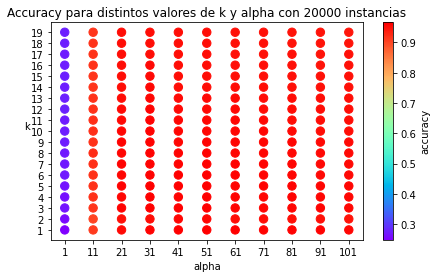

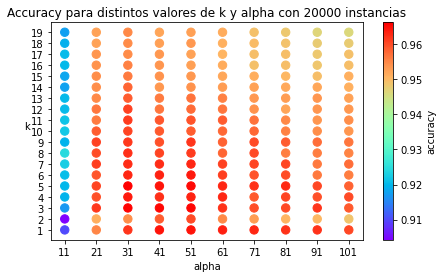

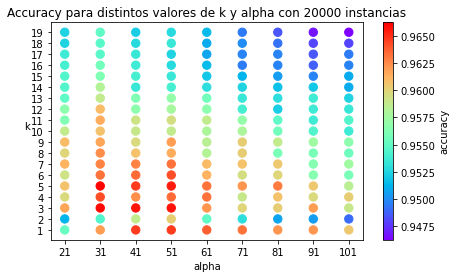

In [19]:
filename = "../dataExp/KNN_PCA_moreInstances.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")
df = df[df["alpha"] > 1]  
plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")
df = df[df["alpha"] > 11]  
plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")



In [20]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete_20000.csv"
total_instances = 20000
ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
alphas = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500]

experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)

  1%|          | 1/180 [00:07<21:26,  7.18s/it]

Accuracy: 0.24775
K: 1, Alpha: 1


  1%|          | 2/180 [00:07<10:03,  3.39s/it]

Accuracy: 0.258
K: 2, Alpha: 1


  2%|▏         | 3/180 [00:08<06:40,  2.27s/it]

Accuracy: 0.26575
K: 3, Alpha: 1


  2%|▏         | 4/180 [00:09<05:18,  1.81s/it]

Accuracy: 0.26525
K: 4, Alpha: 1


  3%|▎         | 5/180 [00:11<04:45,  1.63s/it]

Accuracy: 0.268
K: 5, Alpha: 1


  3%|▎         | 6/180 [00:13<05:25,  1.87s/it]

Accuracy: 0.27575
K: 10, Alpha: 1


  4%|▍         | 7/180 [00:17<07:44,  2.69s/it]

Accuracy: 0.27625
K: 20, Alpha: 1


  4%|▍         | 8/180 [00:24<11:01,  3.84s/it]

Accuracy: 0.284
K: 30, Alpha: 1


  5%|▌         | 9/180 [00:32<14:56,  5.24s/it]

Accuracy: 0.28325
K: 40, Alpha: 1


  6%|▌         | 10/180 [00:42<19:19,  6.82s/it]

Accuracy: 0.28175
K: 50, Alpha: 1


  6%|▌         | 11/180 [01:03<30:55, 10.98s/it]

Accuracy: 0.28425
K: 100, Alpha: 1


  7%|▋         | 12/180 [01:44<56:05, 20.03s/it]

Accuracy: 0.29325
K: 200, Alpha: 1


  7%|▋         | 13/180 [01:51<45:14, 16.25s/it]

Accuracy: 0.36425
K: 1, Alpha: 2


  8%|▊         | 14/180 [01:52<31:59, 11.56s/it]

Accuracy: 0.37825
K: 2, Alpha: 2


  8%|▊         | 15/180 [01:53<22:59,  8.36s/it]

Accuracy: 0.3915
K: 3, Alpha: 2


  9%|▉         | 16/180 [01:54<16:54,  6.19s/it]

Accuracy: 0.4065
K: 4, Alpha: 2


  9%|▉         | 17/180 [01:55<12:49,  4.72s/it]

Accuracy: 0.41575
K: 5, Alpha: 2


 10%|█         | 18/180 [01:58<10:48,  4.00s/it]

Accuracy: 0.43
K: 10, Alpha: 2


 11%|█         | 19/180 [02:02<10:59,  4.10s/it]

Accuracy: 0.44025
K: 20, Alpha: 2


 11%|█         | 20/180 [02:08<12:42,  4.77s/it]

Accuracy: 0.44525
K: 30, Alpha: 2


 12%|█▏        | 21/180 [02:17<15:28,  5.84s/it]

Accuracy: 0.4465
K: 40, Alpha: 2


 12%|█▏        | 22/180 [02:27<18:57,  7.20s/it]

Accuracy: 0.44775
K: 50, Alpha: 2


 13%|█▎        | 23/180 [02:47<29:04, 11.11s/it]

Accuracy: 0.46175
K: 100, Alpha: 2


 13%|█▎        | 24/180 [03:27<51:34, 19.83s/it]

Accuracy: 0.45625
K: 200, Alpha: 2


 14%|█▍        | 25/180 [03:34<41:07, 15.92s/it]

Accuracy: 0.43175
K: 1, Alpha: 3


 14%|█▍        | 26/180 [03:35<29:09, 11.36s/it]

Accuracy: 0.447
K: 2, Alpha: 3


 15%|█▌        | 27/180 [03:36<20:58,  8.22s/it]

Accuracy: 0.4575
K: 3, Alpha: 3


 16%|█▌        | 28/180 [03:37<15:26,  6.09s/it]

Accuracy: 0.47075
K: 4, Alpha: 3


 16%|█▌        | 29/180 [03:38<11:43,  4.66s/it]

Accuracy: 0.483
K: 5, Alpha: 3


 17%|█▋        | 30/180 [03:41<09:52,  3.95s/it]

Accuracy: 0.50225
K: 10, Alpha: 3


 17%|█▋        | 31/180 [03:45<10:03,  4.05s/it]

Accuracy: 0.50875
K: 20, Alpha: 3


 18%|█▊        | 32/180 [03:51<11:36,  4.71s/it]

Accuracy: 0.51375
K: 30, Alpha: 3


 18%|█▊        | 33/180 [03:59<14:06,  5.76s/it]

Accuracy: 0.51975
K: 40, Alpha: 3


 19%|█▉        | 34/180 [04:09<17:14,  7.08s/it]

Accuracy: 0.519
K: 50, Alpha: 3


 19%|█▉        | 35/180 [04:30<26:37, 11.02s/it]

Accuracy: 0.52675
K: 100, Alpha: 3


 20%|██        | 36/180 [05:10<47:37, 19.84s/it]

Accuracy: 0.52225
K: 200, Alpha: 3


 21%|██        | 37/180 [05:17<37:56, 15.92s/it]

Accuracy: 0.55475
K: 1, Alpha: 4


 21%|██        | 38/180 [05:18<26:53, 11.36s/it]

Accuracy: 0.5575
K: 2, Alpha: 4


 22%|██▏       | 39/180 [05:18<19:20,  8.23s/it]

Accuracy: 0.588
K: 3, Alpha: 4


 22%|██▏       | 40/180 [05:20<14:14,  6.10s/it]

Accuracy: 0.5995
K: 4, Alpha: 4


 23%|██▎       | 41/180 [05:21<10:49,  4.67s/it]

Accuracy: 0.604
K: 5, Alpha: 4


 23%|██▎       | 42/180 [05:23<09:07,  3.96s/it]

Accuracy: 0.6245
K: 10, Alpha: 4


 24%|██▍       | 43/180 [05:28<09:16,  4.06s/it]

Accuracy: 0.639
K: 20, Alpha: 4


 24%|██▍       | 44/180 [05:34<10:41,  4.72s/it]

Accuracy: 0.649
K: 30, Alpha: 4


 25%|██▌       | 45/180 [05:42<13:04,  5.81s/it]

Accuracy: 0.6505
K: 40, Alpha: 4


 26%|██▌       | 46/180 [05:53<16:02,  7.18s/it]

Accuracy: 0.64825
K: 50, Alpha: 4


 26%|██▌       | 47/180 [06:13<24:32, 11.07s/it]

Accuracy: 0.6395
K: 100, Alpha: 4


 27%|██▋       | 48/180 [06:53<43:23, 19.72s/it]

Accuracy: 0.6345
K: 200, Alpha: 4


 27%|██▋       | 49/180 [07:00<34:50, 15.96s/it]

Accuracy: 0.67375
K: 1, Alpha: 5


 28%|██▊       | 50/180 [07:01<24:40, 11.39s/it]

Accuracy: 0.67675
K: 2, Alpha: 5


 28%|██▊       | 51/180 [07:01<17:43,  8.24s/it]

Accuracy: 0.71075
K: 3, Alpha: 5


 29%|██▉       | 52/180 [07:03<13:01,  6.11s/it]

Accuracy: 0.7185
K: 4, Alpha: 5


 29%|██▉       | 53/180 [07:04<09:53,  4.67s/it]

Accuracy: 0.72725
K: 5, Alpha: 5


 30%|███       | 54/180 [07:06<08:19,  3.96s/it]

Accuracy: 0.7395
K: 10, Alpha: 5


 31%|███       | 55/180 [07:10<08:27,  4.06s/it]

Accuracy: 0.743
K: 20, Alpha: 5


 31%|███       | 56/180 [07:17<09:46,  4.73s/it]

Accuracy: 0.746
K: 30, Alpha: 5


 32%|███▏      | 57/180 [07:25<11:54,  5.81s/it]

Accuracy: 0.74675
K: 40, Alpha: 5


 32%|███▏      | 58/180 [07:35<14:31,  7.14s/it]

Accuracy: 0.74575
K: 50, Alpha: 5


 33%|███▎      | 59/180 [07:56<22:17, 11.05s/it]

Accuracy: 0.74025
K: 100, Alpha: 5


 33%|███▎      | 60/180 [08:36<39:28, 19.74s/it]

Accuracy: 0.7265
K: 200, Alpha: 5


 34%|███▍      | 61/180 [08:43<31:45, 16.01s/it]

Accuracy: 0.902
K: 1, Alpha: 10


 34%|███▍      | 62/180 [08:44<22:36, 11.49s/it]

Accuracy: 0.89375
K: 2, Alpha: 10


 35%|███▌      | 63/180 [08:45<16:21,  8.39s/it]

Accuracy: 0.9135
K: 3, Alpha: 10


 36%|███▌      | 64/180 [08:46<12:08,  6.28s/it]

Accuracy: 0.912
K: 4, Alpha: 10


 36%|███▌      | 65/180 [08:48<09:19,  4.86s/it]

Accuracy: 0.91925
K: 5, Alpha: 10


 37%|███▋      | 66/180 [08:50<07:54,  4.16s/it]

Accuracy: 0.91625
K: 10, Alpha: 10


 37%|███▋      | 67/180 [08:55<08:03,  4.27s/it]

Accuracy: 0.90975
K: 20, Alpha: 10


 38%|███▊      | 68/180 [09:01<09:14,  4.95s/it]

Accuracy: 0.90725
K: 30, Alpha: 10


 38%|███▊      | 69/180 [09:10<11:07,  6.01s/it]

Accuracy: 0.90275
K: 40, Alpha: 10


 39%|███▉      | 70/180 [09:20<13:28,  7.35s/it]

Accuracy: 0.89925
K: 50, Alpha: 10


 39%|███▉      | 71/180 [09:41<20:27, 11.26s/it]

Accuracy: 0.8865
K: 100, Alpha: 10


 40%|████      | 72/180 [10:21<35:51, 19.93s/it]

Accuracy: 0.86325
K: 200, Alpha: 10


 41%|████      | 73/180 [10:29<29:21, 16.47s/it]

Accuracy: 0.95425
K: 1, Alpha: 20


 41%|████      | 74/180 [10:31<21:07, 11.96s/it]

Accuracy: 0.95025
K: 2, Alpha: 20


 42%|████▏     | 75/180 [10:32<15:30,  8.86s/it]

Accuracy: 0.96025
K: 3, Alpha: 20


 42%|████▏     | 76/180 [10:34<11:42,  6.75s/it]

Accuracy: 0.9595
K: 4, Alpha: 20


 43%|████▎     | 77/180 [10:36<09:09,  5.33s/it]

Accuracy: 0.9595
K: 5, Alpha: 20


 43%|████▎     | 78/180 [10:39<07:53,  4.64s/it]

Accuracy: 0.95575
K: 10, Alpha: 20


 44%|████▍     | 79/180 [10:44<08:00,  4.76s/it]

Accuracy: 0.95
K: 20, Alpha: 20


 44%|████▍     | 80/180 [10:51<09:02,  5.43s/it]

Accuracy: 0.946
K: 30, Alpha: 20


 45%|████▌     | 81/180 [11:01<10:53,  6.60s/it]

Accuracy: 0.9425
K: 40, Alpha: 20


 46%|████▌     | 82/180 [11:12<12:56,  7.92s/it]

Accuracy: 0.94025
K: 50, Alpha: 20


 46%|████▌     | 83/180 [11:33<19:07, 11.83s/it]

Accuracy: 0.92525
K: 100, Alpha: 20


 47%|████▋     | 84/180 [12:13<32:47, 20.49s/it]

Accuracy: 0.90575
K: 200, Alpha: 20


 47%|████▋     | 85/180 [12:23<27:13, 17.19s/it]

Accuracy: 0.9625
K: 1, Alpha: 30


 48%|████▊     | 86/180 [12:25<19:52, 12.69s/it]

Accuracy: 0.95575
K: 2, Alpha: 30


 48%|████▊     | 87/180 [12:27<14:53,  9.60s/it]

Accuracy: 0.965
K: 3, Alpha: 30


 49%|████▉     | 88/180 [12:30<11:30,  7.50s/it]

Accuracy: 0.96325
K: 4, Alpha: 30


 49%|████▉     | 89/180 [12:33<09:14,  6.10s/it]

Accuracy: 0.96525
K: 5, Alpha: 30


 50%|█████     | 90/180 [12:37<08:06,  5.41s/it]

Accuracy: 0.961
K: 10, Alpha: 30


 51%|█████     | 91/180 [12:42<08:12,  5.53s/it]

Accuracy: 0.95475
K: 20, Alpha: 30


 51%|█████     | 92/180 [12:50<09:06,  6.21s/it]

Accuracy: 0.9495
K: 30, Alpha: 30


 52%|█████▏    | 93/180 [13:00<10:34,  7.29s/it]

Accuracy: 0.94625
K: 40, Alpha: 30


 52%|█████▏    | 94/180 [13:12<12:23,  8.65s/it]

Accuracy: 0.9415
K: 50, Alpha: 30


 53%|█████▎    | 95/180 [13:33<17:46, 12.55s/it]

Accuracy: 0.92775
K: 100, Alpha: 30


 53%|█████▎    | 96/180 [14:15<29:38, 21.17s/it]

Accuracy: 0.90425
K: 200, Alpha: 30


 54%|█████▍    | 97/180 [14:25<24:56, 18.03s/it]

Accuracy: 0.96375
K: 1, Alpha: 40


 54%|█████▍    | 98/180 [14:28<18:22, 13.44s/it]

Accuracy: 0.958
K: 2, Alpha: 40


 55%|█████▌    | 99/180 [14:31<13:53, 10.29s/it]

Accuracy: 0.966
K: 3, Alpha: 40


 56%|█████▌    | 100/180 [14:34<10:51,  8.14s/it]

Accuracy: 0.96275
K: 4, Alpha: 40


 56%|█████▌    | 101/180 [14:38<08:49,  6.70s/it]

Accuracy: 0.96475
K: 5, Alpha: 40


 57%|█████▋    | 102/180 [14:42<07:47,  5.99s/it]

Accuracy: 0.9595
K: 10, Alpha: 40


 57%|█████▋    | 103/180 [14:48<07:48,  6.08s/it]

Accuracy: 0.953
K: 20, Alpha: 40


 58%|█████▊    | 104/180 [14:57<08:32,  6.74s/it]

Accuracy: 0.9485
K: 30, Alpha: 40


 58%|█████▊    | 105/180 [15:07<09:44,  7.80s/it]

Accuracy: 0.94325
K: 40, Alpha: 40


 59%|█████▉    | 106/180 [15:19<11:15,  9.13s/it]

Accuracy: 0.93975
K: 50, Alpha: 40


 59%|█████▉    | 107/180 [15:41<15:51, 13.03s/it]

Accuracy: 0.92475
K: 100, Alpha: 40


 60%|██████    | 108/180 [16:23<25:57, 21.63s/it]

Accuracy: 0.901
K: 200, Alpha: 40


 61%|██████    | 109/180 [16:35<22:07, 18.69s/it]

Accuracy: 0.96475
K: 1, Alpha: 50


 61%|██████    | 110/180 [16:38<16:25, 14.08s/it]

Accuracy: 0.959
K: 2, Alpha: 50


 62%|██████▏   | 111/180 [16:42<12:33, 10.91s/it]

Accuracy: 0.96575
K: 3, Alpha: 50


 62%|██████▏   | 112/180 [16:45<09:55,  8.76s/it]

Accuracy: 0.964
K: 4, Alpha: 50


 63%|██████▎   | 113/180 [16:49<08:10,  7.32s/it]

Accuracy: 0.96575
K: 5, Alpha: 50


 63%|██████▎   | 114/180 [16:54<07:15,  6.61s/it]

Accuracy: 0.96025
K: 10, Alpha: 50


 64%|██████▍   | 115/180 [17:01<07:15,  6.70s/it]

Accuracy: 0.9515
K: 20, Alpha: 50


 64%|██████▍   | 116/180 [17:10<07:50,  7.35s/it]

Accuracy: 0.948
K: 30, Alpha: 50


 65%|██████▌   | 117/180 [17:21<08:50,  8.42s/it]

Accuracy: 0.94275
K: 40, Alpha: 50


 66%|██████▌   | 118/180 [17:34<10:09,  9.83s/it]

Accuracy: 0.94025
K: 50, Alpha: 50


 66%|██████▌   | 119/180 [17:57<13:55, 13.69s/it]

Accuracy: 0.9195
K: 100, Alpha: 50


 67%|██████▋   | 120/180 [18:39<22:18, 22.30s/it]

Accuracy: 0.9005
K: 200, Alpha: 50


 67%|██████▋   | 121/180 [19:00<21:37, 21.99s/it]

Accuracy: 0.961
K: 1, Alpha: 100


 68%|██████▊   | 122/180 [19:07<16:49, 17.41s/it]

Accuracy: 0.949
K: 2, Alpha: 100


 68%|██████▊   | 123/180 [19:14<13:32, 14.25s/it]

Accuracy: 0.95875
K: 3, Alpha: 100


 69%|██████▉   | 124/180 [19:21<11:17, 12.09s/it]

Accuracy: 0.9595
K: 4, Alpha: 100


 69%|██████▉   | 125/180 [19:28<09:45, 10.65s/it]

Accuracy: 0.958
K: 5, Alpha: 100


 70%|███████   | 126/180 [19:37<08:56,  9.93s/it]

Accuracy: 0.95375
K: 10, Alpha: 100


 71%|███████   | 127/180 [19:47<08:51, 10.03s/it]

Accuracy: 0.946
K: 20, Alpha: 100


 71%|███████   | 128/180 [19:59<09:15, 10.69s/it]

Accuracy: 0.941
K: 30, Alpha: 100


 72%|███████▏  | 129/180 [20:13<09:57, 11.71s/it]

Accuracy: 0.9365
K: 40, Alpha: 100


 72%|███████▏  | 130/180 [20:29<10:54, 13.10s/it]

Accuracy: 0.9305
K: 50, Alpha: 100


 73%|███████▎  | 131/180 [20:56<13:52, 16.99s/it]

Accuracy: 0.912
K: 100, Alpha: 100


 73%|███████▎  | 132/180 [21:41<20:30, 25.63s/it]

Accuracy: 0.88925
K: 200, Alpha: 100


 74%|███████▍  | 133/180 [25:41<1:10:26, 89.93s/it]

Accuracy: 0.95625
K: 1, Alpha: 200


 74%|███████▍  | 134/180 [25:56<51:38, 67.36s/it]  

Accuracy: 0.945
K: 2, Alpha: 200


 75%|███████▌  | 135/180 [26:11<38:42, 51.62s/it]

Accuracy: 0.9555
K: 3, Alpha: 200


 76%|███████▌  | 136/180 [26:26<29:49, 40.67s/it]

Accuracy: 0.9575
K: 4, Alpha: 200


 76%|███████▌  | 137/180 [26:41<23:41, 33.06s/it]

Accuracy: 0.95475
K: 5, Alpha: 200


 77%|███████▋  | 138/180 [26:58<19:37, 28.03s/it]

Accuracy: 0.9505
K: 10, Alpha: 200


 77%|███████▋  | 139/180 [27:16<17:09, 25.11s/it]

Accuracy: 0.94325
K: 20, Alpha: 200


 78%|███████▊  | 140/180 [27:37<15:50, 23.77s/it]

Accuracy: 0.936
K: 30, Alpha: 200


 78%|███████▊  | 141/180 [27:59<15:08, 23.30s/it]

Accuracy: 0.9325
K: 40, Alpha: 200


 79%|███████▉  | 142/180 [28:23<14:56, 23.60s/it]

Accuracy: 0.92375
K: 50, Alpha: 200


 79%|███████▉  | 143/180 [28:57<16:26, 26.67s/it]

Accuracy: 0.9075
K: 100, Alpha: 200


 80%|████████  | 144/180 [29:50<20:50, 34.74s/it]

Accuracy: 0.88275
K: 200, Alpha: 200


 81%|████████  | 145/180 [33:40<54:17, 93.06s/it]

Accuracy: 0.9565
K: 1, Alpha: 300


 81%|████████  | 146/180 [33:59<40:15, 71.04s/it]

Accuracy: 0.944
K: 2, Alpha: 300


 82%|████████▏ | 147/180 [34:19<30:37, 55.68s/it]

Accuracy: 0.95475
K: 3, Alpha: 300


 82%|████████▏ | 148/180 [34:39<23:59, 44.99s/it]

Accuracy: 0.9535
K: 4, Alpha: 300


 83%|████████▎ | 149/180 [34:59<19:24, 37.57s/it]

Accuracy: 0.9535
K: 5, Alpha: 300


 83%|████████▎ | 150/180 [35:21<16:19, 32.65s/it]

Accuracy: 0.94875
K: 10, Alpha: 300


 84%|████████▍ | 151/180 [35:44<14:24, 29.82s/it]

Accuracy: 0.94225
K: 20, Alpha: 300


 84%|████████▍ | 152/180 [36:09<13:15, 28.40s/it]

Accuracy: 0.9355
K: 30, Alpha: 300


 85%|████████▌ | 153/180 [36:36<12:37, 28.04s/it]

Accuracy: 0.9295
K: 40, Alpha: 300


 86%|████████▌ | 154/180 [37:06<12:23, 28.61s/it]

Accuracy: 0.922
K: 50, Alpha: 300


 86%|████████▌ | 155/180 [37:47<13:27, 32.32s/it]

Accuracy: 0.905
K: 100, Alpha: 300


 87%|████████▋ | 156/180 [38:47<16:13, 40.56s/it]

Accuracy: 0.88
K: 200, Alpha: 300


 87%|████████▋ | 157/180 [49:13<1:22:54, 216.28s/it]

Accuracy: 0.95575
K: 1, Alpha: 400


 88%|████████▊ | 158/180 [49:41<58:35, 159.79s/it]  

Accuracy: 0.9435
K: 2, Alpha: 400


 88%|████████▊ | 159/180 [50:10<42:08, 120.40s/it]

Accuracy: 0.95375
K: 3, Alpha: 400


 89%|████████▉ | 160/180 [50:38<30:54, 92.75s/it] 

Accuracy: 0.95225
K: 4, Alpha: 400


 89%|████████▉ | 161/180 [51:06<23:16, 73.48s/it]

Accuracy: 0.951
K: 5, Alpha: 400


 90%|█████████ | 162/180 [51:36<18:05, 60.28s/it]

Accuracy: 0.94725
K: 10, Alpha: 400


 91%|█████████ | 163/180 [52:07<14:38, 51.69s/it]

Accuracy: 0.9405
K: 20, Alpha: 400


 91%|█████████ | 164/180 [52:41<12:19, 46.20s/it]

Accuracy: 0.93475
K: 30, Alpha: 400


 92%|█████████▏| 165/180 [53:16<10:42, 42.84s/it]

Accuracy: 0.9275
K: 40, Alpha: 400


 92%|█████████▏| 166/180 [53:53<09:35, 41.13s/it]

Accuracy: 0.92225
K: 50, Alpha: 400


 93%|█████████▎| 167/180 [54:40<09:17, 42.91s/it]

Accuracy: 0.9035
K: 100, Alpha: 400


 93%|█████████▎| 168/180 [55:48<10:05, 50.46s/it]

Accuracy: 0.8795
K: 200, Alpha: 400


 94%|█████████▍| 169/180 [1:08:33<48:34, 264.94s/it]

Accuracy: 0.95475
K: 1, Alpha: 500


 94%|█████████▍| 170/180 [1:09:08<32:37, 195.77s/it]

Accuracy: 0.9435
K: 2, Alpha: 500


 95%|█████████▌| 171/180 [1:09:42<22:06, 147.39s/it]

Accuracy: 0.9535
K: 3, Alpha: 500


 96%|█████████▌| 172/180 [1:10:18<15:10, 113.75s/it]

Accuracy: 0.95275
K: 4, Alpha: 500


 96%|█████████▌| 173/180 [1:10:51<10:26, 89.51s/it] 

Accuracy: 0.9505
K: 5, Alpha: 500


 97%|█████████▋| 174/180 [1:11:24<07:16, 72.67s/it]

Accuracy: 0.94625
K: 10, Alpha: 500


 97%|█████████▋| 175/180 [1:11:59<05:07, 61.47s/it]

Accuracy: 0.941
K: 20, Alpha: 500


 98%|█████████▊| 176/180 [1:12:38<03:39, 54.79s/it]

Accuracy: 0.93425
K: 30, Alpha: 500


 98%|█████████▊| 177/180 [1:13:20<02:32, 50.72s/it]

Accuracy: 0.92775
K: 40, Alpha: 500


 99%|█████████▉| 178/180 [1:14:01<01:35, 47.79s/it]

Accuracy: 0.921
K: 50, Alpha: 500


 99%|█████████▉| 179/180 [1:14:51<00:48, 48.55s/it]

Accuracy: 0.902
K: 100, Alpha: 500


100%|██████████| 180/180 [1:16:00<00:00, 25.34s/it]

Accuracy: 0.8785
K: 200, Alpha: 500


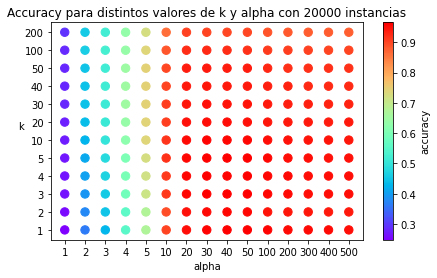

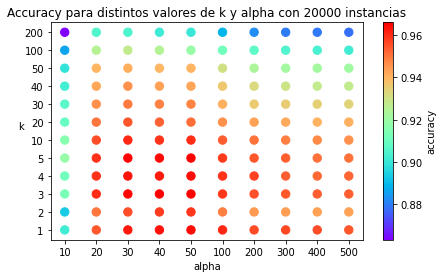

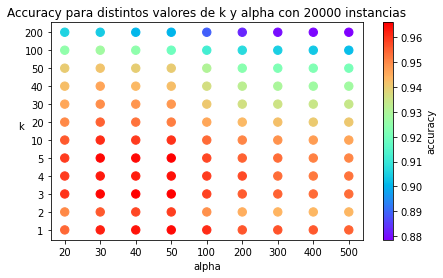

In [23]:
filename = "../dataExp/KNN_PCA_complete_20000.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")
df = df[df["alpha"] > 5]  
plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")
df = df[df["alpha"] > 11]  
plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")

# Tiempos "../dataExp/KNN_PCA_complete_20000.csv"

        k  alpha       time      acc
60    1.0   10.0   7.311747  0.90200
65   10.0   10.0   9.092878  0.91625
66   20.0   10.0  11.093257  0.90975
67   30.0   10.0  13.084686  0.90725
68   40.0   10.0  15.046681  0.90275
69   50.0   10.0  17.040809  0.89925
70  100.0   10.0  26.947055  0.88650
71  200.0   10.0  46.694554  0.86325


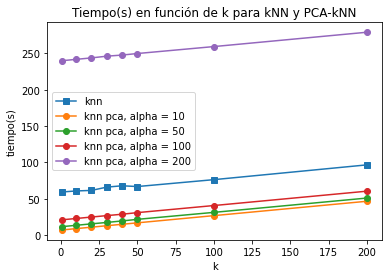

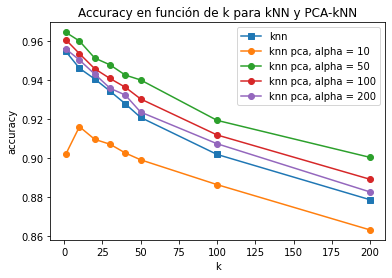

In [61]:
name = "../dataExp/expKNN_1-200.csv"
columns = ["k", "time", "acc"]
df_knn = pd.read_csv(name, names=columns)
df_knn = df_knn[df_knn["k"] != 60]
df_knn = df_knn[df_knn["k"] != 70]
df_knn = df_knn[df_knn["k"] != 80]
df_knn = df_knn[df_knn["k"] != 90]
df_knn = df_knn[df_knn["k"] != 110]
df_knn = df_knn[df_knn["k"] != 120]
df_knn = df_knn[df_knn["k"] != 130]
df_knn = df_knn[df_knn["k"] != 140]
df_knn = df_knn[df_knn["k"] != 150]
df_knn = df_knn[df_knn["k"] != 160]
df_knn = df_knn[df_knn["k"] != 170]
df_knn = df_knn[df_knn["k"] != 180]
df_knn = df_knn[df_knn["k"] != 190]

filename = "../dataExp/KNN_PCA_complete_20000.csv"
title = "Tiempo(s) en función de k para kNN y PCA-kNN"

columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df = df[df["k"] <= 200]
df = df[df["k"] != 2]
df = df[df["k"] != 3]
df = df[df["k"] != 4]
df = df[df["k"] != 5]

df1 = df[df["alpha"] == 10]
df2 = df[df["alpha"] == 50]
df3 = df[df["alpha"] == 100]
df4 = df[df["alpha"] == 200]
print(df1)
ks = df_knn["k"]
t_knn = df_knn["time"]
t_a1 = df1["time"]
t_a50 = df2["time"]
t_a100 = df3["time"]
t_a200 = df4["time"]

plt.plot(ks, t_knn, '-s', label="knn")
plt.plot(ks, t_a1, 'o-', label="knn pca, alpha = 10")
plt.plot(ks, t_a50, 'o-', label="knn pca, alpha = 50")
plt.plot(ks, t_a100, 'o-', label="knn pca, alpha = 100")
plt.plot(ks, t_a200, 'o-', label="knn pca, alpha = 200")
plt.xlabel("k")
plt.ylabel("tiempo(s)")
plt.title(title)

plt.legend()
plt.show()

a_knn = df_knn["acc"]
a_a1 = df1["acc"]
a_a50 = df2["acc"]
a_a100 = df3["acc"]
a_a200 = df4["acc"]

plt.plot(ks, a_knn, '-s', label="knn")
plt.plot(ks, a_a1, 'o-', label="knn pca, alpha = 10")
plt.plot(ks, a_a50, 'o-', label="knn pca, alpha = 50")
plt.plot(ks, a_a100, 'o-', label="knn pca, alpha = 100")
plt.plot(ks, a_a200, 'o-', label="knn pca, alpha = 200")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("Accuracy en función de k para kNN y PCA-kNN")

plt.legend()
plt.show()

# Latex
En el primer grafico vemos que para alpha menor que 5 la accuracy obtenido no es bueno,
tiene cierto sentido considerando que de 7__ pixeles estamos considerando 5 o menos. Por otro lado el resto de los valores estan entre 0,8 y 1, por lo que recortamos los valores mas bajos de alpha para ver mas clara la difrencia de valores en la figura 2. En el segundo grafico podemos ver que los valores mas altos estan con 20<alpha<100 y 1<k<20. Notamos un drop en accuracy a partir de alpha 200 que se acentua a medida que tomamos mas componentes, por lo que considerando esto y que al aumentar el alpha aumenta el tiempo de ejecucion no tiene sentido tomar valores mas altos de alpha(GRAFICAR). (Chequear valores de autovalores para ver si se hacen cada vez mas chicos).
Mencionar k2 es particularmente malo en comparacion a su entorno, esto se debe a como implementamos KNN que siempre si tenes 2 elementos, van a tener el mismo peso, (elige siguiendo un criterio arbitrario(MAX_ELEM))

In [25]:
filename = "../dataExp/KNN_PCA_extense_20000.csv"
total_instances = 20000
ks = range(1,11)
alphas = range(20,101,5)

experimentacion_k_alpha(filename, ks, alphas, total_instances)

  1%|          | 1/170 [00:07<21:36,  7.67s/it]

Accuracy: 0.95425
K: 1, Alpha: 20


  1%|          | 2/170 [00:09<11:07,  3.97s/it]

Accuracy: 0.95025
K: 2, Alpha: 20


  2%|▏         | 3/170 [00:10<07:59,  2.87s/it]

Accuracy: 0.96025
K: 3, Alpha: 20


  2%|▏         | 4/170 [00:12<06:44,  2.43s/it]

Accuracy: 0.9595
K: 4, Alpha: 20


  3%|▎         | 5/170 [00:14<06:12,  2.26s/it]

Accuracy: 0.9595
K: 5, Alpha: 20


  4%|▎         | 6/170 [00:16<06:03,  2.22s/it]

Accuracy: 0.95775
K: 6, Alpha: 20


  4%|▍         | 7/170 [00:18<06:08,  2.26s/it]

Accuracy: 0.9595
K: 7, Alpha: 20


  5%|▍         | 8/170 [00:21<06:23,  2.37s/it]

Accuracy: 0.956
K: 8, Alpha: 20


  5%|▌         | 9/170 [00:24<06:47,  2.53s/it]

Accuracy: 0.957
K: 9, Alpha: 20


  6%|▌         | 10/170 [00:27<07:07,  2.67s/it]

Accuracy: 0.95575
K: 10, Alpha: 20


  6%|▋         | 11/170 [00:35<11:13,  4.23s/it]

Accuracy: 0.95875
K: 1, Alpha: 25


  7%|▋         | 12/170 [00:36<08:58,  3.41s/it]

Accuracy: 0.95325
K: 2, Alpha: 25


  8%|▊         | 13/170 [00:38<07:34,  2.89s/it]

Accuracy: 0.9625
K: 3, Alpha: 25


  8%|▊         | 14/170 [00:40<06:44,  2.59s/it]

Accuracy: 0.96175
K: 4, Alpha: 25


  9%|▉         | 15/170 [00:42<06:18,  2.44s/it]

Accuracy: 0.96575
K: 5, Alpha: 25


  9%|▉         | 16/170 [00:44<06:08,  2.39s/it]

Accuracy: 0.96525
K: 6, Alpha: 25


 10%|█         | 17/170 [00:47<06:08,  2.41s/it]

Accuracy: 0.96175
K: 7, Alpha: 25


 11%|█         | 18/170 [00:49<06:17,  2.48s/it]

Accuracy: 0.96075
K: 8, Alpha: 25


 11%|█         | 19/170 [00:52<06:30,  2.59s/it]

Accuracy: 0.95975
K: 9, Alpha: 25


 12%|█▏        | 20/170 [00:55<06:47,  2.72s/it]

Accuracy: 0.95925
K: 10, Alpha: 25


 12%|█▏        | 21/170 [01:04<11:04,  4.46s/it]

Accuracy: 0.9625
K: 1, Alpha: 30


 13%|█▎        | 22/170 [01:06<09:10,  3.72s/it]

Accuracy: 0.95575
K: 2, Alpha: 30


 14%|█▎        | 23/170 [01:08<08:01,  3.28s/it]

Accuracy: 0.965
K: 3, Alpha: 30


 14%|█▍        | 24/170 [01:10<07:20,  3.02s/it]

Accuracy: 0.96325
K: 4, Alpha: 30


 15%|█▍        | 25/170 [01:13<06:58,  2.89s/it]

Accuracy: 0.96525
K: 5, Alpha: 30


 15%|█▌        | 26/170 [01:16<06:50,  2.85s/it]

Accuracy: 0.96275
K: 6, Alpha: 30


 16%|█▌        | 27/170 [01:18<06:52,  2.88s/it]

Accuracy: 0.96475
K: 7, Alpha: 30


 16%|█▋        | 28/170 [01:22<07:00,  2.96s/it]

Accuracy: 0.964
K: 8, Alpha: 30


 17%|█▋        | 29/170 [01:25<07:13,  3.07s/it]

Accuracy: 0.9635
K: 9, Alpha: 30


 18%|█▊        | 30/170 [01:28<07:29,  3.21s/it]

Accuracy: 0.961
K: 10, Alpha: 30


 18%|█▊        | 31/170 [01:38<11:30,  4.96s/it]

Accuracy: 0.96275
K: 1, Alpha: 35


 19%|█▉        | 32/170 [01:40<09:30,  4.13s/it]

Accuracy: 0.95775
K: 2, Alpha: 35


 19%|█▉        | 33/170 [01:42<08:12,  3.60s/it]

Accuracy: 0.96325
K: 3, Alpha: 35


 20%|██        | 34/170 [01:45<07:26,  3.29s/it]

Accuracy: 0.96425
K: 4, Alpha: 35


 21%|██        | 35/170 [01:47<07:01,  3.12s/it]

Accuracy: 0.96475
K: 5, Alpha: 35


 21%|██        | 36/170 [01:50<06:50,  3.06s/it]

Accuracy: 0.9635
K: 6, Alpha: 35


 22%|██▏       | 37/170 [01:53<06:49,  3.08s/it]

Accuracy: 0.9615
K: 7, Alpha: 35


 22%|██▏       | 38/170 [01:57<06:54,  3.14s/it]

Accuracy: 0.9595
K: 8, Alpha: 35


 23%|██▎       | 39/170 [02:00<07:05,  3.25s/it]

Accuracy: 0.9605
K: 9, Alpha: 35


 24%|██▎       | 40/170 [02:04<07:18,  3.38s/it]

Accuracy: 0.95925
K: 10, Alpha: 35


 24%|██▍       | 41/170 [02:14<11:22,  5.29s/it]

Accuracy: 0.96375
K: 1, Alpha: 40


 25%|██▍       | 42/170 [02:16<09:31,  4.46s/it]

Accuracy: 0.958
K: 2, Alpha: 40


 25%|██▌       | 43/170 [02:19<08:20,  3.94s/it]

Accuracy: 0.966
K: 3, Alpha: 40


 26%|██▌       | 44/170 [02:22<07:37,  3.63s/it]

Accuracy: 0.96275
K: 4, Alpha: 40


 26%|██▋       | 45/170 [02:25<07:14,  3.47s/it]

Accuracy: 0.96475
K: 5, Alpha: 40


 27%|██▋       | 46/170 [02:28<07:04,  3.42s/it]

Accuracy: 0.9635
K: 6, Alpha: 40


 28%|██▊       | 47/170 [02:32<07:02,  3.44s/it]

Accuracy: 0.963
K: 7, Alpha: 40


 28%|██▊       | 48/170 [02:35<07:07,  3.51s/it]

Accuracy: 0.96025
K: 8, Alpha: 40


 29%|██▉       | 49/170 [02:39<07:17,  3.61s/it]

Accuracy: 0.9595
K: 9, Alpha: 40


 29%|██▉       | 50/170 [02:43<07:29,  3.74s/it]

Accuracy: 0.9595
K: 10, Alpha: 40


 30%|███       | 51/170 [02:53<11:13,  5.66s/it]

Accuracy: 0.9645
K: 1, Alpha: 45


 31%|███       | 52/170 [02:56<09:24,  4.79s/it]

Accuracy: 0.957
K: 2, Alpha: 45


 31%|███       | 53/170 [02:59<08:12,  4.21s/it]

Accuracy: 0.96525
K: 3, Alpha: 45


 32%|███▏      | 54/170 [03:02<07:28,  3.87s/it]

Accuracy: 0.9615
K: 4, Alpha: 45


 32%|███▏      | 55/170 [03:05<07:04,  3.69s/it]

Accuracy: 0.9645
K: 5, Alpha: 45


 33%|███▎      | 56/170 [03:09<06:52,  3.62s/it]

Accuracy: 0.96175
K: 6, Alpha: 45


 34%|███▎      | 57/170 [03:12<06:49,  3.62s/it]

Accuracy: 0.96225
K: 7, Alpha: 45


 34%|███▍      | 58/170 [03:16<06:52,  3.68s/it]

Accuracy: 0.96125
K: 8, Alpha: 45


 35%|███▍      | 59/170 [03:20<06:59,  3.78s/it]

Accuracy: 0.95975
K: 9, Alpha: 45


 35%|███▌      | 60/170 [03:24<07:09,  3.91s/it]

Accuracy: 0.96
K: 10, Alpha: 45


 36%|███▌      | 61/170 [03:35<10:51,  5.98s/it]

Accuracy: 0.96475
K: 1, Alpha: 50


 36%|███▋      | 62/170 [03:38<09:13,  5.12s/it]

Accuracy: 0.959
K: 2, Alpha: 50


 37%|███▋      | 63/170 [03:42<08:10,  4.58s/it]

Accuracy: 0.96575
K: 3, Alpha: 50


 38%|███▊      | 64/170 [03:45<07:29,  4.24s/it]

Accuracy: 0.964
K: 4, Alpha: 50


 38%|███▊      | 65/170 [03:49<07:05,  4.05s/it]

Accuracy: 0.96575
K: 5, Alpha: 50


 39%|███▉      | 66/170 [03:53<06:54,  3.98s/it]

Accuracy: 0.9645
K: 6, Alpha: 50


 39%|███▉      | 67/170 [03:57<06:51,  3.99s/it]

Accuracy: 0.964
K: 7, Alpha: 50


 40%|████      | 68/170 [04:01<06:53,  4.05s/it]

Accuracy: 0.96175
K: 8, Alpha: 50


 41%|████      | 69/170 [04:05<06:59,  4.15s/it]

Accuracy: 0.963
K: 9, Alpha: 50


 41%|████      | 70/170 [04:10<07:07,  4.28s/it]

Accuracy: 0.96025
K: 10, Alpha: 50


 42%|████▏     | 71/170 [04:21<10:31,  6.38s/it]

Accuracy: 0.96425
K: 1, Alpha: 55


 42%|████▏     | 72/170 [04:24<08:52,  5.43s/it]

Accuracy: 0.95775
K: 2, Alpha: 55


 43%|████▎     | 73/170 [04:28<07:48,  4.83s/it]

Accuracy: 0.964
K: 3, Alpha: 55


 44%|████▎     | 74/170 [04:31<07:07,  4.46s/it]

Accuracy: 0.96275
K: 4, Alpha: 55


 44%|████▍     | 75/170 [04:35<06:44,  4.26s/it]

Accuracy: 0.96475
K: 5, Alpha: 55


 45%|████▍     | 76/170 [04:39<06:32,  4.17s/it]

Accuracy: 0.96225
K: 6, Alpha: 55


 45%|████▌     | 77/170 [04:43<06:27,  4.17s/it]

Accuracy: 0.96175
K: 7, Alpha: 55


 46%|████▌     | 78/170 [04:48<06:28,  4.22s/it]

Accuracy: 0.96125
K: 8, Alpha: 55


 46%|████▋     | 79/170 [04:52<06:32,  4.31s/it]

Accuracy: 0.96175
K: 9, Alpha: 55


 47%|████▋     | 80/170 [04:57<06:39,  4.44s/it]

Accuracy: 0.9595
K: 10, Alpha: 55


 48%|████▊     | 81/170 [05:09<09:57,  6.71s/it]

Accuracy: 0.964
K: 1, Alpha: 60


 48%|████▊     | 82/170 [05:13<08:32,  5.83s/it]

Accuracy: 0.95575
K: 2, Alpha: 60


 49%|████▉     | 83/170 [05:17<07:42,  5.32s/it]

Accuracy: 0.9625
K: 3, Alpha: 60


 49%|████▉     | 84/170 [05:21<07:15,  5.06s/it]

Accuracy: 0.963
K: 4, Alpha: 60


 50%|█████     | 85/170 [05:26<06:53,  4.86s/it]

Accuracy: 0.96375
K: 5, Alpha: 60


 51%|█████     | 86/170 [05:30<06:37,  4.74s/it]

Accuracy: 0.96175
K: 6, Alpha: 60


 51%|█████     | 87/170 [05:35<06:28,  4.68s/it]

Accuracy: 0.96225
K: 7, Alpha: 60


 52%|█████▏    | 88/170 [05:39<06:26,  4.71s/it]

Accuracy: 0.96075
K: 8, Alpha: 60


 52%|█████▏    | 89/170 [05:44<06:28,  4.79s/it]

Accuracy: 0.96
K: 9, Alpha: 60


 53%|█████▎    | 90/170 [05:49<06:31,  4.89s/it]

Accuracy: 0.95825
K: 10, Alpha: 60


 54%|█████▎    | 91/170 [06:02<09:24,  7.15s/it]

Accuracy: 0.963
K: 1, Alpha: 65


 54%|█████▍    | 92/170 [06:06<07:57,  6.12s/it]

Accuracy: 0.95375
K: 2, Alpha: 65


 55%|█████▍    | 93/170 [06:09<07:00,  5.46s/it]

Accuracy: 0.96175
K: 3, Alpha: 65


 55%|█████▌    | 94/170 [06:14<06:23,  5.05s/it]

Accuracy: 0.9615
K: 4, Alpha: 65


 56%|█████▌    | 95/170 [06:18<06:01,  4.82s/it]

Accuracy: 0.96325
K: 5, Alpha: 65


 56%|█████▋    | 96/170 [06:22<05:48,  4.71s/it]

Accuracy: 0.96125
K: 6, Alpha: 65


 57%|█████▋    | 97/170 [06:27<05:43,  4.70s/it]

Accuracy: 0.962
K: 7, Alpha: 65


 58%|█████▊    | 98/170 [06:32<05:41,  4.75s/it]

Accuracy: 0.96025
K: 8, Alpha: 65


 58%|█████▊    | 99/170 [06:37<05:43,  4.84s/it]

Accuracy: 0.959
K: 9, Alpha: 65


 59%|█████▉    | 100/170 [06:42<05:47,  4.96s/it]

Accuracy: 0.9575
K: 10, Alpha: 65


 59%|█████▉    | 101/170 [06:56<08:39,  7.53s/it]

Accuracy: 0.96375
K: 1, Alpha: 70


 60%|██████    | 102/170 [07:00<07:23,  6.53s/it]

Accuracy: 0.9525
K: 2, Alpha: 70


 61%|██████    | 103/170 [07:04<06:34,  5.88s/it]

Accuracy: 0.96075
K: 3, Alpha: 70


 61%|██████    | 104/170 [07:09<06:02,  5.50s/it]

Accuracy: 0.95825
K: 4, Alpha: 70


 62%|██████▏   | 105/170 [07:14<05:43,  5.28s/it]

Accuracy: 0.9635
K: 5, Alpha: 70


 62%|██████▏   | 106/170 [07:19<05:31,  5.18s/it]

Accuracy: 0.96
K: 6, Alpha: 70


 63%|██████▎   | 107/170 [07:24<05:25,  5.17s/it]

Accuracy: 0.96175
K: 7, Alpha: 70


 64%|██████▎   | 108/170 [07:29<05:23,  5.22s/it]

Accuracy: 0.95975
K: 8, Alpha: 70


 64%|██████▍   | 109/170 [07:35<05:23,  5.31s/it]

Accuracy: 0.96
K: 9, Alpha: 70


 65%|██████▍   | 110/170 [07:40<05:26,  5.44s/it]

Accuracy: 0.95725
K: 10, Alpha: 70


 65%|██████▌   | 111/170 [07:54<07:54,  8.04s/it]

Accuracy: 0.963
K: 1, Alpha: 75


 66%|██████▌   | 112/170 [07:59<06:41,  6.92s/it]

Accuracy: 0.952
K: 2, Alpha: 75


 66%|██████▋   | 113/170 [08:03<05:53,  6.20s/it]

Accuracy: 0.9595
K: 3, Alpha: 75


 67%|██████▋   | 114/170 [08:08<05:21,  5.75s/it]

Accuracy: 0.96075
K: 4, Alpha: 75


 68%|██████▊   | 115/170 [08:13<05:02,  5.50s/it]

Accuracy: 0.96225
K: 5, Alpha: 75


 68%|██████▊   | 116/170 [08:18<04:49,  5.37s/it]

Accuracy: 0.95975
K: 6, Alpha: 75


 69%|██████▉   | 117/170 [08:23<04:42,  5.34s/it]

Accuracy: 0.96075
K: 7, Alpha: 75


 69%|██████▉   | 118/170 [08:29<04:39,  5.37s/it]

Accuracy: 0.95825
K: 8, Alpha: 75


 70%|███████   | 119/170 [08:34<04:37,  5.45s/it]

Accuracy: 0.95875
K: 9, Alpha: 75


 71%|███████   | 120/170 [08:40<04:38,  5.56s/it]

Accuracy: 0.9555
K: 10, Alpha: 75


 71%|███████   | 121/170 [08:55<06:51,  8.39s/it]

Accuracy: 0.96275
K: 1, Alpha: 80


 72%|███████▏  | 122/170 [09:00<05:51,  7.32s/it]

Accuracy: 0.951
K: 2, Alpha: 80


 72%|███████▏  | 123/170 [09:05<05:11,  6.62s/it]

Accuracy: 0.9605
K: 3, Alpha: 80


 73%|███████▎  | 124/170 [09:10<04:44,  6.20s/it]

Accuracy: 0.9605
K: 4, Alpha: 80


 74%|███████▎  | 125/170 [09:15<04:27,  5.95s/it]

Accuracy: 0.962
K: 5, Alpha: 80


 74%|███████▍  | 126/170 [09:21<04:16,  5.83s/it]

Accuracy: 0.96075
K: 6, Alpha: 80


 75%|███████▍  | 127/170 [09:27<04:09,  5.81s/it]

Accuracy: 0.96
K: 7, Alpha: 80


 75%|███████▌  | 128/170 [09:33<04:05,  5.85s/it]

Accuracy: 0.95625
K: 8, Alpha: 80


 76%|███████▌  | 129/170 [09:39<04:03,  5.94s/it]

Accuracy: 0.959
K: 9, Alpha: 80


 76%|███████▋  | 130/170 [09:45<04:02,  6.07s/it]

Accuracy: 0.95575
K: 10, Alpha: 80


 77%|███████▋  | 131/170 [10:01<05:48,  8.94s/it]

Accuracy: 0.96225
K: 1, Alpha: 85


 78%|███████▊  | 132/170 [10:06<04:53,  7.73s/it]

Accuracy: 0.951
K: 2, Alpha: 85


 78%|███████▊  | 133/170 [10:11<04:16,  6.94s/it]

Accuracy: 0.96025
K: 3, Alpha: 85


 79%|███████▉  | 134/170 [10:16<03:52,  6.45s/it]

Accuracy: 0.96075
K: 4, Alpha: 85


 79%|███████▉  | 135/170 [10:22<03:35,  6.16s/it]

Accuracy: 0.96225
K: 5, Alpha: 85


 80%|████████  | 136/170 [10:27<03:24,  6.02s/it]

Accuracy: 0.9575
K: 6, Alpha: 85


 81%|████████  | 137/170 [10:33<03:18,  6.00s/it]

Accuracy: 0.95775
K: 7, Alpha: 85


 81%|████████  | 138/170 [10:39<03:13,  6.03s/it]

Accuracy: 0.95525
K: 8, Alpha: 85


 82%|████████▏ | 139/170 [10:46<03:08,  6.09s/it]

Accuracy: 0.95725
K: 9, Alpha: 85


 82%|████████▏ | 140/170 [10:52<03:05,  6.20s/it]

Accuracy: 0.95575
K: 10, Alpha: 85


 83%|████████▎ | 141/170 [11:09<04:32,  9.39s/it]

Accuracy: 0.9615
K: 1, Alpha: 90


 84%|████████▎ | 142/170 [11:14<03:50,  8.23s/it]

Accuracy: 0.9505
K: 2, Alpha: 90


 84%|████████▍ | 143/170 [11:20<03:22,  7.48s/it]

Accuracy: 0.962
K: 3, Alpha: 90


 85%|████████▍ | 144/170 [11:26<03:02,  7.01s/it]

Accuracy: 0.96125
K: 4, Alpha: 90


 85%|████████▌ | 145/170 [11:32<02:48,  6.74s/it]

Accuracy: 0.96075
K: 5, Alpha: 90


 86%|████████▌ | 146/170 [11:39<02:38,  6.61s/it]

Accuracy: 0.9565
K: 6, Alpha: 90


 86%|████████▋ | 147/170 [11:45<02:31,  6.58s/it]

Accuracy: 0.9575
K: 7, Alpha: 90


 87%|████████▋ | 148/170 [11:52<02:25,  6.61s/it]

Accuracy: 0.95575
K: 8, Alpha: 90


 88%|████████▊ | 149/170 [11:59<02:20,  6.68s/it]

Accuracy: 0.95725
K: 9, Alpha: 90


 88%|████████▊ | 150/170 [12:06<02:15,  6.79s/it]

Accuracy: 0.95475
K: 10, Alpha: 90


 89%|████████▉ | 151/170 [12:23<03:09,  9.98s/it]

Accuracy: 0.96175
K: 1, Alpha: 95


 89%|████████▉ | 152/170 [12:29<02:36,  8.67s/it]

Accuracy: 0.95
K: 2, Alpha: 95


 90%|█████████ | 153/170 [12:34<02:12,  7.82s/it]

Accuracy: 0.95975
K: 3, Alpha: 95


 91%|█████████ | 154/170 [12:41<01:56,  7.27s/it]

Accuracy: 0.9595
K: 4, Alpha: 95


 91%|█████████ | 155/170 [12:47<01:44,  6.95s/it]

Accuracy: 0.961
K: 5, Alpha: 95


 92%|█████████▏| 156/170 [12:53<01:34,  6.78s/it]

Accuracy: 0.955
K: 6, Alpha: 95


 92%|█████████▏| 157/170 [13:00<01:27,  6.71s/it]

Accuracy: 0.957
K: 7, Alpha: 95


 93%|█████████▎| 158/170 [13:06<01:20,  6.72s/it]

Accuracy: 0.95525
K: 8, Alpha: 95


 94%|█████████▎| 159/170 [13:13<01:14,  6.79s/it]

Accuracy: 0.957
K: 9, Alpha: 95


 94%|█████████▍| 160/170 [13:20<01:08,  6.90s/it]

Accuracy: 0.954
K: 10, Alpha: 95


 95%|█████████▍| 161/170 [13:39<01:33, 10.42s/it]

Accuracy: 0.961
K: 1, Alpha: 100


 95%|█████████▌| 162/170 [13:45<01:13,  9.15s/it]

Accuracy: 0.949
K: 2, Alpha: 100


 96%|█████████▌| 163/170 [13:52<00:58,  8.34s/it]

Accuracy: 0.95875
K: 3, Alpha: 100


 96%|█████████▋| 164/170 [13:58<00:46,  7.80s/it]

Accuracy: 0.9595
K: 4, Alpha: 100


 97%|█████████▋| 165/170 [14:05<00:37,  7.48s/it]

Accuracy: 0.958
K: 5, Alpha: 100


 98%|█████████▊| 166/170 [14:12<00:29,  7.31s/it]

Accuracy: 0.95625
K: 6, Alpha: 100


 98%|█████████▊| 167/170 [14:19<00:21,  7.25s/it]

Accuracy: 0.95725
K: 7, Alpha: 100


 99%|█████████▉| 168/170 [14:26<00:14,  7.26s/it]

Accuracy: 0.95625
K: 8, Alpha: 100


 99%|█████████▉| 169/170 [14:34<00:07,  7.33s/it]

Accuracy: 0.956
K: 9, Alpha: 100


100%|██████████| 170/170 [14:42<00:00,  5.19s/it]

Accuracy: 0.95375
K: 10, Alpha: 100


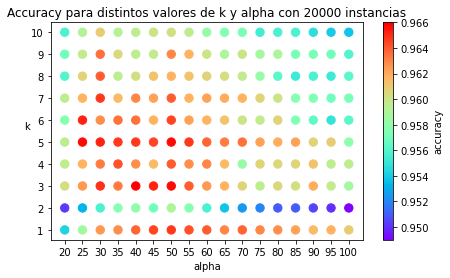

In [26]:
filename = "../dataExp/KNN_PCA_extense_20000.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")
#df = df[df["alpha"] > 1]  
#plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")
#df = df[df["alpha"] > 11]  
#plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")

In [27]:
filename = "../dataExp/KNN_PCA_extense_20000.csv"
total_instances = 20000
ks = [1,3,4,5]
alphas = range(25,60,1)

experimentacion_k_alpha(filename, ks, alphas, total_instances)

  1%|          | 1/140 [00:08<20:19,  8.77s/it]

Accuracy: 0.95875
K: 1, Alpha: 25


  1%|▏         | 2/140 [00:10<10:51,  4.72s/it]

Accuracy: 0.9625
K: 3, Alpha: 25


  2%|▏         | 3/140 [00:12<08:02,  3.52s/it]

Accuracy: 0.96175
K: 4, Alpha: 25


  3%|▎         | 4/140 [00:15<06:54,  3.05s/it]

Accuracy: 0.96575
K: 5, Alpha: 25


  4%|▎         | 5/140 [00:23<11:34,  5.15s/it]

Accuracy: 0.95975
K: 1, Alpha: 26


  4%|▍         | 6/140 [00:25<09:05,  4.07s/it]

Accuracy: 0.96225
K: 3, Alpha: 26


  5%|▌         | 7/140 [00:28<07:38,  3.45s/it]

Accuracy: 0.9635
K: 4, Alpha: 26


  6%|▌         | 8/140 [00:30<06:50,  3.11s/it]

Accuracy: 0.9665
K: 5, Alpha: 26


  6%|▋         | 9/140 [00:38<10:27,  4.79s/it]

Accuracy: 0.961
K: 1, Alpha: 27


  7%|▋         | 10/140 [00:40<08:28,  3.91s/it]

Accuracy: 0.96525
K: 3, Alpha: 27


  8%|▊         | 11/140 [00:43<07:15,  3.38s/it]

Accuracy: 0.96475
K: 4, Alpha: 27


  9%|▊         | 12/140 [00:45<06:34,  3.09s/it]

Accuracy: 0.96525
K: 5, Alpha: 27


  9%|▉         | 13/140 [00:54<10:09,  4.80s/it]

Accuracy: 0.96225
K: 1, Alpha: 28


 10%|█         | 14/140 [00:56<08:21,  3.98s/it]

Accuracy: 0.966
K: 3, Alpha: 28


 11%|█         | 15/140 [00:58<07:13,  3.47s/it]

Accuracy: 0.96375
K: 4, Alpha: 28


 11%|█▏        | 16/140 [01:01<06:33,  3.17s/it]

Accuracy: 0.967
K: 5, Alpha: 28


 12%|█▏        | 17/140 [01:09<09:56,  4.85s/it]

Accuracy: 0.96225
K: 1, Alpha: 29


 13%|█▎        | 18/140 [01:11<08:09,  4.01s/it]

Accuracy: 0.9655
K: 3, Alpha: 29


 14%|█▎        | 19/140 [01:14<07:02,  3.49s/it]

Accuracy: 0.962
K: 4, Alpha: 29


 14%|█▍        | 20/140 [01:16<06:22,  3.18s/it]

Accuracy: 0.9665
K: 5, Alpha: 29


 15%|█▌        | 21/140 [01:26<09:59,  5.04s/it]

Accuracy: 0.9625
K: 1, Alpha: 30


 16%|█▌        | 22/140 [01:28<08:21,  4.25s/it]

Accuracy: 0.965
K: 3, Alpha: 30


 16%|█▋        | 23/140 [01:31<07:19,  3.76s/it]

Accuracy: 0.96325
K: 4, Alpha: 30


 17%|█▋        | 24/140 [01:33<06:43,  3.48s/it]

Accuracy: 0.96525
K: 5, Alpha: 30


 18%|█▊        | 25/140 [01:43<10:01,  5.23s/it]

Accuracy: 0.962
K: 1, Alpha: 31


 19%|█▊        | 26/140 [01:45<08:14,  4.34s/it]

Accuracy: 0.966
K: 3, Alpha: 31


 19%|█▉        | 27/140 [01:47<07:06,  3.77s/it]

Accuracy: 0.96425
K: 4, Alpha: 31


 20%|██        | 28/140 [01:50<06:24,  3.43s/it]

Accuracy: 0.96625
K: 5, Alpha: 31


 21%|██        | 29/140 [01:59<09:35,  5.19s/it]

Accuracy: 0.9635
K: 1, Alpha: 32


 21%|██▏       | 30/140 [02:02<07:59,  4.35s/it]

Accuracy: 0.9655
K: 3, Alpha: 32


 22%|██▏       | 31/140 [02:04<06:57,  3.83s/it]

Accuracy: 0.96475
K: 4, Alpha: 32


 23%|██▎       | 32/140 [02:07<06:29,  3.60s/it]

Accuracy: 0.96525
K: 5, Alpha: 32


 24%|██▎       | 33/140 [02:17<09:23,  5.26s/it]

Accuracy: 0.96225
K: 1, Alpha: 33


 24%|██▍       | 34/140 [02:19<07:40,  4.34s/it]

Accuracy: 0.9655
K: 3, Alpha: 33


 25%|██▌       | 35/140 [02:21<06:34,  3.76s/it]

Accuracy: 0.9625
K: 4, Alpha: 33


 26%|██▌       | 36/140 [02:24<05:53,  3.40s/it]

Accuracy: 0.96425
K: 5, Alpha: 33


 26%|██▋       | 37/140 [02:33<08:41,  5.06s/it]

Accuracy: 0.9635
K: 1, Alpha: 34


 27%|██▋       | 38/140 [02:35<07:14,  4.26s/it]

Accuracy: 0.964
K: 3, Alpha: 34


 28%|██▊       | 39/140 [02:38<06:18,  3.75s/it]

Accuracy: 0.964
K: 4, Alpha: 34


 29%|██▊       | 40/140 [02:40<05:45,  3.45s/it]

Accuracy: 0.96425
K: 5, Alpha: 34


 29%|██▉       | 41/140 [02:49<08:28,  5.14s/it]

Accuracy: 0.96275
K: 1, Alpha: 35


 30%|███       | 42/140 [02:52<07:01,  4.30s/it]

Accuracy: 0.96325
K: 3, Alpha: 35


 31%|███       | 43/140 [02:54<06:06,  3.78s/it]

Accuracy: 0.96425
K: 4, Alpha: 35


 31%|███▏      | 44/140 [02:57<05:32,  3.47s/it]

Accuracy: 0.96475
K: 5, Alpha: 35


 32%|███▏      | 45/140 [03:06<08:09,  5.15s/it]

Accuracy: 0.9635
K: 1, Alpha: 36


 33%|███▎      | 46/140 [03:09<06:49,  4.36s/it]

Accuracy: 0.96475
K: 3, Alpha: 36


 34%|███▎      | 47/140 [03:11<05:58,  3.85s/it]

Accuracy: 0.96325
K: 4, Alpha: 36


 34%|███▍      | 48/140 [03:14<05:27,  3.56s/it]

Accuracy: 0.96375
K: 5, Alpha: 36


 35%|███▌      | 49/140 [03:23<07:55,  5.22s/it]

Accuracy: 0.964
K: 1, Alpha: 37


 36%|███▌      | 50/140 [03:26<06:35,  4.40s/it]

Accuracy: 0.96525
K: 3, Alpha: 37


 36%|███▋      | 51/140 [03:28<05:45,  3.88s/it]

Accuracy: 0.9635
K: 4, Alpha: 37


 37%|███▋      | 52/140 [03:31<05:14,  3.57s/it]

Accuracy: 0.9645
K: 5, Alpha: 37


 38%|███▊      | 53/140 [03:41<07:46,  5.36s/it]

Accuracy: 0.96425
K: 1, Alpha: 38


 39%|███▊      | 54/140 [03:43<06:30,  4.54s/it]

Accuracy: 0.96625
K: 3, Alpha: 38


 39%|███▉      | 55/140 [03:46<05:41,  4.02s/it]

Accuracy: 0.9645
K: 4, Alpha: 38


 40%|████      | 56/140 [03:49<05:12,  3.71s/it]

Accuracy: 0.96375
K: 5, Alpha: 38


 41%|████      | 57/140 [03:59<07:36,  5.50s/it]

Accuracy: 0.964
K: 1, Alpha: 39


 41%|████▏     | 58/140 [04:01<06:18,  4.62s/it]

Accuracy: 0.967
K: 3, Alpha: 39


 42%|████▏     | 59/140 [04:04<05:29,  4.07s/it]

Accuracy: 0.96375
K: 4, Alpha: 39


 43%|████▎     | 60/140 [04:07<04:58,  3.73s/it]

Accuracy: 0.9645
K: 5, Alpha: 39


 44%|████▎     | 61/140 [04:17<07:18,  5.56s/it]

Accuracy: 0.96375
K: 1, Alpha: 40


 44%|████▍     | 62/140 [04:20<06:07,  4.71s/it]

Accuracy: 0.966
K: 3, Alpha: 40


 45%|████▌     | 63/140 [04:23<05:21,  4.17s/it]

Accuracy: 0.96275
K: 4, Alpha: 40


 46%|████▌     | 64/140 [04:26<04:52,  3.85s/it]

Accuracy: 0.96475
K: 5, Alpha: 40


 46%|████▋     | 65/140 [04:36<07:01,  5.62s/it]

Accuracy: 0.96475
K: 1, Alpha: 41


 47%|████▋     | 66/140 [04:38<05:50,  4.74s/it]

Accuracy: 0.96575
K: 3, Alpha: 41


 48%|████▊     | 67/140 [04:41<05:07,  4.22s/it]

Accuracy: 0.9625
K: 4, Alpha: 41


 49%|████▊     | 68/140 [04:44<04:38,  3.87s/it]

Accuracy: 0.96475
K: 5, Alpha: 41


 49%|████▉     | 69/140 [04:54<06:44,  5.70s/it]

Accuracy: 0.9645
K: 1, Alpha: 42


 50%|█████     | 70/140 [04:57<05:38,  4.84s/it]

Accuracy: 0.965
K: 3, Alpha: 42


 51%|█████     | 71/140 [05:00<04:56,  4.29s/it]

Accuracy: 0.964
K: 4, Alpha: 42


 51%|█████▏    | 72/140 [05:03<04:29,  3.97s/it]

Accuracy: 0.96425
K: 5, Alpha: 42


 52%|█████▏    | 73/140 [05:13<06:24,  5.75s/it]

Accuracy: 0.96275
K: 1, Alpha: 43


 53%|█████▎    | 74/140 [05:16<05:20,  4.86s/it]

Accuracy: 0.96475
K: 3, Alpha: 43


 54%|█████▎    | 75/140 [05:19<04:38,  4.29s/it]

Accuracy: 0.96325
K: 4, Alpha: 43


 54%|█████▍    | 76/140 [05:22<04:12,  3.95s/it]

Accuracy: 0.96475
K: 5, Alpha: 43


 55%|█████▌    | 77/140 [05:32<06:07,  5.83s/it]

Accuracy: 0.963
K: 1, Alpha: 44


 56%|█████▌    | 78/140 [05:35<05:08,  4.97s/it]

Accuracy: 0.96475
K: 3, Alpha: 44


 56%|█████▋    | 79/140 [05:38<04:29,  4.42s/it]

Accuracy: 0.96325
K: 4, Alpha: 44


 57%|█████▋    | 80/140 [05:42<04:05,  4.09s/it]

Accuracy: 0.9645
K: 5, Alpha: 44


 58%|█████▊    | 81/140 [05:52<05:47,  5.90s/it]

Accuracy: 0.9645
K: 1, Alpha: 45


 59%|█████▊    | 82/140 [05:55<04:49,  4.99s/it]

Accuracy: 0.96525
K: 3, Alpha: 45


 59%|█████▉    | 83/140 [05:58<04:11,  4.42s/it]

Accuracy: 0.9615
K: 4, Alpha: 45


 60%|██████    | 84/140 [06:01<03:48,  4.07s/it]

Accuracy: 0.9645
K: 5, Alpha: 45


 61%|██████    | 85/140 [06:11<05:28,  5.97s/it]

Accuracy: 0.96475
K: 1, Alpha: 46


 61%|██████▏   | 86/140 [06:15<04:35,  5.09s/it]

Accuracy: 0.9645
K: 3, Alpha: 46


 62%|██████▏   | 87/140 [06:18<04:00,  4.54s/it]

Accuracy: 0.963
K: 4, Alpha: 46


 63%|██████▎   | 88/140 [06:21<03:38,  4.20s/it]

Accuracy: 0.9655
K: 5, Alpha: 46


 64%|██████▎   | 89/140 [06:31<05:07,  6.03s/it]

Accuracy: 0.965
K: 1, Alpha: 47


 64%|██████▍   | 90/140 [06:34<04:15,  5.12s/it]

Accuracy: 0.96275
K: 3, Alpha: 47


 65%|██████▌   | 91/140 [06:38<03:42,  4.54s/it]

Accuracy: 0.964
K: 4, Alpha: 47


 66%|██████▌   | 92/140 [06:41<03:20,  4.19s/it]

Accuracy: 0.9665
K: 5, Alpha: 47


 66%|██████▋   | 93/140 [06:52<04:47,  6.13s/it]

Accuracy: 0.965
K: 1, Alpha: 48


 67%|██████▋   | 94/140 [06:55<04:00,  5.22s/it]

Accuracy: 0.965
K: 3, Alpha: 48


 68%|██████▊   | 95/140 [06:58<03:28,  4.64s/it]

Accuracy: 0.96275
K: 4, Alpha: 48


 69%|██████▊   | 96/140 [07:02<03:08,  4.29s/it]

Accuracy: 0.9665
K: 5, Alpha: 48


 69%|██████▉   | 97/140 [07:12<04:24,  6.14s/it]

Accuracy: 0.96475
K: 1, Alpha: 49


 70%|███████   | 98/140 [07:15<03:39,  5.22s/it]

Accuracy: 0.96575
K: 3, Alpha: 49


 71%|███████   | 99/140 [07:18<03:10,  4.66s/it]

Accuracy: 0.964
K: 4, Alpha: 49


 71%|███████▏  | 100/140 [07:22<02:52,  4.32s/it]

Accuracy: 0.966
K: 5, Alpha: 49


 72%|███████▏  | 101/140 [07:33<04:07,  6.34s/it]

Accuracy: 0.96475
K: 1, Alpha: 50


 73%|███████▎  | 102/140 [07:36<03:25,  5.42s/it]

Accuracy: 0.96575
K: 3, Alpha: 50


 74%|███████▎  | 103/140 [07:40<02:58,  4.83s/it]

Accuracy: 0.964
K: 4, Alpha: 50


 74%|███████▍  | 104/140 [07:43<02:41,  4.48s/it]

Accuracy: 0.96575
K: 5, Alpha: 50


 75%|███████▌  | 105/140 [07:54<03:43,  6.40s/it]

Accuracy: 0.96475
K: 1, Alpha: 51


 76%|███████▌  | 106/140 [07:57<03:05,  5.44s/it]

Accuracy: 0.96575
K: 3, Alpha: 51


 76%|███████▋  | 107/140 [08:01<02:39,  4.83s/it]

Accuracy: 0.9635
K: 4, Alpha: 51


 77%|███████▋  | 108/140 [08:04<02:22,  4.46s/it]

Accuracy: 0.9655
K: 5, Alpha: 51


 78%|███████▊  | 109/140 [08:16<03:19,  6.45s/it]

Accuracy: 0.965
K: 1, Alpha: 52


 79%|███████▊  | 110/140 [08:19<02:45,  5.52s/it]

Accuracy: 0.96425
K: 3, Alpha: 52


 79%|███████▉  | 111/140 [08:22<02:23,  4.93s/it]

Accuracy: 0.96275
K: 4, Alpha: 52


 80%|████████  | 112/140 [08:26<02:08,  4.58s/it]

Accuracy: 0.9665
K: 5, Alpha: 52


 81%|████████  | 113/140 [08:37<02:57,  6.58s/it]

Accuracy: 0.965
K: 1, Alpha: 53


 81%|████████▏ | 114/140 [08:41<02:25,  5.60s/it]

Accuracy: 0.96425
K: 3, Alpha: 53


 82%|████████▏ | 115/140 [08:44<02:04,  4.97s/it]

Accuracy: 0.96225
K: 4, Alpha: 53


 83%|████████▎ | 116/140 [08:48<01:50,  4.58s/it]

Accuracy: 0.9665
K: 5, Alpha: 53


 84%|████████▎ | 117/140 [08:59<02:32,  6.65s/it]

Accuracy: 0.96475
K: 1, Alpha: 54


 84%|████████▍ | 118/140 [09:03<02:05,  5.70s/it]

Accuracy: 0.96325
K: 3, Alpha: 54


 85%|████████▌ | 119/140 [09:07<01:46,  5.09s/it]

Accuracy: 0.962
K: 4, Alpha: 54


 86%|████████▌ | 120/140 [09:10<01:34,  4.73s/it]

Accuracy: 0.966
K: 5, Alpha: 54


 86%|████████▋ | 121/140 [09:22<02:08,  6.77s/it]

Accuracy: 0.96425
K: 1, Alpha: 55


 87%|████████▋ | 122/140 [09:25<01:43,  5.76s/it]

Accuracy: 0.964
K: 3, Alpha: 55


 88%|████████▊ | 123/140 [09:29<01:27,  5.12s/it]

Accuracy: 0.96275
K: 4, Alpha: 55


 89%|████████▊ | 124/140 [09:33<01:15,  4.73s/it]

Accuracy: 0.96475
K: 5, Alpha: 55


 89%|████████▉ | 125/140 [09:45<01:42,  6.82s/it]

Accuracy: 0.96375
K: 1, Alpha: 56


 90%|█████████ | 126/140 [09:48<01:22,  5.87s/it]

Accuracy: 0.964
K: 3, Alpha: 56


 91%|█████████ | 127/140 [09:52<01:08,  5.25s/it]

Accuracy: 0.96275
K: 4, Alpha: 56


 91%|█████████▏| 128/140 [09:56<00:58,  4.89s/it]

Accuracy: 0.96475
K: 5, Alpha: 56


 92%|█████████▏| 129/140 [10:08<01:15,  6.88s/it]

Accuracy: 0.964
K: 1, Alpha: 57


 93%|█████████▎| 130/140 [10:11<00:58,  5.87s/it]

Accuracy: 0.9625
K: 3, Alpha: 57


 94%|█████████▎| 131/140 [10:15<00:46,  5.22s/it]

Accuracy: 0.96325
K: 4, Alpha: 57


 94%|█████████▍| 132/140 [10:19<00:38,  4.83s/it]

Accuracy: 0.96475
K: 5, Alpha: 57


 95%|█████████▌| 133/140 [10:31<00:48,  6.95s/it]

Accuracy: 0.96425
K: 1, Alpha: 58


 96%|█████████▌| 134/140 [10:34<00:35,  5.98s/it]

Accuracy: 0.9635
K: 3, Alpha: 58


 96%|█████████▋| 135/140 [10:38<00:26,  5.35s/it]

Accuracy: 0.96375
K: 4, Alpha: 58


 97%|█████████▋| 136/140 [10:42<00:19,  4.98s/it]

Accuracy: 0.96475
K: 5, Alpha: 58


 98%|█████████▊| 137/140 [10:55<00:21,  7.17s/it]

Accuracy: 0.9645
K: 1, Alpha: 59


 99%|█████████▊| 138/140 [10:58<00:12,  6.11s/it]

Accuracy: 0.962
K: 3, Alpha: 59


 99%|█████████▉| 139/140 [11:02<00:05,  5.43s/it]

Accuracy: 0.9625
K: 4, Alpha: 59


100%|██████████| 140/140 [11:06<00:00,  4.76s/it]

Accuracy: 0.96325
K: 5, Alpha: 59


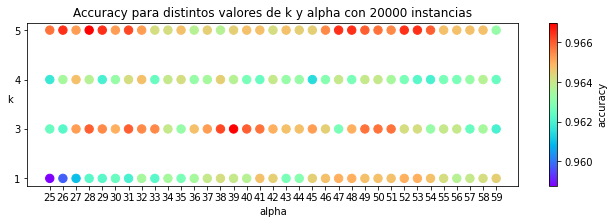

In [34]:
filename = "../dataExp/KNN_PCA_extense_20000.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias", (11,3))
#df = df[df["alpha"] > 1]  
#plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")
#df = df[df["alpha"] > 11]  
#plot_scatter_df(df, "Accuracy para distintos valores de k y alpha con 20000 instancias")

# Latex 2
Vemos que los valores mas optimos son para k entre 1 y 7 exceptuando el 2, y alpha entre 30 y 55. Para acotar
el espacio de busqueda de los parametros vamos a tomar representantes que esten lo sufcientemente separados, para abarcar el rango de valores relevants detectados de alpha. (30, 40, 50 para alpha, 1, 3 y 5 de k tomando 1 ya que consideramos que es un valor interesante, para analizar con distintas intancias de alpha ya que representa solo tomar la muestra mas cercana en tu base de conocimiento.)

En base a los parametros elegidos, vamos a experimentar con la cantidad de instancias para observar como se comportan con bases de conocimiento de distintas magnitudes.


##### Experimentar con el alpha
- Research paper de buenos alphas
- **Experimentar**: Experimentacion similar a la de K pero el inicial talvez mejor hasta 600 o algo del estilo para tener un panorama mas completo ya que no se espepra que al aumentarlo empeore necesariamente


# Autovalores y autovectores para alpha 500

In [4]:
def get_auto(filename, alpha = 500, total_instances = 20000, num_iter = 2500, train_percentage = 0.8, epsilon = 1e-6 ):
    X, y = get_data_set(filename, total_instances)
    
    # take some instances for train and other for validation
    limit = int(train_percentage * X.shape[0]) 

    X_train, label_train = X[:limit], y[:limit]
        
    pca = metnum.PCA(alpha, num_iter, epsilon)
    pca.fit(X_train)
    
get_auto("../data/train.csv")

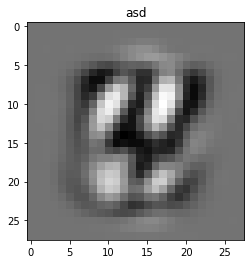

In [50]:
file = open("eigenvectors_save.csv", "r")
autovect = []

line = file.readline()
while line:
    values = [float(i) for i in line.split(',')]
    autovect.append(values)
    line = file.readline()
file.close() 
for i in range(0,2):
    img = np.array(autovect[10])
    img = img.reshape(28, 28)

    plt.imshow(img, cmap="Greys")
    plt.title("asd")


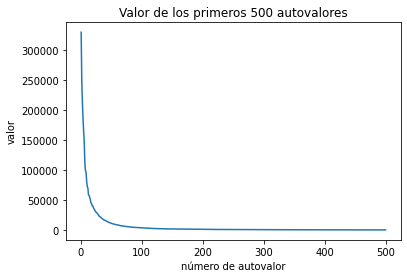

In [15]:
file = open("eigenvalues_save.csv", "r")
autovalores = []

line = file.readline()
while line:
    autovalores.append(float(line))
    line = file.readline()
file.close()

alpha = range(1,501)

plt.plot(alpha, autovalores,)
plt.xlabel("indice de autovalor")
plt.ylabel("valor")
plt.title("Valor de los primeros 500 autovalores")

plt.show()


# Latex 3
# Experimentar con la cantidad de instancias 
- para los k y alpha obtenidos en exp1 vamos a experimentar con el porcentage de las instancias
 ver para un mismo train set si distintos tamaño de test_set obtienen resultados muy disntintos
- Como sabemos que las muestras estan distribuidas de forma uniforme vamos a tomar las ultimas, vamos a tomar las ultimas 2000(~5%) muestras como conjunto de validacion. Y vamos a variar el tamñano de las intancias para entrenar algoritmo para ver si esto afecta la accuracy de los distintos k y alpha. 
- Hipotesis: Suponemos que la accuracy se va a a ver dismminuida si el tamaño del set de entrenamiento es pequeño, ya que va a tener menos muestras de "comparacion".


### Rangos de datos utilizados
empezamos en 100 para al menos tener un par de referencias para cada digito
- Cantidad de instancias de train: 100, 1000, 5000, 10000, 15000, 20000, 30000, 40000

In [4]:
def main_pca_df(alpha, X_train, X_val, num_iter = 2500, epsilon = 1e-6 ):
    pca = metnum.PCA(alpha, num_iter, epsilon)
    pca.fit(X_train)

    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)

    return X_train, X_val

# experimenta con un set de alpha y ks
def experimentacion_instances(namefile, instances, ks, alphas):
    accuracy_k_alpha_complete = []
    times_k_alpha_complete = []
    ks_complete = []
    alphas_complete = []
    instances_complete = []
    cant_it = 2500
    eps = 1e-6
    
    X, y = get_data_set("../data/train.csv", 42000)

    X_val, label_val = X[40000:], y[40000:]
    assert len(X_val) == len(label_val)
    assert len(X_val) == 2000
    
    with tqdm(total=len(ks) * len(alphas) * len(instances)) as pbar:
        for inst in instances:
            # take some instances for train and other for validation

            X_train, label_train = X[:inst], y[:inst]
            for alpha in alphas:
                time_init_pca = time.perf_counter()
                X_train_inst, X_val_inst = main_pca_df(alpha, X_train, X_val)
                time_end_pca = time.perf_counter()
                time_pca = time_end_pca - time_init_pca

                for k in ks:
                    time_init = time.perf_counter()
                    acc = main_knn(k, X_train_inst, X_val_inst, label_train, label_val)
                    time_end = time.perf_counter()
                    print(f"K: {k}, Alpha: {alpha}, Instances: {inst}")

                    times_k_alpha_complete.append(time_end-time_init+time_pca)
                    accuracy_k_alpha_complete.append(acc)
                    ks_complete.append(k)
                    alphas_complete.append(alpha)
                    instances_complete.append(inst)

                    pbar.update(1)

    np.savetxt(namefile, np.array([instances_complete, ks_complete, alphas_complete, times_k_alpha_complete, accuracy_k_alpha_complete]).transpose(), delimiter=",")

def pie_chart(label_vals, title):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = '0', '1', '2', '3', '4', '5', '6', '7', '8' , '9'
    sizes = [(label_vals == 0).sum(), (label_vals == 1).sum(), (label_vals == 2).sum(), (label_vals == 3).sum(),
            (label_vals == 4).sum(), (label_vals == 5).sum(), (label_vals == 6).sum(), (label_vals == 7).sum(),
             (label_vals == 8).sum(), (label_vals == 9).sum()
            ]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()

In [99]:
# Grafica los datos obtenidos para los distintos k y alpha
def plot_scatter_inst(filename, title, size = (7,4)):
    columns = ["instances", "k", "alpha", "time", "acc"]
    df = pd.read_csv(filename, names=columns)
    plot_scatter_df_inst(df, title, size)
    
# Grafica los datos obtenidos para los distintos k y alpha
def plot_scatter_df_inst(df, title, size = (7,4)):
    x = [str(i)[0:-2] for i in df["instances"]]
    y1 = [str(i)[0:-2] for i in df["k"]]
    y2 = [str(i)[0:-2] for i in df["alpha"]]
    y = list(zip(y1,y2))
    y = [f'{i}-{j}' for i,j in y]

    fig = plt.figure()
    colour = df["acc"]
    plt.scatter(x, y, s = 70, c = colour, alpha = 1, cmap="rainbow")
    plt.colorbar(label="accuracy")
    plt.xlabel("#instancias")
    plt.ylabel('k-alpha')
    plt.title(title)
    plt.rcParams["figure.figsize"] = size
    plt.show()

In [94]:
instances = [100, 1000, 5000, 10000, 15000, 20000, 30000, 40000]
ks = [1, 3, 5]
alphas = [30, 40, 50]

experimentacion_instances("../dataExp/Exp_instances.csv", instances, ks, alphas)

  1%|▏         | 1/72 [00:02<02:29,  2.10s/it]

Accuracy: 0.7095
K: 1, Alpha: 30, Instances: 100
Accuracy: 0.6455
K: 3, Alpha: 30, Instances: 100
Accuracy: 0.6205
K: 5, Alpha: 30, Instances: 100


  6%|▌         | 4/72 [00:05<01:26,  1.28s/it]

Accuracy: 0.696
K: 1, Alpha: 40, Instances: 100
Accuracy: 0.6365
K: 3, Alpha: 40, Instances: 100
Accuracy: 0.614
K: 5, Alpha: 40, Instances: 100


 10%|▉         | 7/72 [00:08<01:18,  1.20s/it]

Accuracy: 0.696
K: 1, Alpha: 50, Instances: 100
Accuracy: 0.633
K: 3, Alpha: 50, Instances: 100
Accuracy: 0.603
K: 5, Alpha: 50, Instances: 100


 17%|█▋        | 12/72 [00:10<00:40,  1.48it/s]

Accuracy: 0.893
K: 1, Alpha: 30, Instances: 1000
Accuracy: 0.8995
K: 3, Alpha: 30, Instances: 1000
Accuracy: 0.8975
K: 5, Alpha: 30, Instances: 1000


 21%|██        | 15/72 [00:13<00:39,  1.45it/s]

Accuracy: 0.894
K: 1, Alpha: 40, Instances: 1000
Accuracy: 0.8955
K: 3, Alpha: 40, Instances: 1000
Accuracy: 0.9
K: 5, Alpha: 40, Instances: 1000


 24%|██▎       | 17/72 [00:16<00:50,  1.08it/s]

Accuracy: 0.8875
K: 1, Alpha: 50, Instances: 1000
Accuracy: 0.891
K: 3, Alpha: 50, Instances: 1000


 25%|██▌       | 18/72 [00:16<00:39,  1.35it/s]

Accuracy: 0.892
K: 5, Alpha: 50, Instances: 1000


 26%|██▋       | 19/72 [00:19<01:04,  1.22s/it]

Accuracy: 0.9435
K: 1, Alpha: 30, Instances: 5000


 28%|██▊       | 20/72 [00:19<00:51,  1.01it/s]

Accuracy: 0.946
K: 3, Alpha: 30, Instances: 5000


 29%|██▉       | 21/72 [00:20<00:42,  1.19it/s]

Accuracy: 0.942
K: 5, Alpha: 30, Instances: 5000


 31%|███       | 22/72 [00:23<01:18,  1.57s/it]

Accuracy: 0.944
K: 1, Alpha: 40, Instances: 5000


 32%|███▏      | 23/72 [00:23<01:01,  1.25s/it]

Accuracy: 0.9415
K: 3, Alpha: 40, Instances: 5000


 33%|███▎      | 24/72 [00:24<00:49,  1.03s/it]

Accuracy: 0.942
K: 5, Alpha: 40, Instances: 5000


 35%|███▍      | 25/72 [00:29<01:43,  2.21s/it]

Accuracy: 0.9455
K: 1, Alpha: 50, Instances: 5000


 36%|███▌      | 26/72 [00:29<01:18,  1.72s/it]

Accuracy: 0.942
K: 3, Alpha: 50, Instances: 5000


 38%|███▊      | 27/72 [00:30<01:02,  1.38s/it]

Accuracy: 0.945
K: 5, Alpha: 50, Instances: 5000


 39%|███▉      | 28/72 [00:36<02:04,  2.82s/it]

Accuracy: 0.953
K: 1, Alpha: 30, Instances: 10000


 40%|████      | 29/72 [00:37<01:35,  2.21s/it]

Accuracy: 0.9555
K: 3, Alpha: 30, Instances: 10000


 42%|████▏     | 30/72 [00:38<01:17,  1.83s/it]

Accuracy: 0.9615
K: 5, Alpha: 30, Instances: 10000


 43%|████▎     | 31/72 [00:55<04:21,  6.39s/it]

Accuracy: 0.9565
K: 1, Alpha: 40, Instances: 10000


 44%|████▍     | 32/72 [00:56<03:10,  4.77s/it]

Accuracy: 0.9575
K: 3, Alpha: 40, Instances: 10000


 46%|████▌     | 33/72 [00:57<02:23,  3.67s/it]

Accuracy: 0.9595
K: 5, Alpha: 40, Instances: 10000


 47%|████▋     | 34/72 [01:10<04:03,  6.41s/it]

Accuracy: 0.956
K: 1, Alpha: 50, Instances: 10000


 49%|████▊     | 35/72 [01:11<02:58,  4.82s/it]

Accuracy: 0.959
K: 3, Alpha: 50, Instances: 10000


 50%|█████     | 36/72 [01:12<02:14,  3.74s/it]

Accuracy: 0.958
K: 5, Alpha: 50, Instances: 10000


 51%|█████▏    | 37/72 [01:17<02:17,  3.94s/it]

Accuracy: 0.9555
K: 1, Alpha: 30, Instances: 15000


 53%|█████▎    | 38/72 [01:18<01:45,  3.09s/it]

Accuracy: 0.96
K: 3, Alpha: 30, Instances: 15000


 54%|█████▍    | 39/72 [01:19<01:24,  2.56s/it]

Accuracy: 0.963
K: 5, Alpha: 30, Instances: 15000


 56%|█████▌    | 40/72 [01:25<01:49,  3.42s/it]

Accuracy: 0.9575
K: 1, Alpha: 40, Instances: 15000


 57%|█████▋    | 41/72 [01:26<01:27,  2.81s/it]

Accuracy: 0.962
K: 3, Alpha: 40, Instances: 15000


 58%|█████▊    | 42/72 [01:28<01:13,  2.44s/it]

Accuracy: 0.96
K: 5, Alpha: 40, Instances: 15000


 60%|█████▉    | 43/72 [01:34<01:44,  3.60s/it]

Accuracy: 0.9575
K: 1, Alpha: 50, Instances: 15000


 61%|██████    | 44/72 [01:36<01:24,  3.03s/it]

Accuracy: 0.9585
K: 3, Alpha: 50, Instances: 15000


 62%|██████▎   | 45/72 [01:37<01:12,  2.68s/it]

Accuracy: 0.96
K: 5, Alpha: 50, Instances: 15000


 64%|██████▍   | 46/72 [01:43<01:31,  3.51s/it]

Accuracy: 0.963
K: 1, Alpha: 30, Instances: 20000


 65%|██████▌   | 47/72 [01:44<01:13,  2.92s/it]

Accuracy: 0.9645
K: 3, Alpha: 30, Instances: 20000


 67%|██████▋   | 48/72 [01:46<01:02,  2.59s/it]

Accuracy: 0.964
K: 5, Alpha: 30, Instances: 20000


 68%|██████▊   | 49/72 [01:53<01:27,  3.82s/it]

Accuracy: 0.9645
K: 1, Alpha: 40, Instances: 20000


 69%|██████▉   | 50/72 [01:55<01:11,  3.23s/it]

Accuracy: 0.9635
K: 3, Alpha: 40, Instances: 20000


 71%|███████   | 51/72 [01:57<01:00,  2.90s/it]

Accuracy: 0.962
K: 5, Alpha: 40, Instances: 20000


 72%|███████▏  | 52/72 [02:05<01:28,  4.44s/it]

Accuracy: 0.962
K: 1, Alpha: 50, Instances: 20000


 74%|███████▎  | 53/72 [02:07<01:11,  3.78s/it]

Accuracy: 0.964
K: 3, Alpha: 50, Instances: 20000


 75%|███████▌  | 54/72 [02:10<01:00,  3.38s/it]

Accuracy: 0.964
K: 5, Alpha: 50, Instances: 20000


 76%|███████▋  | 55/72 [02:17<01:18,  4.64s/it]

Accuracy: 0.969
K: 1, Alpha: 30, Instances: 30000


 78%|███████▊  | 56/72 [02:20<01:03,  3.96s/it]

Accuracy: 0.971
K: 3, Alpha: 30, Instances: 30000


 79%|███████▉  | 57/72 [02:22<00:53,  3.60s/it]

Accuracy: 0.972
K: 5, Alpha: 30, Instances: 30000


 81%|████████  | 58/72 [02:31<01:12,  5.14s/it]

Accuracy: 0.9695
K: 1, Alpha: 40, Instances: 30000


 82%|████████▏ | 59/72 [02:34<00:57,  4.43s/it]

Accuracy: 0.9725
K: 3, Alpha: 40, Instances: 30000


 83%|████████▎ | 60/72 [02:37<00:48,  4.04s/it]

Accuracy: 0.9705
K: 5, Alpha: 40, Instances: 30000


 85%|████████▍ | 61/72 [02:47<01:04,  5.83s/it]

Accuracy: 0.9685
K: 1, Alpha: 50, Instances: 30000


 86%|████████▌ | 62/72 [02:50<00:50,  5.07s/it]

Accuracy: 0.9705
K: 3, Alpha: 50, Instances: 30000


 88%|████████▊ | 63/72 [02:54<00:41,  4.66s/it]

Accuracy: 0.9695
K: 5, Alpha: 50, Instances: 30000


 89%|████████▉ | 64/72 [03:04<00:49,  6.20s/it]

Accuracy: 0.9705
K: 1, Alpha: 30, Instances: 40000


 90%|█████████ | 65/72 [03:07<00:36,  5.28s/it]

Accuracy: 0.9725
K: 3, Alpha: 30, Instances: 40000


 92%|█████████▏| 66/72 [03:11<00:28,  4.79s/it]

Accuracy: 0.9765
K: 5, Alpha: 30, Instances: 40000


 93%|█████████▎| 67/72 [03:22<00:33,  6.68s/it]

Accuracy: 0.9705
K: 1, Alpha: 40, Instances: 40000


 94%|█████████▍| 68/72 [03:25<00:23,  5.79s/it]

Accuracy: 0.975
K: 3, Alpha: 40, Instances: 40000


 96%|█████████▌| 69/72 [03:30<00:15,  5.32s/it]

Accuracy: 0.975
K: 5, Alpha: 40, Instances: 40000


 97%|█████████▋| 70/72 [03:42<00:15,  7.51s/it]

Accuracy: 0.9725
K: 1, Alpha: 50, Instances: 40000


 99%|█████████▊| 71/72 [03:47<00:06,  6.60s/it]

Accuracy: 0.9725
K: 3, Alpha: 50, Instances: 40000


100%|██████████| 72/72 [03:52<00:00,  3.22s/it]

Accuracy: 0.9755
K: 5, Alpha: 50, Instances: 40000


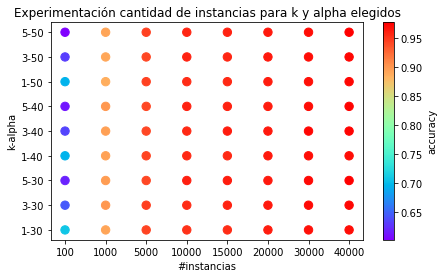

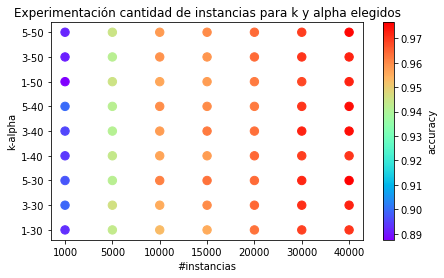

In [104]:
columns = ["instances", "k", "alpha", "time", "acc"]
df = pd.read_csv("../dataExp/Exp_instances.csv", names=columns)
title = "Experimentación cantidad de instancias para k y alpha elegidos"

plot_scatter_df_inst(df, title)
df = df[df["instances"] > 100]
plot_scatter_df_inst(df, title)


In [18]:
columns = ["inst", "k", "alpha", "time", "acc"]
df = pd.read_csv("../dataExp/Exp_instances.csv", names=columns)
title = "Experimentación cantidad de instancias para k y alpha elegidos"
df = df.sort_values("acc", ascending=False)

df100 = df[df["inst"] == 100].iloc[0:3]
df1000 = df[df["inst"] == 1000].iloc[0:3]
df5000 = df[df["inst"] == 5000].iloc[0:3]
df10000 = df[df["inst"] == 10000].iloc[0:3]
df15000 = df[df["inst"] == 15000].iloc[0:3]
df20000 = df[df["inst"] == 20000].iloc[0:3]
df30000 = df[df["inst"] == 30000].iloc[0:3]
df40000 = df[df["inst"] == 40000].iloc[0:3]

dfAll = df100.append(df1000).append(df5000).append(df10000).append(df15000).append(df20000).append(df30000).append(df40000)
print(dfAll)




       inst    k  alpha       time     acc
0     100.0  1.0   30.0   2.099198  0.7095
6     100.0  1.0   50.0   3.407222  0.6960
3     100.0  1.0   40.0   3.229248  0.6960
14   1000.0  5.0   40.0   2.454826  0.9000
10   1000.0  3.0   30.0   1.653938  0.8995
11   1000.0  5.0   30.0   1.663360  0.8975
19   5000.0  3.0   30.0   2.713459  0.9460
24   5000.0  1.0   50.0   5.046380  0.9455
26   5000.0  5.0   50.0   5.175795  0.9450
29  10000.0  5.0   30.0   6.534747  0.9615
32  10000.0  5.0   40.0  17.332613  0.9595
34  10000.0  3.0   50.0  12.951243  0.9590
38  15000.0  5.0   30.0   4.780800  0.9630
40  15000.0  3.0   40.0   5.605797  0.9620
44  15000.0  5.0   50.0   6.706367  0.9600
48  20000.0  1.0   40.0   6.692279  0.9645
46  20000.0  3.0   30.0   5.705315  0.9645
53  20000.0  5.0   50.0   8.492476  0.9640
58  30000.0  3.0   40.0   9.118251  0.9725
56  30000.0  5.0   30.0   8.346287  0.9720
55  30000.0  3.0   30.0   7.944268  0.9710
65  40000.0  5.0   30.0  10.772028  0.9765
71  40000.0

# Latex 4
Podemos ver que para pocas instancias la accuracy es baja ya que no tenemos los suficientes representantes de cada clase como para representar a cada "digito" y sus variaciones. Ademas cuando consideramos pocas instancias(100) podemos ver que k = 1 es el mejor para los distintos alphas, ya que al haber pocos representantes para cada categoria, considerar los 5 mas cercanos constituye un 5% de la base de conocimiento, lo cual teniendo en cuenta la distribución de los números puede llevar a considerar representantes de otras clases. En particular si tomasemos un k mayor a 10 en 100 instancias, probabilisticamente teniendo en cuenta que cada digito tiene 10(10%) representantes estariamos considerando "digitos" de otras clases.
Notamos además que ante una mayor cantidad de instancias el grafico(2do grafico) muestra valores de accuracy consitentemente mejores para todos los valores de k y alpha. Esto implicaría que ante una mayor cantidad de instancias de entrenamiento podes obtener un mejor resultado, pero ya a partir de 20000 instancias se observa una accuracy > 0.96 lo cual nos parece razonable.

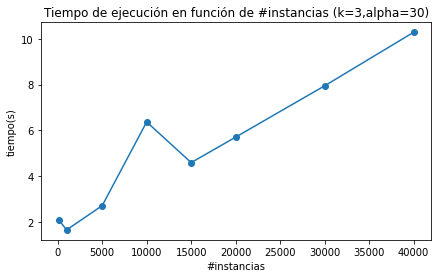

In [138]:

columns = ["instances", "k", "alpha", "time", "acc"]
df = pd.read_csv("../dataExp/Exp_instances.csv", names=columns)

df = df[df["k"] == 3]
df = df[df["alpha"] == 30]
time = df["time"]
inst = df["instances"]

plt.plot(inst, time, 'o-')
plt.xlabel("#instancias")
plt.ylabel("tiempo(s)")
plt.title("Tiempo de ejecución en función de #instancias (k=3,alpha=30)")

plt.show()

In [141]:
instances = [100, 1000, 5000, 10000, 15000, 20000, 30000, 40000]
ks = [3]
alphas = [30]

experimentacion_instances("../dataExp/Exp_instances_time.csv", instances, ks, alphas)

 12%|█▎        | 1/8 [00:02<00:14,  2.03s/it]

Accuracy: 0.6455
K: 3, Alpha: 30, Instances: 100


 25%|██▌       | 2/8 [00:03<00:10,  1.74s/it]

Accuracy: 0.8995
K: 3, Alpha: 30, Instances: 1000


 38%|███▊      | 3/8 [00:06<00:10,  2.06s/it]

Accuracy: 0.946
K: 3, Alpha: 30, Instances: 5000


 50%|█████     | 4/8 [00:10<00:12,  3.13s/it]

Accuracy: 0.9555
K: 3, Alpha: 30, Instances: 10000


 62%|██████▎   | 5/8 [00:15<00:11,  3.69s/it]

Accuracy: 0.96
K: 3, Alpha: 30, Instances: 15000


 75%|███████▌  | 6/8 [00:21<00:09,  4.52s/it]

Accuracy: 0.9645
K: 3, Alpha: 30, Instances: 20000


 88%|████████▊ | 7/8 [00:29<00:05,  5.72s/it]

Accuracy: 0.971
K: 3, Alpha: 30, Instances: 30000


100%|██████████| 8/8 [00:40<00:00,  5.06s/it]

Accuracy: 0.9725
K: 3, Alpha: 30, Instances: 40000


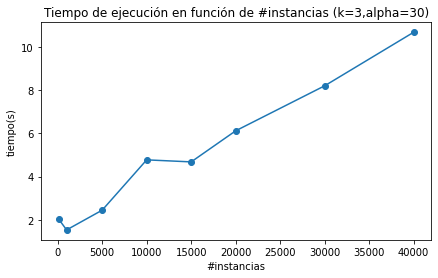

In [142]:
columns = ["instances", "k", "alpha", "time", "acc"]
df = pd.read_csv("../dataExp/Exp_instances_time.csv", names=columns)

df = df[df["k"] == 3]
df = df[df["alpha"] == 30]
time = df["time"]
inst = df["instances"]

plt.plot(inst, time, 'o-')
plt.xlabel("#instancias")
plt.ylabel("tiempo(s)")
plt.title("Tiempo de ejecución en función de #instancias (k=3,alpha=30)")

plt.show()

# Latex 5
Podemos ver que al al aumentar la cantidad de instancias, el tiempo de ejecución aumenta linealmente. Notamos un valor elevado para el caso de 10000 instancias que se nota para todos los k y alpha, que atribuimos a que el procesador estuvo ocupado con otra aplicacion del sistema.

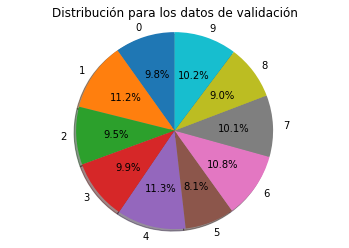

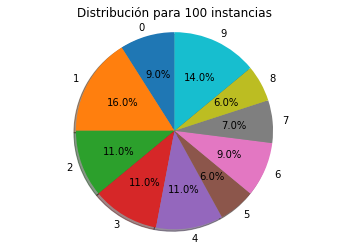

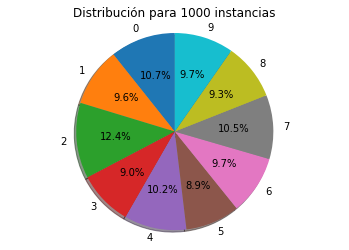

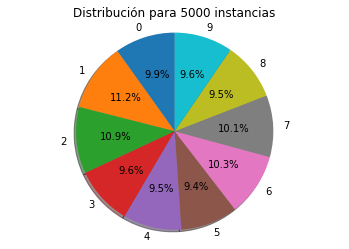

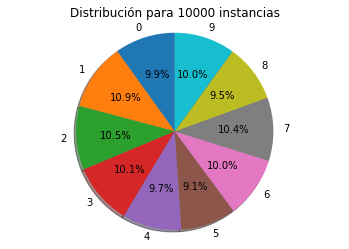

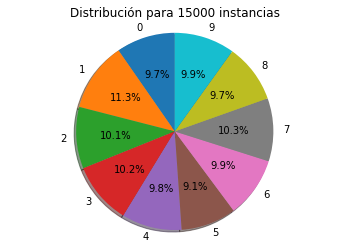

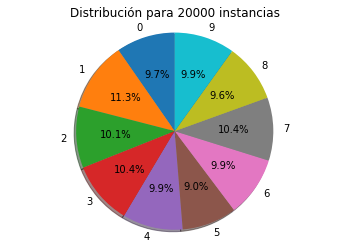

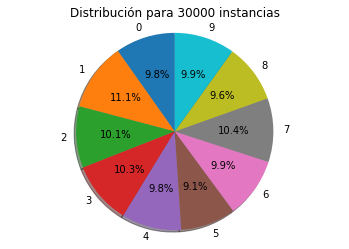

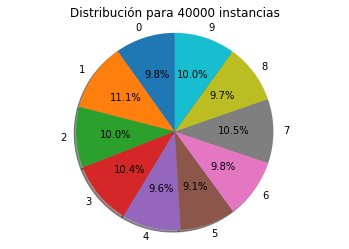

In [7]:
instances = [100, 1000, 5000, 10000, 15000, 20000, 30000, 40000]
X, y = get_data_set("../data/train.csv", 42000)

label_val = y[40000:]
pie_chart(label_val, "Distribución para los datos de validación")

for inst in instances:
    # take some instances for train and other for validation
    label_train = y[:inst]
    pie_chart(label_train, f"Distribución para {inst} instancias")

# Posible metodo KNN pesado
- Por orden(sencillo pero no tan bueno talvez)
- Por distancia con peso

# Metricas para determinar los resultados obtenidos que no son accuracy
- Accuracy
- Curvas de precisión
- Recall
- Kappa de Cohen
- F1 Score

# KFOLD
- Ver la distribución de los datos
- Como tomarlos


In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

def K_Fold(k, alpha, K, num_iter = 2500, epsilon = 1e-6):
    X, y = get_data_set("../data/train.csv", 42000)
    
    kfold = KFold(n_splits=K)
    #kfold.get_n_splits(X)

    accuracy = []
    recall = []
    precision = []

    for train_index, test_index in kfold.split(X):
        # Separamos el conjunto de entrenamiento y el conjunto de test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = metnum.KNNClassifier(k)

        pca = metnum.PCA(alpha, num_iter, epsilon)
        pca.fit(X_train)

        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

        clf.fit(X_train, y_train) 

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracy.append(acc)
        rec = recall_score(y_test, y_pred, average=None)
        recall.append(rec)
        prec = precision_score(y_test, y_pred, average=None)
        precision.append(prec)
        
    return np.mean(accuracy), sum(recall)/K, sum(precision)/K

# acc, rec, pre = K_Fold(1, 1, 4)
# print(acc, rec, pre)

In [31]:
def matrix_to_as(matrix):
    res = []
    for i in range(0,len(matrix)):
        res.append(np.array2string(matrix[i], separator=','))
    return res

def as_to_matrix(astr):
    res = []
    for i in range(0,len(astr)):
        string = astr[i].replace('[','').replace(']','')
        res.append(np.fromstring(string, dtype='float', sep=','))
    return res


def K_fold_exp(ks, alphas, KS, filename):
    accuracy = []
    recall0 = []
    recall1 = []
    recall2 = []
    recall3 = []
    recall4 = []
    recall5 = []
    recall6 = []
    recall7 = []
    recall8 = []
    recall9 = []
    precision0 = []
    precision1 = []
    precision2 = []
    precision3 = []
    precision4 = []
    precision5 = []
    precision6 = []
    precision7 = []
    precision8 = []
    precision9 = []
    K_s = []
    k_s = []
    a_s = []
    times = []
    with tqdm(total=len(ks) * len(alphas) * len(KS)) as pbar:
        for K in KS:
            for k in ks:
                for a in alphas:
                    time_init = time.perf_counter()
                    acc, rec, prec = K_Fold(k, a, K)
                    time_end = time.perf_counter()
                    accuracy.append(acc)
                    a_s.append(a)
                    k_s.append(k)
                    K_s.append(K)
                    recall0.append(rec[0])
                    recall1.append(rec[1])
                    recall2.append(rec[2])
                    recall3.append(rec[3])
                    recall4.append(rec[4])
                    recall5.append(rec[5])
                    recall6.append(rec[6])
                    recall7.append(rec[7])
                    recall8.append(rec[8])
                    recall9.append(rec[9])
                    precision0.append(prec[0])
                    precision1.append(prec[1])
                    precision2.append(prec[2])
                    precision3.append(prec[3])
                    precision4.append(prec[4])
                    precision5.append(prec[5])
                    precision6.append(prec[6])
                    precision7.append(prec[7])
                    precision8.append(prec[8])
                    precision9.append(prec[9])
                    times.append(time_end - time_init)
                    pbar.update(1)
    columns = ['k', 'alpha', 'K', 'acc', 'rec_0', 'rec_1', 'rec_2', 'rec_3', 'rec_4', 'rec_5', 'rec_6', 'rec_7', 'rec_8', 'rec_9',
               'prec_0', 'prec_1', 'prec_2', 'prec_3', 'prec_4', 'prec_5', 'prec_6', 'prec_7', 'prec_8', 'prec_9', 'time']
    pd.DataFrame({'k': k_s, 'alpha': a_s, 'K': K_s, 'acc': accuracy,
                  'rec_0': recall0, 'rec_1': recall1, 'rec_2': recall2, 'rec_3': recall3, 'rec_4': recall4, 'rec_5': recall5, 'rec_6': recall6, 'rec_7': recall7, 'rec_8': recall8, 'rec_9': recall9,
                  'prec_0': precision0,'prec_1': precision1,'prec_2': precision2,'prec_3': precision3,'prec_4': precision4,'prec_5': precision5,'prec_6': precision6,'prec_7': precision7,'prec_8': precision8,'prec_9': precision9,
                  'time': times}, columns = columns).to_csv(filename, index=False)


# Eleccion de K
Elegimos los K para que como minimo tomen un 5% de las instancias totales para test. y ademas un numeor mayor iba a llevar mucho tiempo porque hace K veces para cada k y alpha cada exp. Saltos de 5 en 5

In [36]:

K_fold_exp([1,3,5], [30,40,50], [15,20], "../dataExp/kfold_complete_1520.csv")


100%|██████████| 18/18 [1:17:59<00:00, 259.97s/it]


In [38]:
# Grafica los datos obtenidos para los distintos k y alpha
def plot_scatter_df_int(df, title, size = (7,4)):
    x = [str(i) for i in df["alpha"]]
    y = [str(i) for i in df["k"]]

    fig = plt.figure()
    colour = df["rec_3"]
    plt.scatter(x, y, s = 70, c = colour, alpha = 1, cmap="rainbow")
    plt.colorbar(label="accuracy")
    plt.xlabel("alpha")
    plt.ylabel('k',rotation=0)
    plt.title(title)
    plt.rcParams["figure.figsize"] = size
    plt.show()

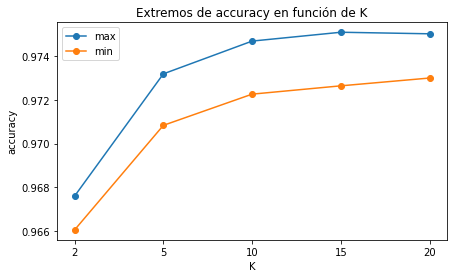

In [57]:
df = pd.read_csv("../dataExp/kfold_complete.csv")
df2 = df[df["K"] == 2]
df5 = df[df["K"] == 5]
df10 = df[df["K"] == 10]
df15 = df[df["K"] == 15]
df20 = df[df["K"] == 20]
maxa = []
mina = []

maxa.append(df2["acc"].max())
mina.append(df2["acc"].min())
maxa.append(df5["acc"].max())
mina.append(df5["acc"].min())
maxa.append(df10["acc"].max())
mina.append(df10["acc"].min())
maxa.append(df15["acc"].max())
mina.append(df15["acc"].min())
maxa.append(df20["acc"].max())
mina.append(df20["acc"].min())

plt.plot(['2','5','10','15','20'], maxa, 'o-', label='max')
plt.plot(['2','5','10','15','20'], mina, 'o-', label='min')
plt.xlabel("K")
plt.ylabel("accuracy")
plt.legend()
plt.title("Extremos de accuracy en función de K")

plt.show()


## Tenemos mas false negatives, 

Esta mas del lado si yo te lo digo esta bien, 
Un K mas grande obtiene mejores resultados porque el training set es mas grande pero un K mayor a 20 deja menos de un 5% de las muestras para testear por lo que "no tiene mucho sentido probar con menos de 5%"

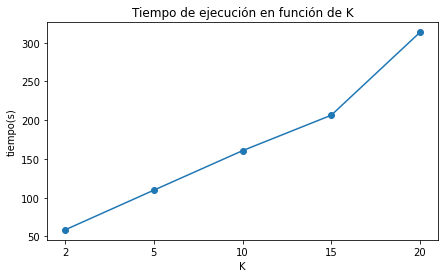

In [87]:
df = pd.read_csv("../dataExp/kfold_complete.csv")
df2 = df[df["K"] == 2]
df5 = df[df["K"] == 5]
df10 = df[df["K"] == 10]
df15 = df[df["K"] == 15]
df20 = df[df["K"] == 20]
meanr = []

meanr.append(df2["time"].mean())
meanr.append(df5["time"].mean())
meanr.append(df10["time"].mean())
meanr.append(df15["time"].mean())
meanr.append(df20["time"].mean())

plt.plot(['2','5','10','15','20'], meanr, 'o-', label='tiempo(s)')
plt.xlabel("K")
plt.ylabel("tiempo(s)")
plt.title("Tiempo de ejecución en función de K")

plt.show()

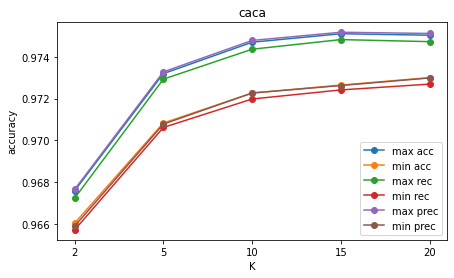

In [61]:
df = pd.read_csv("../dataExp/kfold_complete.csv")
df["rec"] = df["rec_0"] + df["rec_1"] +df["rec_2"] + df["rec_3"] + df["rec_4"] + df["rec_5"] +df["rec_6"] +df["rec_7"]+df["rec_8"]+df["rec_9"]
df["rec"] = df["rec"]/10
df["prec"] = df["prec_0"] + df["prec_1"] +df["prec_2"] + df["prec_3"] + df["prec_4"] + df["prec_5"] +df["prec_6"] +df["prec_7"]+df["prec_8"]+df["prec_9"]
df["prec"] = df["prec"]/10
df2 = df[df["K"] == 2]
df5 = df[df["K"] == 5]
df10 = df[df["K"] == 10]
df15 = df[df["K"] == 15]
df20 = df[df["K"] == 20]
maxp = []
minp = []
maxa = []
mina = []
minpre = []
maxpre = []

maxp.append(df2["rec"].max())
minp.append(df2["rec"].min())
maxp.append(df5["rec"].max())
minp.append(df5["rec"].min())
maxp.append(df10["rec"].max())
minp.append(df10["rec"].min())
maxp.append(df15["rec"].max())
minp.append(df15["rec"].min())
maxp.append(df20["rec"].max())
minp.append(df20["rec"].min())

maxpre.append(df2["prec"].max())
minpre.append(df2["prec"].min())
maxpre.append(df5["prec"].max())
minpre.append(df5["prec"].min())
maxpre.append(df10["prec"].max())
minpre.append(df10["prec"].min())
maxpre.append(df15["prec"].max())
minpre.append(df15["prec"].min())
maxpre.append(df20["prec"].max())
minpre.append(df20["prec"].min())

maxa.append(df2["acc"].max())
mina.append(df2["acc"].min())
maxa.append(df5["acc"].max())
mina.append(df5["acc"].min())
maxa.append(df10["acc"].max())
mina.append(df10["acc"].min())
maxa.append(df15["acc"].max())
mina.append(df15["acc"].min())
maxa.append(df20["acc"].max())
mina.append(df20["acc"].min())

plt.plot(['2','5','10','15','20'], maxa, 'o-', label='max acc')
plt.plot(['2','5','10','15','20'], mina, 'o-', label='min acc')
plt.plot(['2','5','10','15','20'], maxp, 'o-', label='max rec')
plt.plot(['2','5','10','15','20'], minp, 'o-', label='min rec')
plt.plot(['2','5','10','15','20'], maxpre, 'o-', label='max prec')
plt.plot(['2','5','10','15','20'], minpre, 'o-', label='min prec')
plt.xlabel("K")
plt.ylabel("accuracy")
plt.legend()
plt.title("caca")

plt.show()

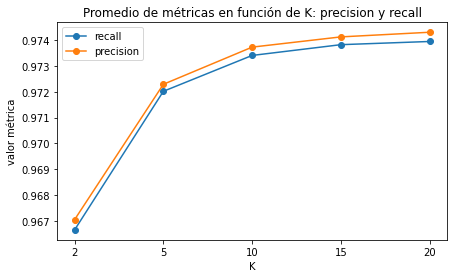

In [67]:
df = pd.read_csv("../dataExp/kfold_complete.csv")
df["rec"] = df["rec_0"] + df["rec_1"] +df["rec_2"] + df["rec_3"] + df["rec_4"] + df["rec_5"] +df["rec_6"] +df["rec_7"]+df["rec_8"]+df["rec_9"]
df["rec"] = df["rec"]/10
df["prec"] = df["prec_0"] + df["prec_1"] +df["prec_2"] + df["prec_3"] + df["prec_4"] + df["prec_5"] +df["prec_6"] +df["prec_7"]+df["prec_8"]+df["prec_9"]
df["prec"] = df["prec"]/10
df2 = df[df["K"] == 2]
df5 = df[df["K"] == 5]
df10 = df[df["K"] == 10]
df15 = df[df["K"] == 15]
df20 = df[df["K"] == 20]
meanr = []
meanpre = []


meanr.append(df2["rec"].mean())
meanr.append(df5["rec"].mean())
meanr.append(df10["rec"].mean())
meanr.append(df15["rec"].mean())
meanr.append(df20["rec"].mean())

meanpre.append(df2["prec"].mean())
meanpre.append(df5["prec"].mean())
meanpre.append(df10["prec"].mean())
meanpre.append(df15["prec"].mean())
meanpre.append(df20["prec"].mean())


plt.plot(['2','5','10','15','20'], meanr, 'o-', label='recall')
plt.plot(['2','5','10','15','20'], meanpre, 'o-', label='precision')
plt.xlabel("K")
plt.ylabel("valor métrica")
plt.legend()
plt.title("Promedio de métricas en función de K: precision y recall")

plt.show()

In [141]:
df = pd.read_csv("../dataExp/kfold_complete.csv")
df["rec"] = df["rec_0"] + df["rec_1"] +df["rec_2"] + df["rec_3"] + df["rec_4"] + df["rec_5"] +df["rec_6"] +df["rec_7"]+df["rec_8"]+df["rec_9"]
df["rec"] = df["rec"]/10
df["prec"] = df["prec_0"] + df["prec_1"] +df["prec_2"] + df["prec_3"] + df["prec_4"] + df["prec_5"] +df["prec_6"] +df["prec_7"]+df["prec_8"]+df["prec_9"]
df["prec"] = df["prec"]/10
df = df.sort_values("acc", ascending=False)
df = df.reindex(columns=["k","alpha", "K", "acc", "rec", "prec", "time"])


print(df.iloc[0:5])
df2 = df[df["K"] == 2]
df5 = df[df["K"] == 5]
df10 = df[df["K"] == 10]
df15 = df[df["K"] == 15]
df20 = df[df["K"] == 20]

dfTop = df2.iloc[0:3].append(df5.iloc[0:3]).append(df10.iloc[0:3]).append(df15.iloc[0:3]).append(df20.iloc[0:3])
print('\n')

print(dfTop)

    k  alpha   K       acc       rec      prec        time
34  5     40  15  0.975095  0.974815  0.975166  220.185017
43  5     40  20  0.975024  0.974717  0.975108  367.830707
40  3     40  20  0.974952  0.974664  0.974999  257.341246
32  3     50  15  0.974881  0.974553  0.974975  230.481917
42  5     30  20  0.974857  0.974556  0.974862  272.690240


    k  alpha   K       acc       rec      prec        time
4   3     40   2  0.967595  0.967242  0.967662   56.597628
5   3     50   2  0.967476  0.967077  0.967642   70.415318
6   5     30   2  0.967381  0.967024  0.967385   53.635853
16  5     40   5  0.973190  0.972927  0.973273  119.443755
17  5     50   5  0.972857  0.972555  0.973033  133.835719
14  3     50   5  0.972833  0.972542  0.972907  126.059594
23  3     50  10  0.974690  0.974356  0.974775  184.809988
25  5     40  10  0.974571  0.974284  0.974629  169.715738
22  3     40  10  0.974238  0.973950  0.974284  160.560731
34  5     40  15  0.975095  0.974815  0.975166  220.18

# Nos quedamos con 5,40; 3,40; 3,50 que son los que aparecen en el top 3 en base al accuracy y ademas aparecen en la mayoria de los top 3 para cada K

In [136]:
def main_pca_df(alpha, X_train, X_val, num_iter = 2500, epsilon = 1e-6 ):
    pca = metnum.PCA(alpha, num_iter, epsilon)
    pca.fit(X_train)

    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)

    return X_train, X_val

def main_knn_confusion(k, X_train, X_val, label_train, label_val):
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, label_train) 

    return clf.predict(X_val)

# experimenta con un set de alpha y ks
from plot_confusion_matrix import *
def experimentacion_confusion(pairs):  
    X, y = get_data_set("../data/train.csv", 42000)

    X_val, label_val = X[40000:], y[40000:]
    X_train, label_train = X[:40000], y[:40000]
    assert len(X_val) == len(label_val)
    assert len(X_val) == 2000
    
    from sklearn.metrics import confusion_matrix
    with tqdm(total=len(pairs)) as pbar:
        for k, alpha in pairs:
            X_train_inst, X_val_inst = main_pca_df(alpha, X_train, X_val)
            
            label_pred = main_knn_confusion(k, X_train_inst, X_val_inst, label_train, label_val)
            cm = confusion_matrix(label_val, label_pred)
            


            classes =  np.array([0,1,2,3,4,5,6,7,8,9])
            plot_confusion_matrix(label_val, label_pred, classes,title=f"Matriz de confusión para k: {k} y alpha: {alpha}", normalize=False, cmap='YlOrBr');
            #plt.imshow(cm)
            #plt.xticks(np.arange(0,10))
            #plt.yticks(np.arange(0,10))
            #plt.title(f"Matriz de confusión para k: {k} y alpha: {alpha}")
            #plt.show()
            pbar.update(1)

 33%|███▎      | 1/3 [00:12<00:24, 12.34s/it]

Confusion matrix, without normalization


 67%|██████▋   | 2/3 [00:23<00:11, 11.88s/it]

Confusion matrix, without normalization


100%|██████████| 3/3 [00:36<00:00, 12.30s/it]

Confusion matrix, without normalization


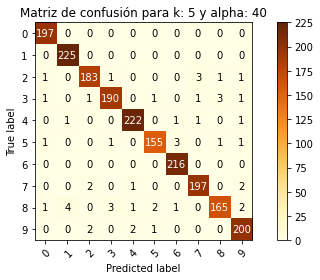

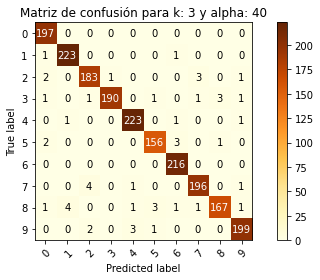

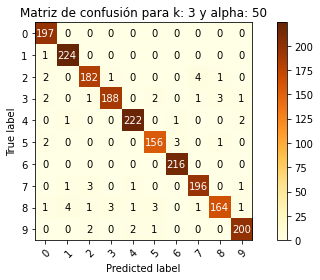

In [137]:
experimentacion_confusion([(5,40),(3,40),(3,50)])

# Otros requisitos
- Se pide realizar un estudio experimental de los métodos propuestos sobre una base de
entrenamiento utilizando la técnica K-fold cross validation mencionada anteriormente, con
el objetivo de analizar el poder de clasificación y encontrar los mejores parámetros de los
métodos. Se deberá trabajar al menos con la base de de datos MNIST, en la versión disponible
en kaggle para la competencia Digit Recognizer 2 .

# Kaggle code


In [88]:
filename = "../data/train.csv"
test_filename = "../data/test.csv"
k = 5
alpha = 40 
method = "KNN_PCA"
num_iter = 2500
epsilon = 1e-6

asd = list(range(1,20+1))
print(asd)

df_train = pd.read_csv(filename)

# Uso values para mandar todo a arrays de numpy
X_train = df_train[df_train.columns[1:]].values
label_train = df_train["label"].values.reshape(-1, 1)

df_test = pd.read_csv(test_filename)

clf = metnum.KNNClassifier(k)


pca = metnum.PCA(alpha, num_iter, epsilon)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(df_test)

clf.fit(X_train, label_train) 


label_pred = clf.predict(X_val)

ran = list(range(1,len(label_pred)+1))

np.savetxt("../dataExp/kaggleSub.csv", np.array([ran, label_pred]).transpose().astype(int), fmt='%i', delimiter=",")


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
